In [3]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
from global_values import *
from tqdm import tqdm

global_values.GRAD_SCORING = True
global_values.NN_SCORING = False


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
global_values.MODEL = SiameseCNN()
global_values.MODEL.load_state_dict(torch.load("siamese_weights.pth", map_location=device))
global_values.MODEL.to(device)
global_values.MODEL.eval()
global_values.DEVICE = device
ROTATING_PIECES = True


# Histograme pe toate imaginile

## Scor 5 imagini

In [73]:
clasic_correct_scores = []
clasic_incorrect_scores = []

buddy_correct_scores = []
buddy_incorrect_scores = []

prudent_correct_scores = []
prudent_incorrect_scores = []
files = os.listdir("disney_puzzle")
for f in files:

    image_path = os.path.join("disney_puzzle",f)
    output_folder = "fragments"

    global_values.COL_NR = 10
    global_values.ROW_NR = 10
    solution_path = f"solution/valid_comparisons_{global_values.COL_NR}_{global_values.ROW_NR}_{f}.txt"

    fragments, tile_h, tile_w = divide_image(image_path, output_folder,solution_path, global_values.COL_NR, global_values.ROW_NR)
    global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)

    fragment_rotation_dictionary = None
    if global_values.NN_SCORING == True:
        fragment_rotation_dictionary = create_fragment_rotation_dictionary(fragments)
    sides_comparisons = create_sides_comparisons(fragments,fragment_rotation_dictionary)
    sides_comparisons = calculate_buddy_score(fragments,sides_comparisons)

    gt_comparisons = read_valid_comparisons(solution_path)



    for s_comp in sides_comparisons:
        is_correct = False
        for gt_comp in gt_comparisons:
            if s_comp.side1.side_idx == gt_comp[2] and s_comp.side2.side_idx == gt_comp[3] and s_comp.side1.fragment_idx == gt_comp[0] and s_comp.side2.fragment_idx == gt_comp[1]:
                clasic_correct_scores.append(s_comp.score)
                buddy_correct_scores.append(s_comp.buddy_score)
                prudent_correct_scores.append(s_comp.prudent_score)
                is_correct = True
            elif s_comp.side1.side_idx == gt_comp[3] and s_comp.side2.side_idx == gt_comp[2] and s_comp.side1.fragment_idx == gt_comp[1] and s_comp.side2.fragment_idx == gt_comp[0]:
                clasic_correct_scores.append(s_comp.score)
                buddy_correct_scores.append(s_comp.buddy_score)
                prudent_correct_scores.append(s_comp.prudent_score)
                is_correct = True
        if is_correct == False:
            clasic_incorrect_scores.append(s_comp.score)
            buddy_incorrect_scores.append(s_comp.buddy_score)
            prudent_incorrect_scores.append(s_comp.prudent_score)






Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0


100%|██████████| 99/99 [00:05<00:00, 17.95it/s]


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0


100%|██████████| 99/99 [00:05<00:00, 17.89it/s]


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0


100%|██████████| 99/99 [00:05<00:00, 19.69it/s]


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0


100%|██████████| 99/99 [00:05<00:00, 18.38it/s]


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0


100%|██████████| 99/99 [00:06<00:00, 16.36it/s]


## Score zoom

In [74]:
clasic_x_buddy_correct = []
for i in range(len(clasic_correct_scores)):
    clasic_x_buddy_correct.append(clasic_correct_scores[i]*buddy_correct_scores[i])
clasic_x_buddy_incorrect = []
for i in range(len(clasic_correct_scores)):
    clasic_x_buddy_incorrect.append(clasic_incorrect_scores[i]*buddy_incorrect_scores[i])


prudent_x_buddy_correct = []
for i in range(len(prudent_correct_scores)):
    prudent_x_buddy_correct.append(prudent_correct_scores[i]*buddy_correct_scores[i])
prudent_x_buddy_incorrect = []
for i in range(len(prudent_correct_scores)):
    prudent_x_buddy_incorrect.append(prudent_incorrect_scores[i]*buddy_incorrect_scores[i])





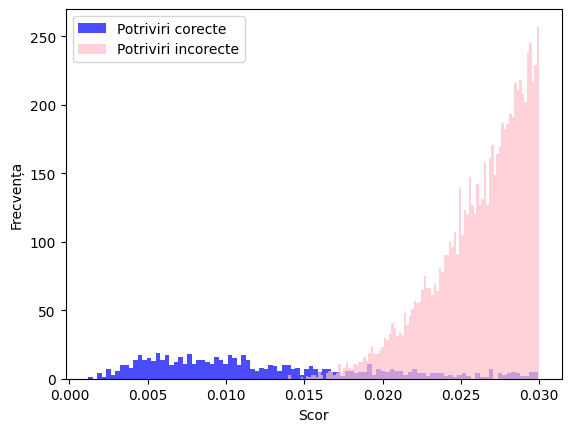

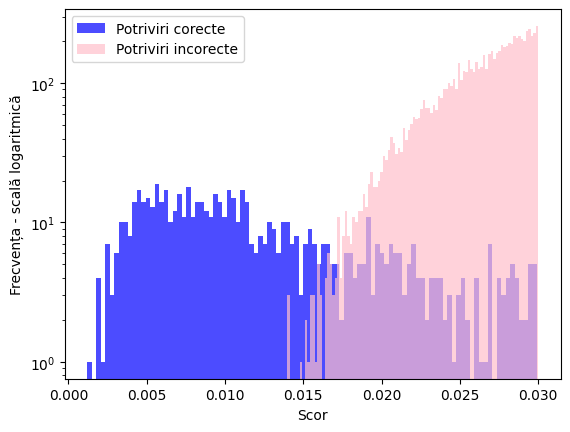

In [75]:
zoom_correct = []
zoom_incorrect = []

for i in clasic_correct_scores:
    if i < 0.03:
        zoom_correct.append(i)
for i in clasic_incorrect_scores:
    if i < 0.03:
        zoom_incorrect.append(i)


metrica = 'clasic'
plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
# plt.title('Clasic score')
plt.xlabel("Scor")
plt.ylabel("Frecvența")
plt.legend()
plt.savefig(f"ploturi/{global_values.COL_NR}/liniar/{metrica}_liniar.png")
plt.show()


plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
# plt.title('Clasic score')
plt.xlabel("Scor")
plt.ylabel("Frecvența - scală logaritmică")
plt.yscale("log")
plt.legend()
plt.savefig(f"ploturi/{global_values.COL_NR}/logaritmic/{metrica}_log.png")
plt.show()


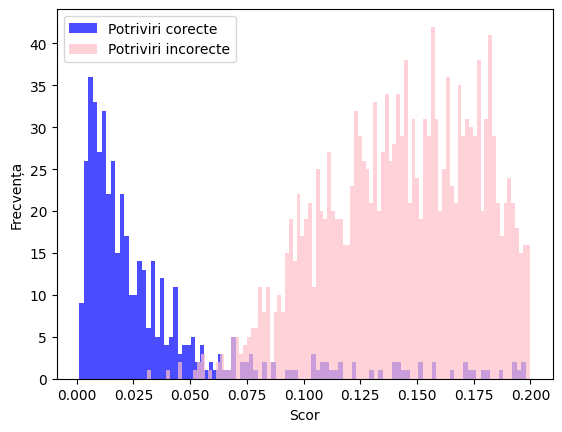

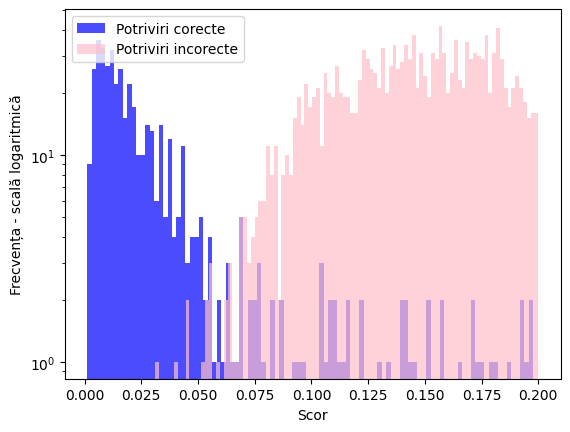

In [77]:
zoom_correct = []
zoom_incorrect = []

for i in prudent_correct_scores:
    if i < 0.2:
        zoom_correct.append(i)
for i in prudent_incorrect_scores:
    if i < 0.2:
        zoom_incorrect.append(i)

metrica = 'prudent'
plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
plt.xlabel("Scor")
plt.ylabel("Frecvența")
plt.legend()
plt.savefig(f"ploturi/{global_values.COL_NR}/liniar/{metrica}_liniar.png")
plt.show()


plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
plt.xlabel("Scor")
plt.ylabel("Frecvența - scală logaritmică")
plt.yscale("log")
plt.legend()
plt.savefig(f"ploturi/{global_values.COL_NR}/logaritmic/{metrica}_log.png")
plt.show()

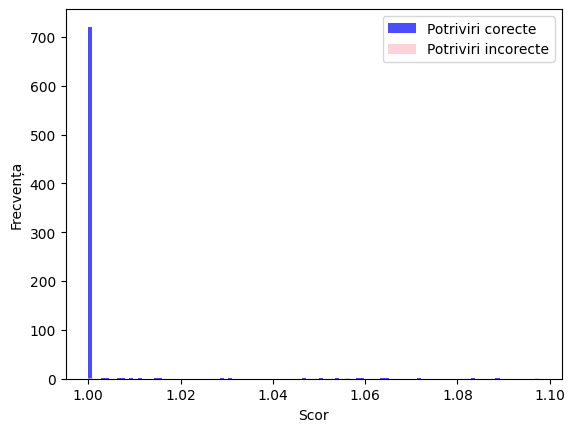

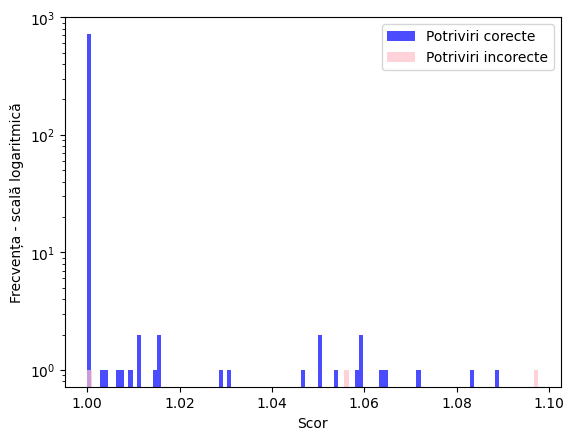

In [78]:
zoom_correct = []
zoom_incorrect = []

for i in buddy_correct_scores:
    if i < 1.1:
        zoom_correct.append(i)
for i in buddy_incorrect_scores:
    if i < 1.1:
        zoom_incorrect.append(i)

metrica = 'prieten'
plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
# plt.title('Clasic score')
plt.xlabel("Scor")
plt.ylabel("Frecvența")
plt.legend()
plt.savefig(f"ploturi/{global_values.COL_NR}/liniar/{metrica}_liniar.png")
plt.show()


plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
# plt.title('Clasic score')
plt.xlabel("Scor")
plt.ylabel("Frecvența - scală logaritmică")
plt.yscale("log")
plt.legend()
plt.savefig(f"ploturi/{global_values.COL_NR}/logaritmic/{metrica}_log.png")
plt.show()

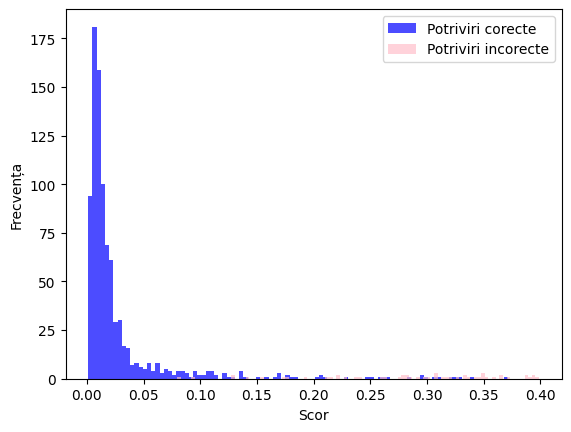

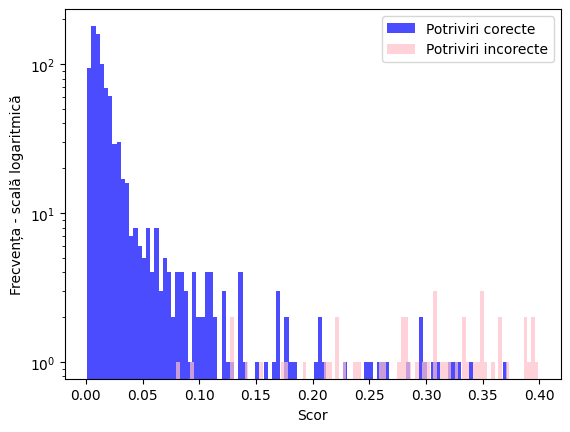

In [79]:
zoom_correct = []
zoom_incorrect = []

for i in clasic_x_buddy_correct:
    if i < 0.4:
        zoom_correct.append(i)
for i in clasic_x_buddy_incorrect:
    if i < 0.4:
        zoom_incorrect.append(i)


metrica = 'clasic_x_prietenie'
plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
# plt.title('Clasic score')
plt.xlabel("Scor")
plt.ylabel("Frecvența")
plt.legend()
plt.savefig(f"ploturi/{global_values.COL_NR}/liniar/{metrica}_liniar.png")
plt.show()


plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
# plt.title('Clasic score')
plt.xlabel("Scor")
plt.ylabel("Frecvența - scală logaritmică")
plt.yscale("log")
plt.legend()
plt.savefig(f"ploturi/{global_values.COL_NR}/logaritmic/{metrica}_log.png")
plt.show()

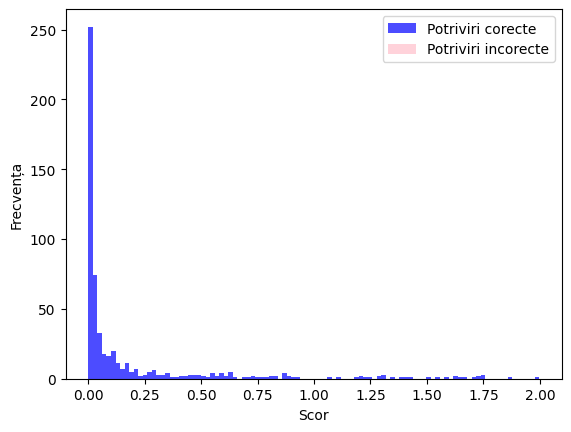

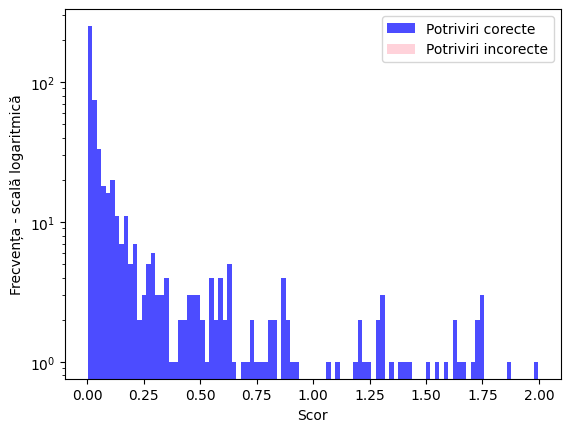

In [80]:
zoom_correct = []
zoom_incorrect = []

for i in prudent_x_buddy_correct:
    if i < 2:
        zoom_correct.append(i)
for i in prudent_x_buddy_incorrect:
    if i < 2:
        zoom_incorrect.append(i)


metrica = 'prudent_x_prietenie'
plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
# plt.title('Clasic score')
plt.xlabel("Scor")
plt.ylabel("Frecvența")
plt.legend()
plt.savefig(f"ploturi/{global_values.COL_NR}/liniar/{metrica}_liniar.png")
plt.show()


plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
# plt.title('Clasic score')
plt.xlabel("Scor")
plt.ylabel("Frecvența - scală logaritmică")
plt.yscale("log")
plt.legend()
plt.savefig(f"ploturi/{global_values.COL_NR}/logaritmic/{metrica}_log.png")
plt.show()

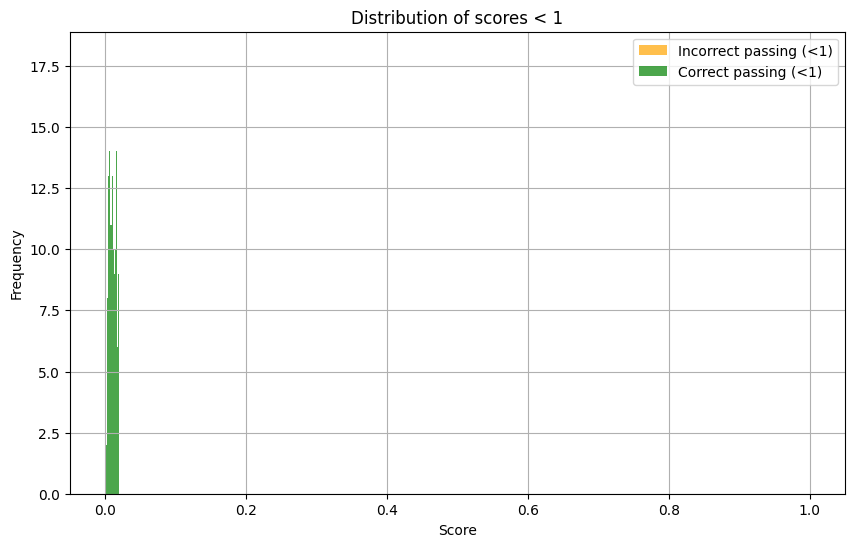

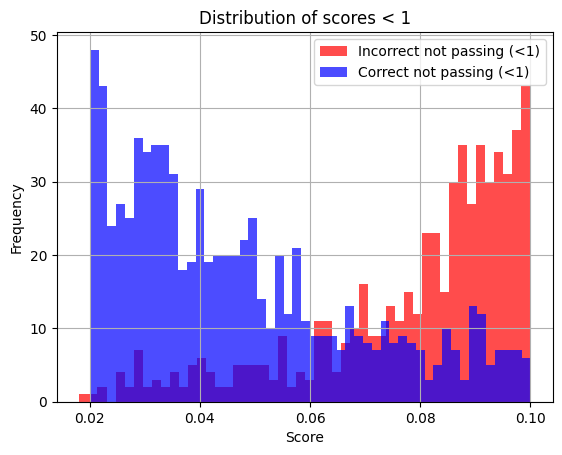

3.530311148509897e+23
0.0


In [ ]:
correct_passing = []
correct_not_passing = []

incorrect_passing = []
incorrect_not_passing = []

zoom_incorrect = []

for i in range(len(buddy_correct_scores)):
    if buddy_correct_scores[i] < 1.025 and prudent_correct_scores[i] < 0.02:
        correct_passing.append(prudent_correct_scores[i])
    else:
        correct_not_passing.append(prudent_correct_scores[i])

for i in range(len(buddy_incorrect_scores)):
    if buddy_incorrect_scores[i] < 1.025 and prudent_incorrect_scores[i] < 0.02:
        incorrect_passing.append(prudent_incorrect_scores[i])
    else:
        incorrect_not_passing.append(prudent_incorrect_scores[i])

import matplotlib.pyplot as plt

# Prepare data < 1 for each list
correct_passing_lt1 = [x for x in correct_passing if x < 0.1]
correct_not_passing_lt1 = [x for x in correct_not_passing if x < 0.1]
incorrect_passing_lt1 = [x for x in incorrect_passing if x < 0.1]
incorrect_not_passing_lt1 = [x for x in incorrect_not_passing if x < 0.1]

# Plot
plt.figure(figsize=(10, 6))

plt.hist(incorrect_passing_lt1, bins=50, alpha=0.7, color='orange', label='Incorrect passing (<1)')

plt.hist(correct_passing_lt1, bins=50, alpha=0.7, color='green', label='Correct passing (<1)')

plt.title('Distribution of scores < 1')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

plt.hist(incorrect_not_passing_lt1, bins=50, alpha=0.7, color='red', label='Incorrect not passing (<1)')
plt.hist(correct_not_passing_lt1, bins=50, alpha=0.7, color='blue', label='Correct not passing (<1)')

plt.title('Distribution of scores < 1')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


print(max(prudent_x_buddy_correct))
print(len(incorrect_passing)/5)

In [81]:
is_match = []
is_not_match = []

files = os.listdir("disney_puzzle")
image_path = os.path.join("disney_puzzle","aladin.jpg")
output_folder = "fragments"

global_values.COL_NR = 10
global_values.ROW_NR = 10
solution_path = f"solution/valid_comparisons_{global_values.COL_NR}_{global_values.ROW_NR}_aladin.jpg.txt"

fragments, tile_h, tile_w = divide_image(image_path, output_folder,solution_path, global_values.COL_NR, global_values.ROW_NR)
global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)

fragment_rotation_dictionary = None
if global_values.NN_SCORING == True:
    fragment_rotation_dictionary = create_fragment_rotation_dictionary(fragments)
sides_comparisons = create_sides_comparisons(fragments,fragment_rotation_dictionary)


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0


100%|██████████| 99/99 [00:05<00:00, 19.78it/s]


## plot all scores for every side of every fragment

In [ ]:
# gt_comparisons = read_valid_comparisons(solution_path)
# comparisons = []

# for s in sides_comparisons:
#     comparisons.append((s.side1.fragment_idx, s.side2.fragment_idx, s.side1.side_idx, s.side2.side_idx, s.score))
#     comparisons.append((s.side2.fragment_idx, s.side1.fragment_idx, s.side2.side_idx, s.side1.side_idx, s.score))

# for fr_idx in range(len(fragments)):
#     for side_idx in range(4):
#         is_match_scores = []
#         is_not_match_scores = []
#         total_comp = 0
#         best_comp = None

#         best_score = [[None for _ in range(4)] for _ in range(len(fragments))]

#         for s_comp in comparisons:
#             if fr_idx == s_comp[0] and side_idx == s_comp[2]:
#                 total_comp += 1
#                 was_found_correct = False
#                 for gt_comp in gt_comparisons:
#                     if best_score[fr_idx][side_idx] is None or s_comp[4] < best_score[fr_idx][side_idx]:
#                         best_score[fr_idx][side_idx] = s_comp[4]
#                     if  s_comp[0] == gt_comp[0] and s_comp[1] == gt_comp[1] and s_comp[2] == gt_comp[2] and s_comp[3] == gt_comp[3]:
#                         is_match_scores.append(s_comp[4])
#                         print("MATCH FOUND: pred", s_comp)
#                         was_found_correct = True
#                         break
#                 if was_found_correct == False:
#                     is_not_match_scores.append(s_comp[4])
#         print(f"Best comp score: {best_score[fr_idx][side_idx]}")
#         # Clean scores before plotting
#         print(f"Total comparisons for fr {fr_idx} side {side_idx} = {total_comp}")

#         combined_scores = np.concatenate([is_match_scores, is_not_match_scores])
#         low, high = np.min(combined_scores), np.max(combined_scores)
#         buffer = (high - low) * 0.05
#         low -= buffer
#         high += buffer
#         plt.hist(is_not_match_scores, bins=50, alpha=0.7, color='pink', label="Not Match", range=(low, high))
#         plt.hist(is_match_scores, bins=50, alpha=0.7, color='blue', label="Match", range=(low, high))

#         # Overlay X markers for match scores
#         for score in is_match_scores:
#             plt.scatter(score, 1, color='blue', marker='x', s=80)

#         plt.legend()
#         plt.title(f"Fragment {fr_idx} — Side {side_idx}")
#         plt.xlabel("Score")
#         plt.ylabel("Frequency")
#         plt.grid(True)
#         plt.show()




In [96]:


is_match = []
is_not_match = []

files = os.listdir("disney_puzzle")
image_path = os.path.join("disney_puzzle","aladin.jpg")
output_folder = "fragments"

global_values.COL_NR = 12
global_values.ROW_NR = 12
solution_path = f"solution/valid_comparisons_{global_values.COL_NR}_{global_values.ROW_NR}_aladin.jpg.txt"

fragments, tile_h, tile_w = divide_image(image_path, output_folder,solution_path, global_values.COL_NR, global_values.ROW_NR)
global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)

fragment_rotation_dictionary = None
if global_values.NN_SCORING == True:
    fragment_rotation_dictionary = create_fragment_rotation_dictionary(fragments)
sides_comparisons = create_sides_comparisons(fragments,fragment_rotation_dictionary)


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0, 100)0.0, 101)0.0, 102)0.0, 103)0.0, 104)0.0, 105)0.0, 106)0.0, 107)0.0, 108)0.0, 109)0.0, 110)0.0, 111)0.0, 112)0.0, 113)0.0, 114)0.0, 115)0.0, 116)0.0, 117)0.0, 118)0.0, 119)0.0, 120)0.0

100%|██████████| 143/143 [00:10<00:00, 14.29it/s]


In [97]:
## best score for all sides of all fragments

# best_score = [[None for _ in range(4)] for _ in range(len(fragments))]
# for s in sides_comparisons:
#     if best_score[s.side1.fragment_idx][s.side1.side_idx] is None or s.score < best_score[s.side1.fragment_idx][s.side1.side_idx]:
#         best_score[s.side1.fragment_idx][s.side1.side_idx] = s.score

#     if best_score[s.side2.fragment_idx][s.side2.side_idx] is None or s.score < best_score[s.side2.fragment_idx][s.side2.side_idx]:
#         best_score[s.side2.fragment_idx][s.side2.side_idx] = s.score

# ### calculate_buddy_score
# for s in sides_comparisons:
#     s.buddy_score = s.score/best_score[s.side1.fragment_idx][s.side1.side_idx] + s.score/best_score[s.side2.fragment_idx][s.side2.side_idx]


# print(best_score)

sides_comparisons = calculate_buddy_score(fragments, sides_comparisons)

Fragment 0 side 0
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (0, 31, 0, 2, 0.029240179560642194)
Min buddy score = 1.5686530782058514


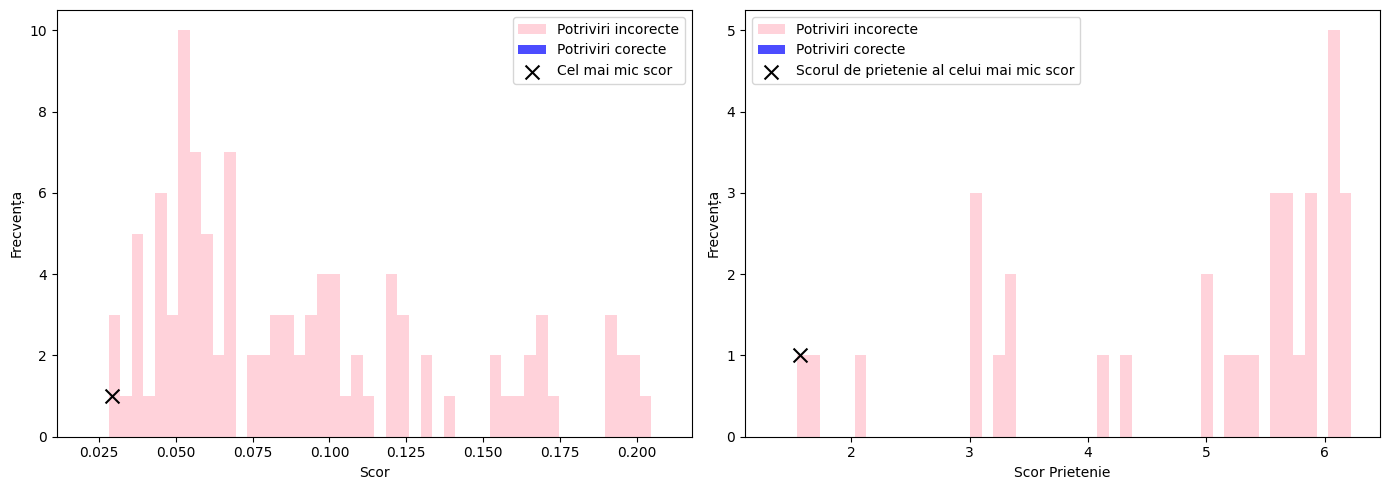

Fragment 0 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (0, 15, 1, 1, 0.022428615072238256)
Min buddy score = 6.091711564342675


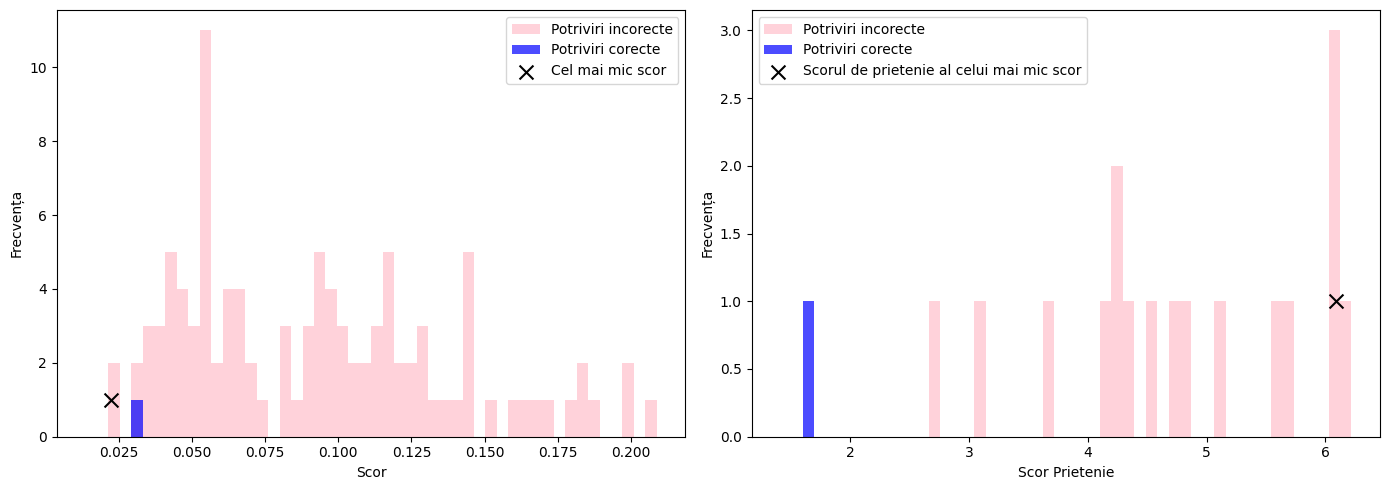

Fragment 0 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (0, 6, 2, 0, 0.01695798311151772)
Min buddy score = 1.0


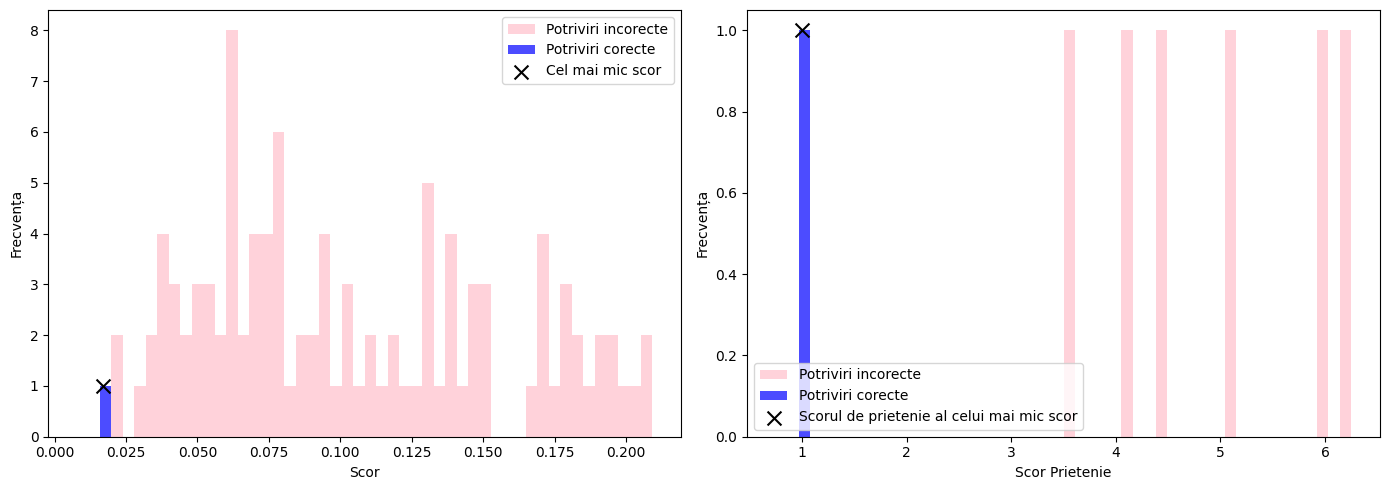

Fragment 0 side 3
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (0, 15, 3, 1, 0.02521911357648237)
Min buddy score = 6.849623363793269


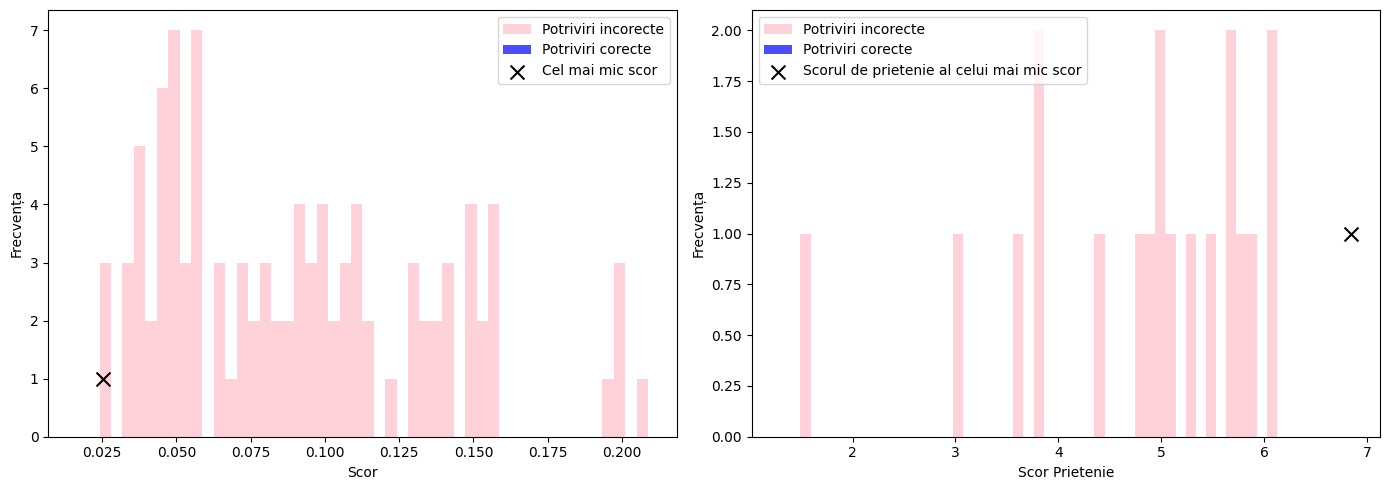

Fragment 1 side 0
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (1, 15, 0, 1, 0.0251364623001272)
Min buddy score = 6.827174909693056


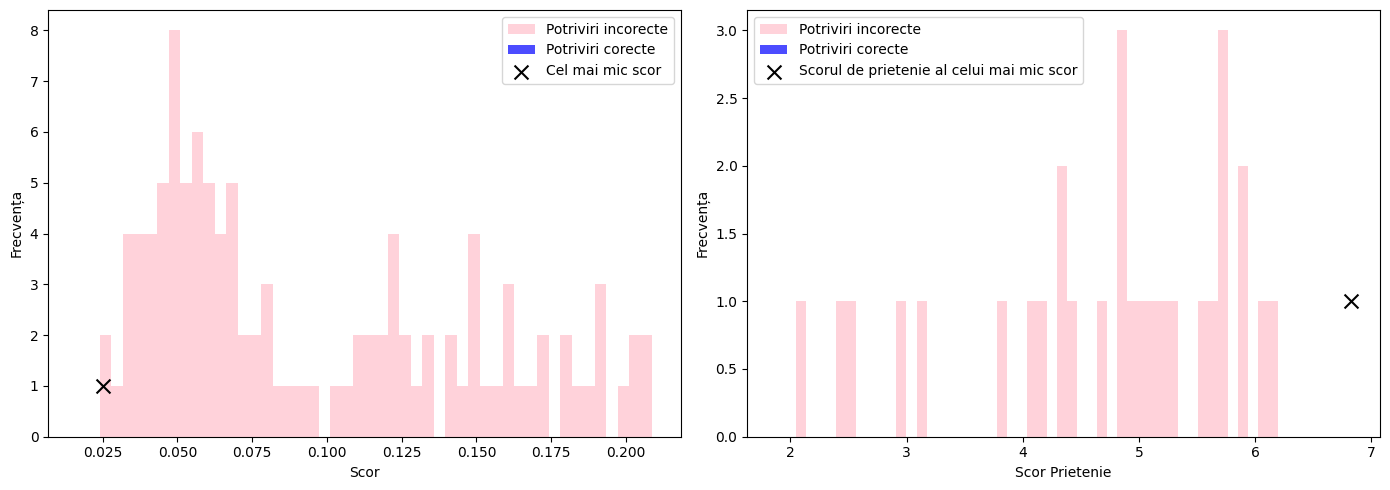

Fragment 1 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (1, 21, 1, 0, 0.02405639830479761)
Min buddy score = 2.4396937634201334


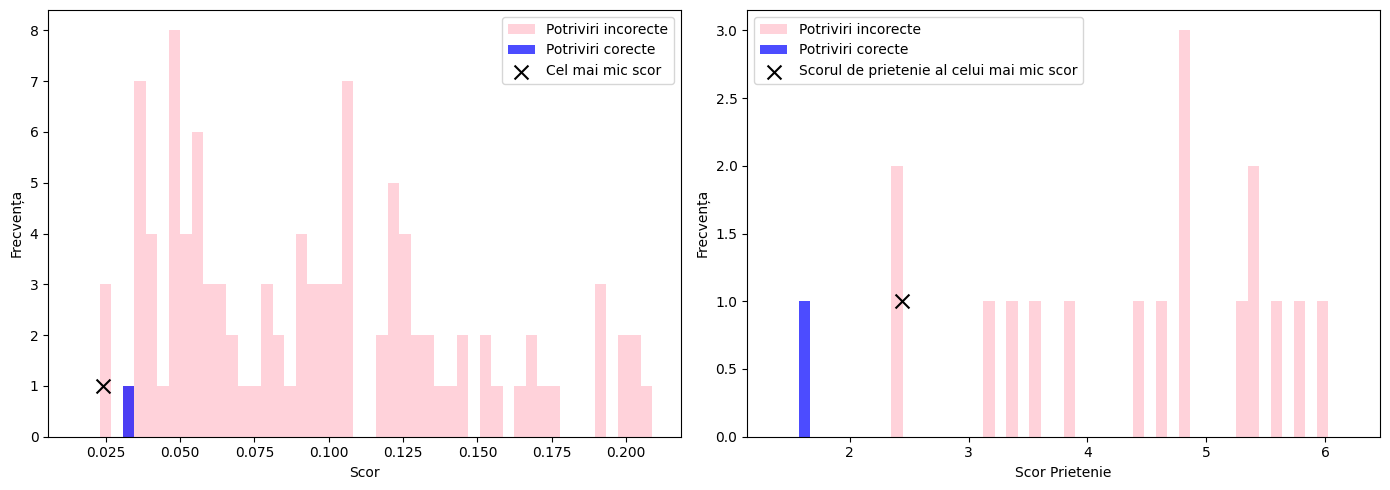

Fragment 1 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (1, 7, 2, 0, 0.021852044787728966)
Min buddy score = 1.0


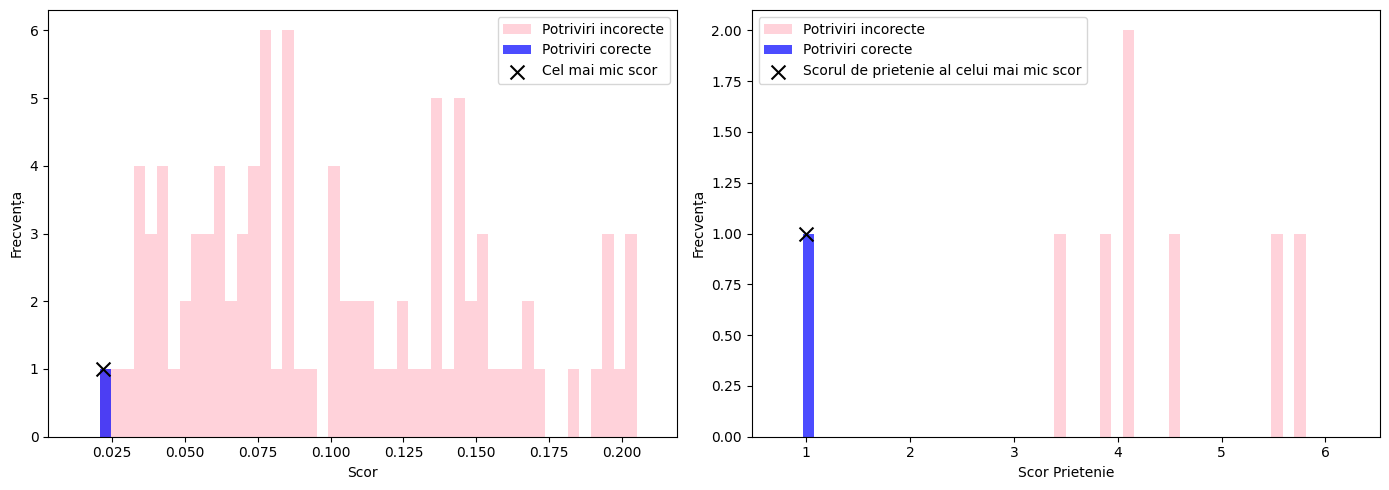

Fragment 1 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (1, 16, 3, 3, 0.02322730953299381)
Min buddy score = 6.308640530633749


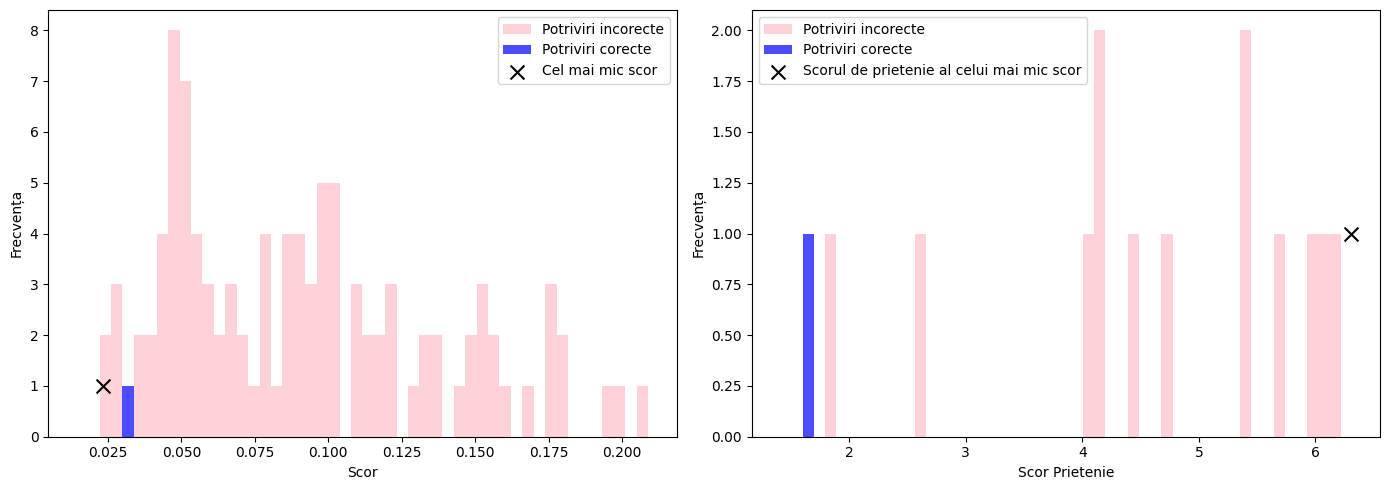

Fragment 2 side 0
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (2, 31, 0, 2, 0.024217077637716033)
Min buddy score = 1.2991778420090871


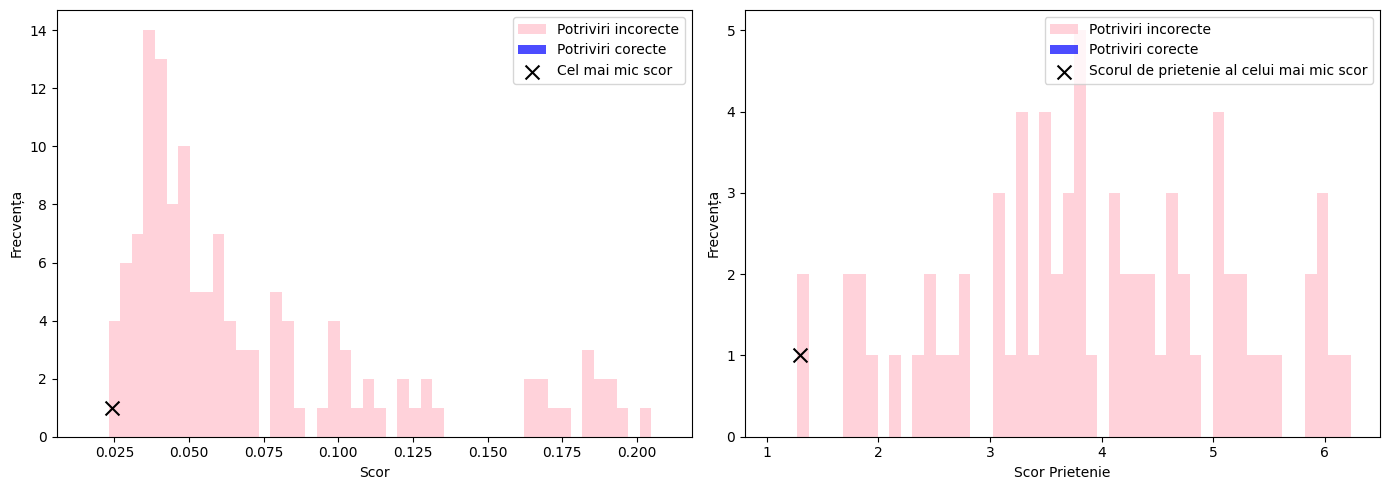

Fragment 2 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (2, 3, 1, 3, 0.01664814206094609)
Min buddy score = 1.0


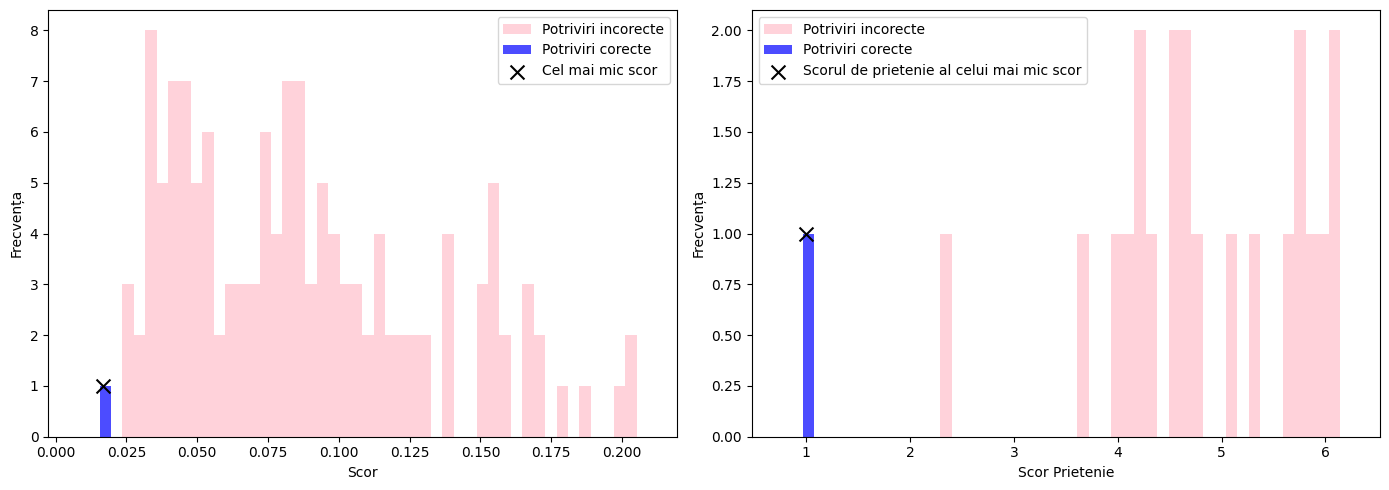

Fragment 2 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (2, 8, 2, 0, 0.014276749558389328)
Min buddy score = 1.0


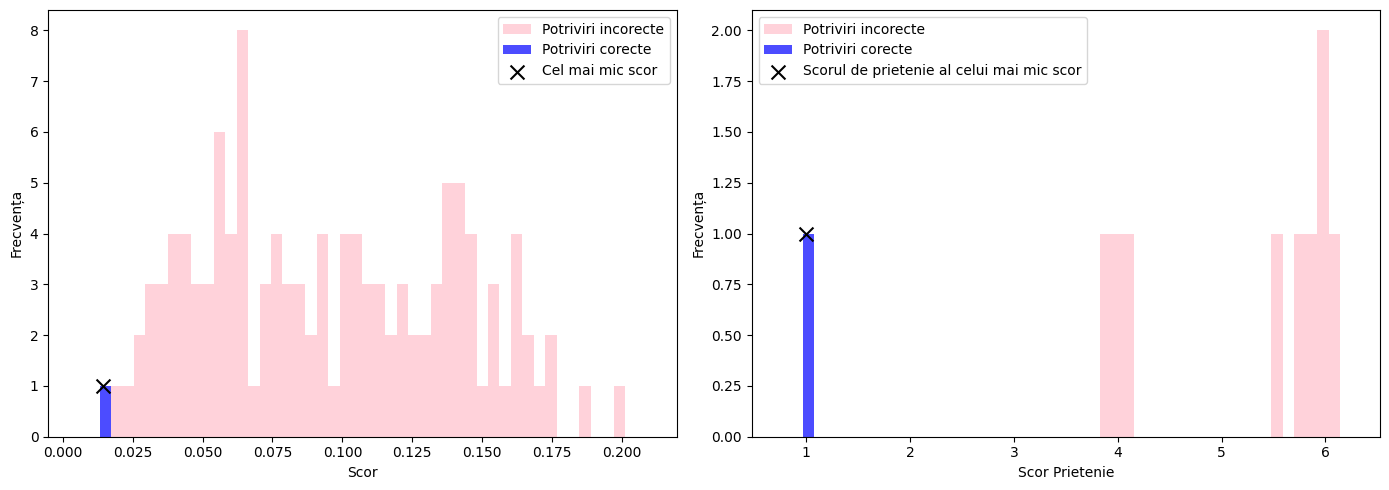

Fragment 2 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (2, 15, 3, 1, 0.02327407183728601)
Min buddy score = 6.32134138037033


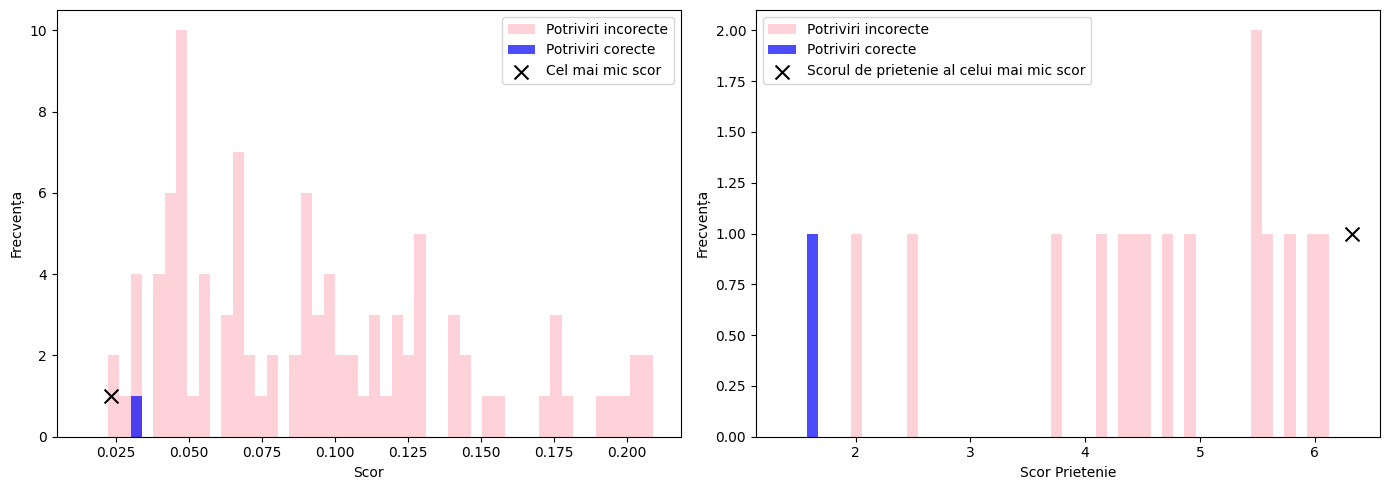

Fragment 3 side 0
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (3, 15, 0, 1, 0.02610870610048293)
Min buddy score = 7.091240648166512


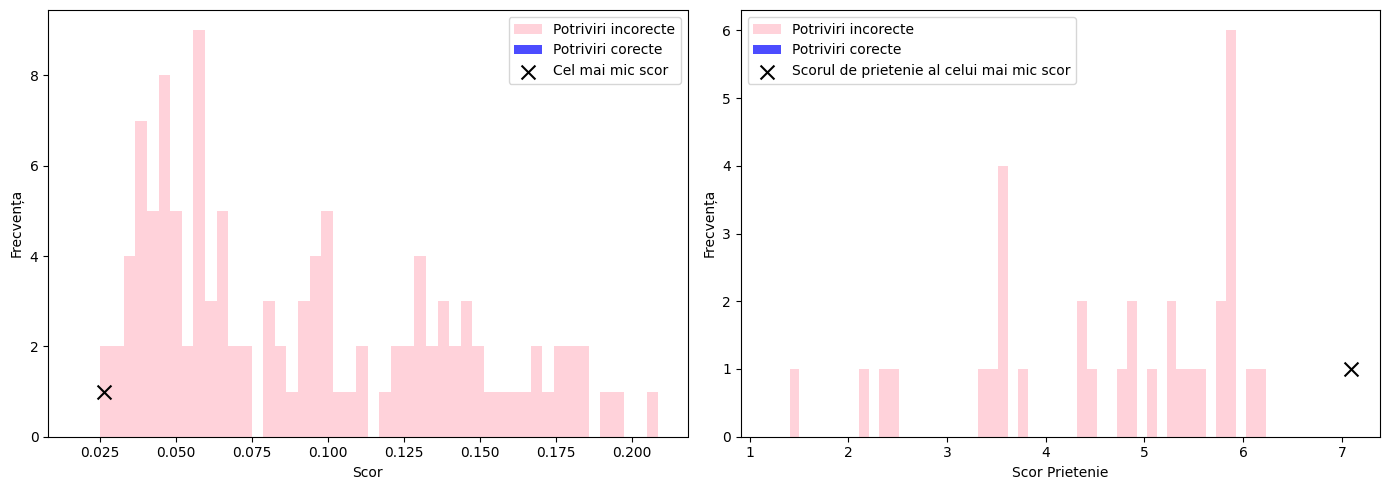

Fragment 3 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (3, 4, 1, 3, 0.01970626159033465)
Min buddy score = 1.0


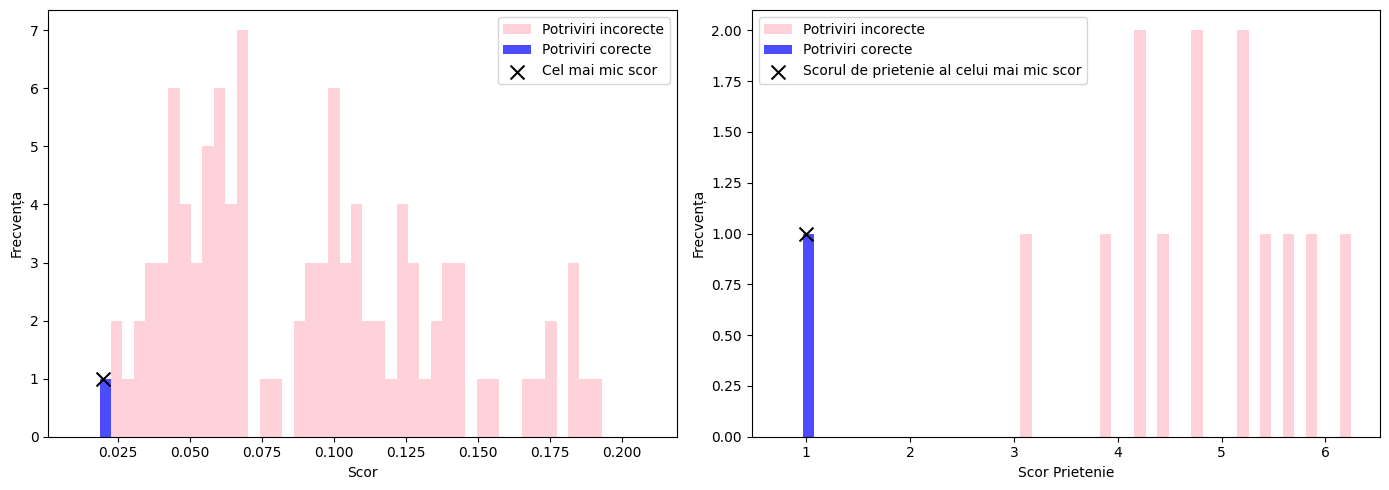

Fragment 3 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (3, 9, 2, 0, 0.006242739154261254)
Min buddy score = 1.0


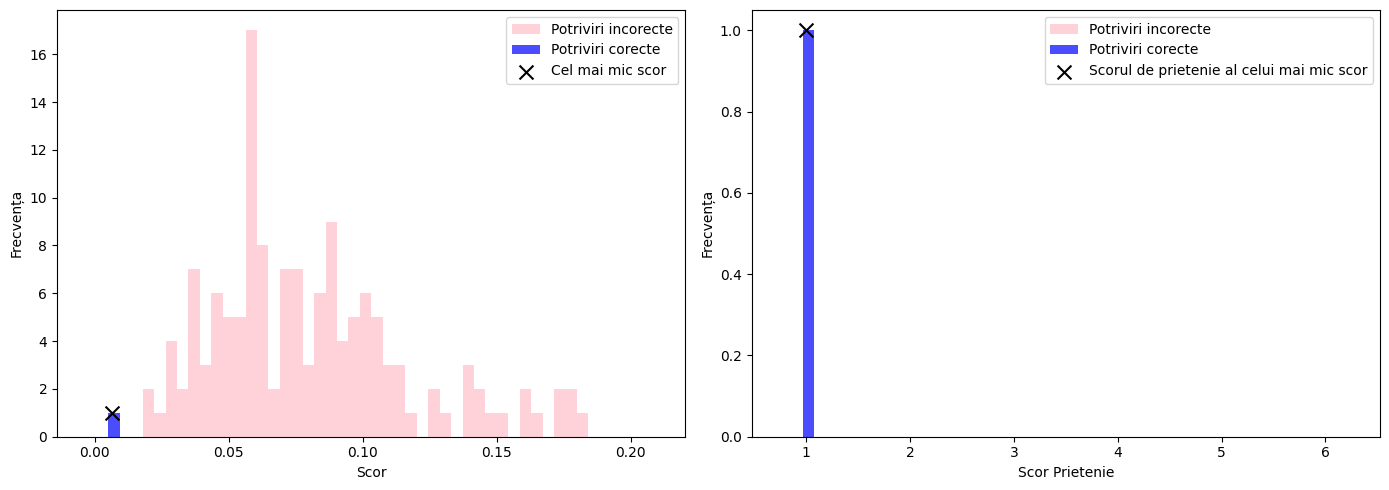

Fragment 3 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (2, 3, 1, 3, 0.01664814206094609)
Min buddy score = 1.0


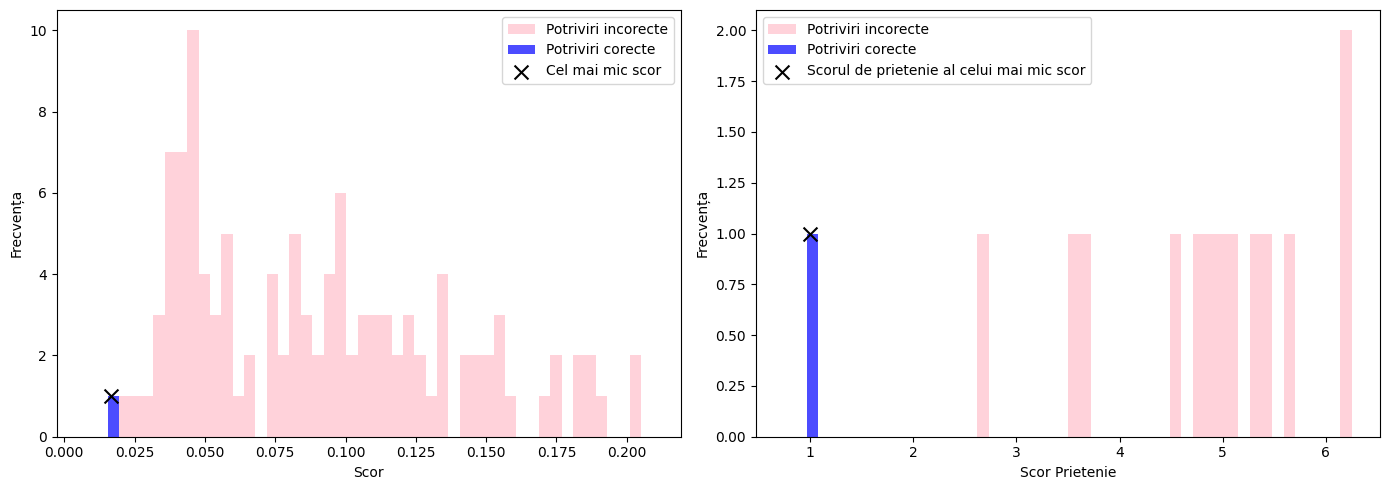

Fragment 4 side 0
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (4, 15, 0, 1, 0.02794215376920135)
Min buddy score = 7.589213185934735


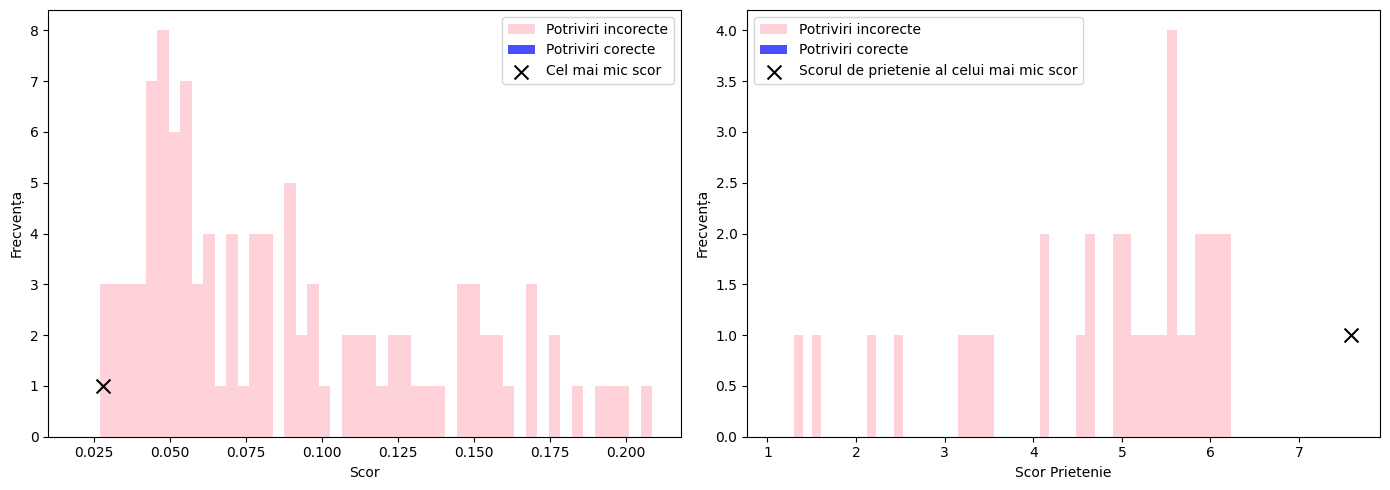

Fragment 4 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (4, 5, 1, 3, 0.01836965712194846)
Min buddy score = 1.0


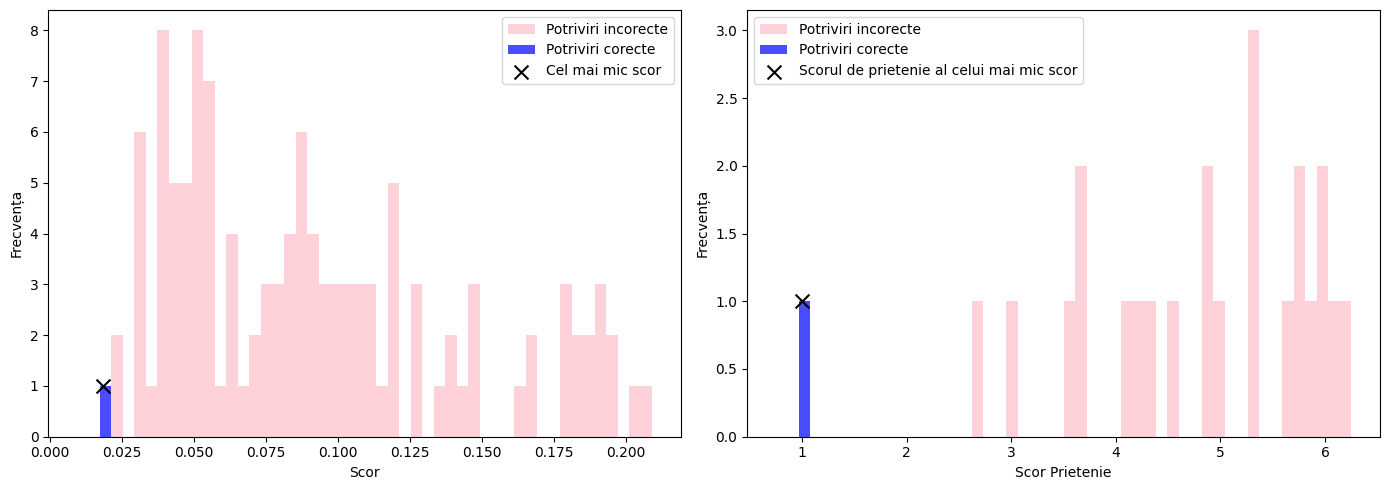

Fragment 4 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (4, 15, 2, 1, 0.02365798761336432)
Min buddy score = 6.425614611924633


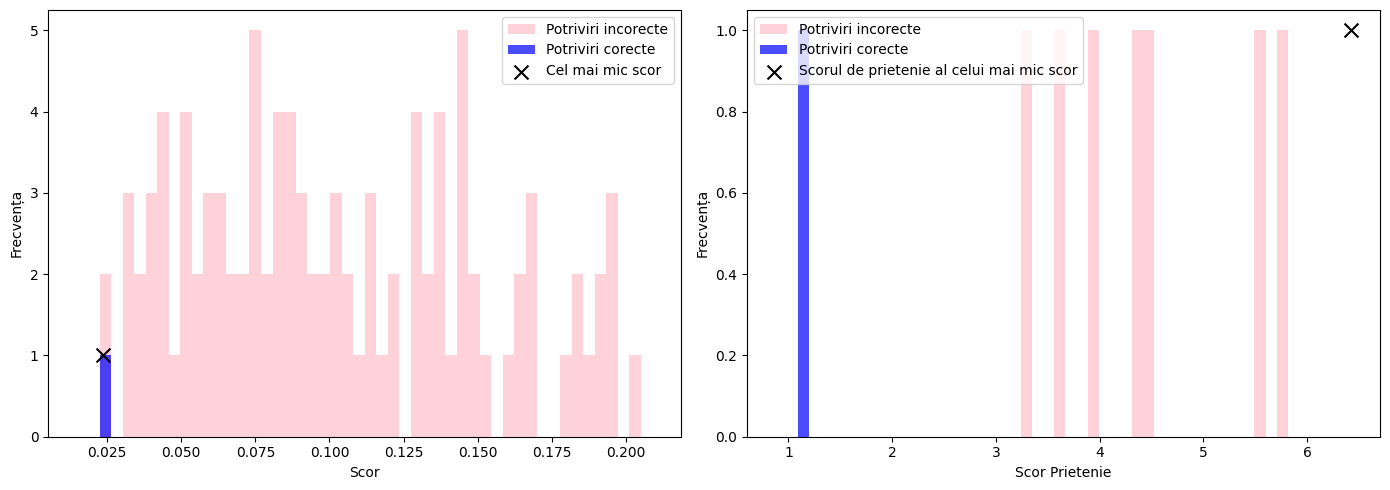

Fragment 4 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (3, 4, 1, 3, 0.01970626159033465)
Min buddy score = 1.0


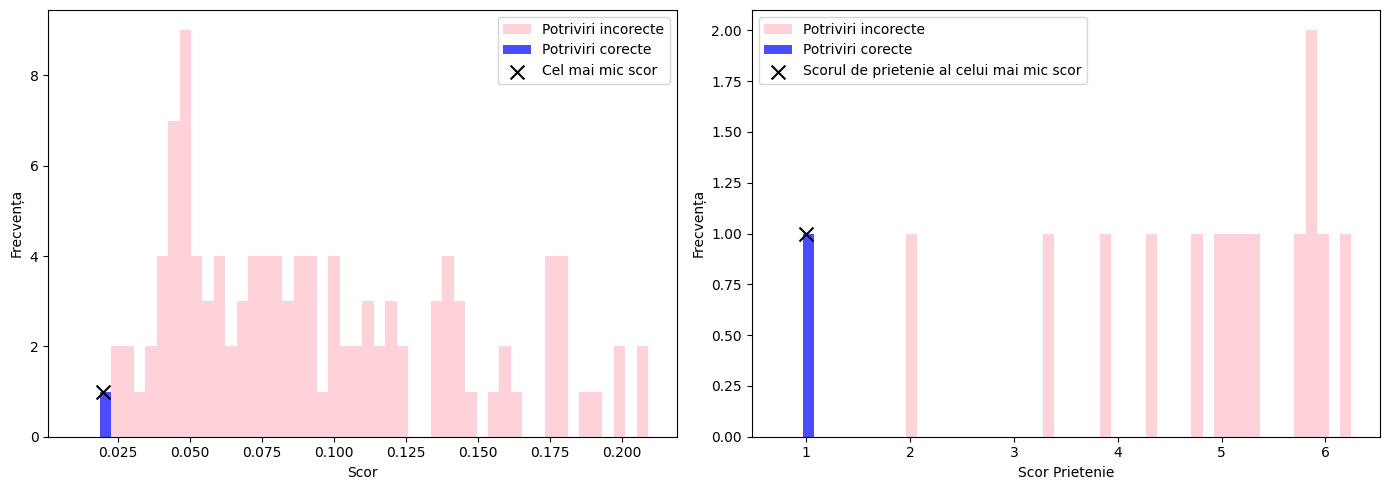

Fragment 5 side 0
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (5, 31, 0, 2, 0.026031220501194816)
Min buddy score = 1.3965014846768504


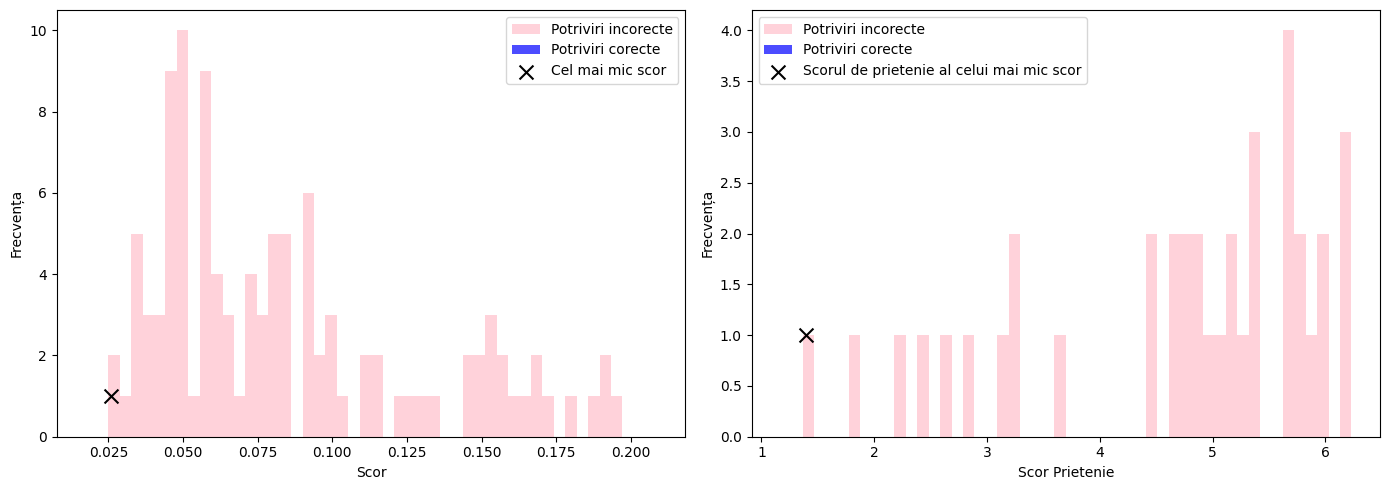

Fragment 5 side 1
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (5, 23, 1, 2, 0.02763475063715061)
Min buddy score = 2.6914768251473435


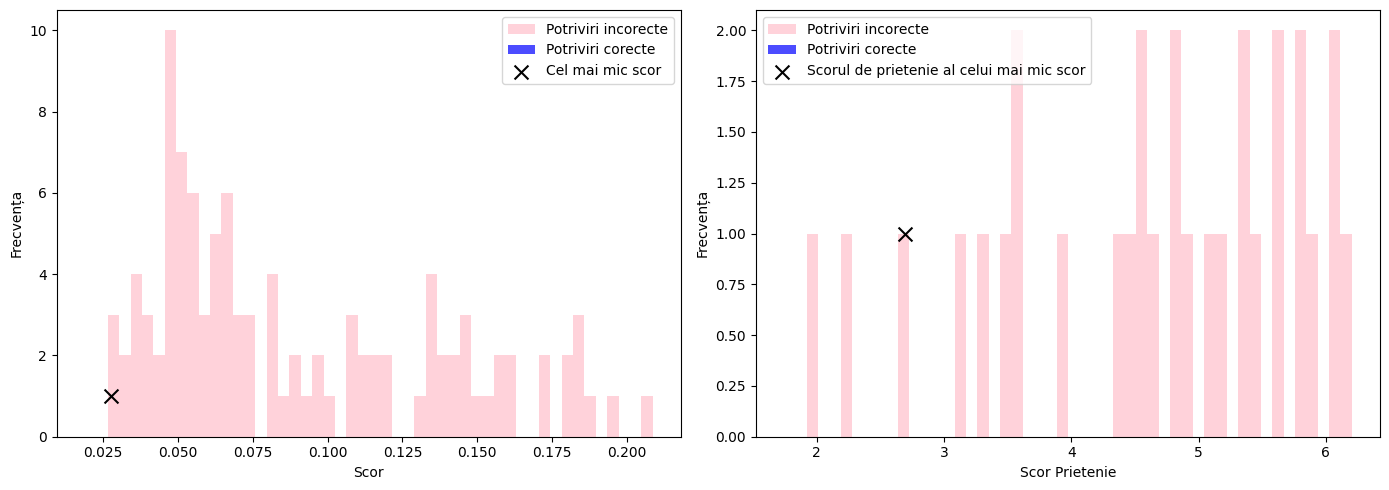

Fragment 5 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (5, 15, 2, 1, 0.020600405704520073)
Min buddy score = 5.595161772413991


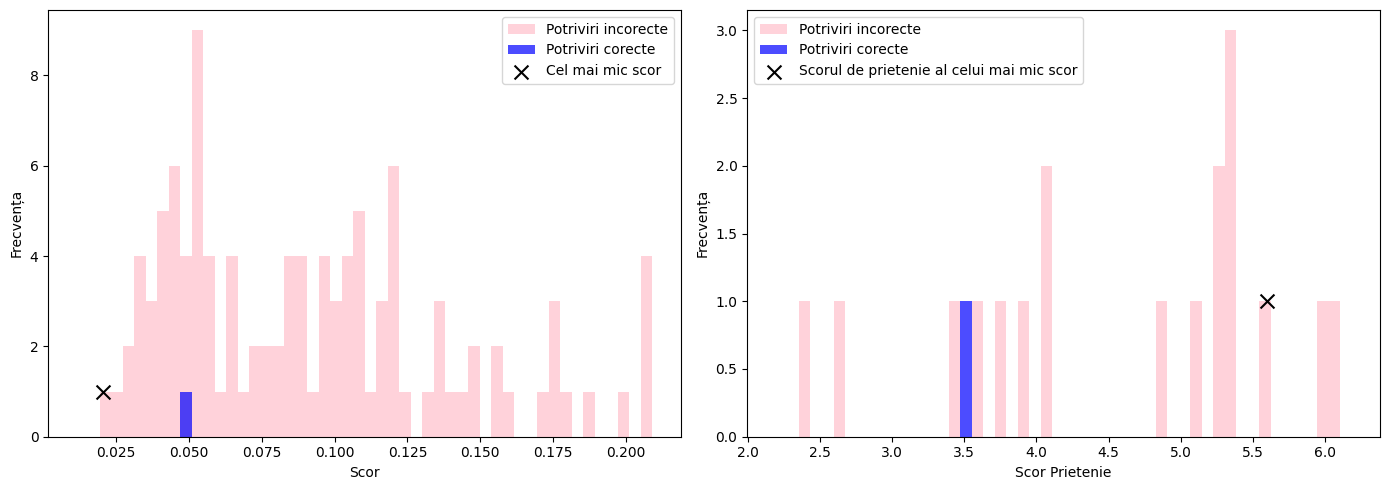

Fragment 5 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (4, 5, 1, 3, 0.01836965712194846)
Min buddy score = 1.0


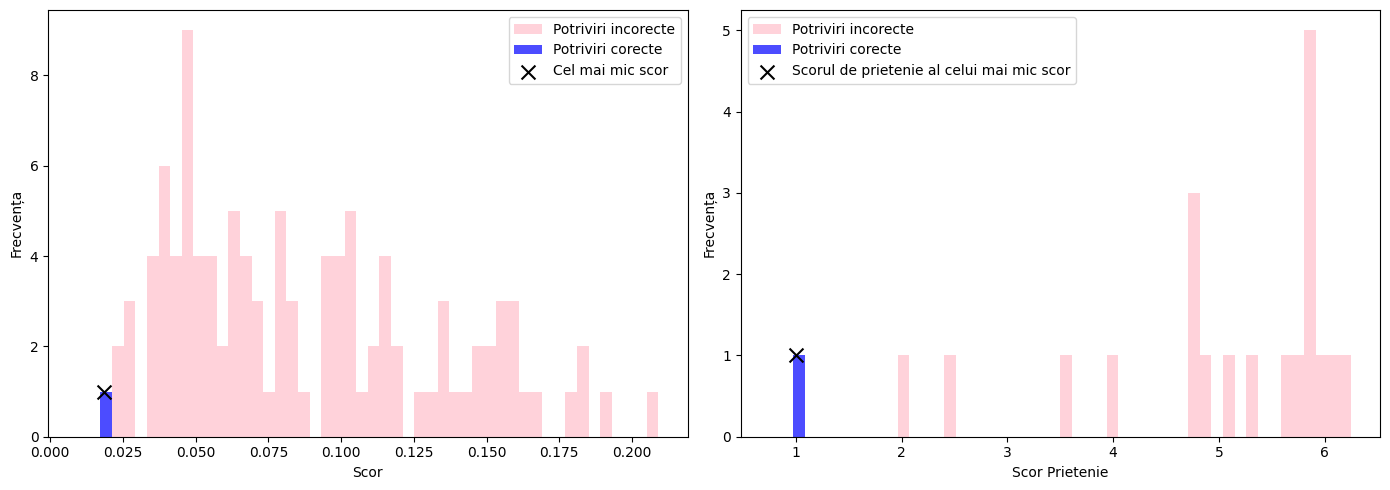

Fragment 6 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (0, 6, 2, 0, 0.01695798311151772)
Min buddy score = 1.0


Fragment 6 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (6, 7, 1, 3, 0.01858028907426789)
Min buddy score = 1.0


Fragment 6 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (6, 12, 2, 0, 0.0257142342731369)
Min buddy score = 1.0


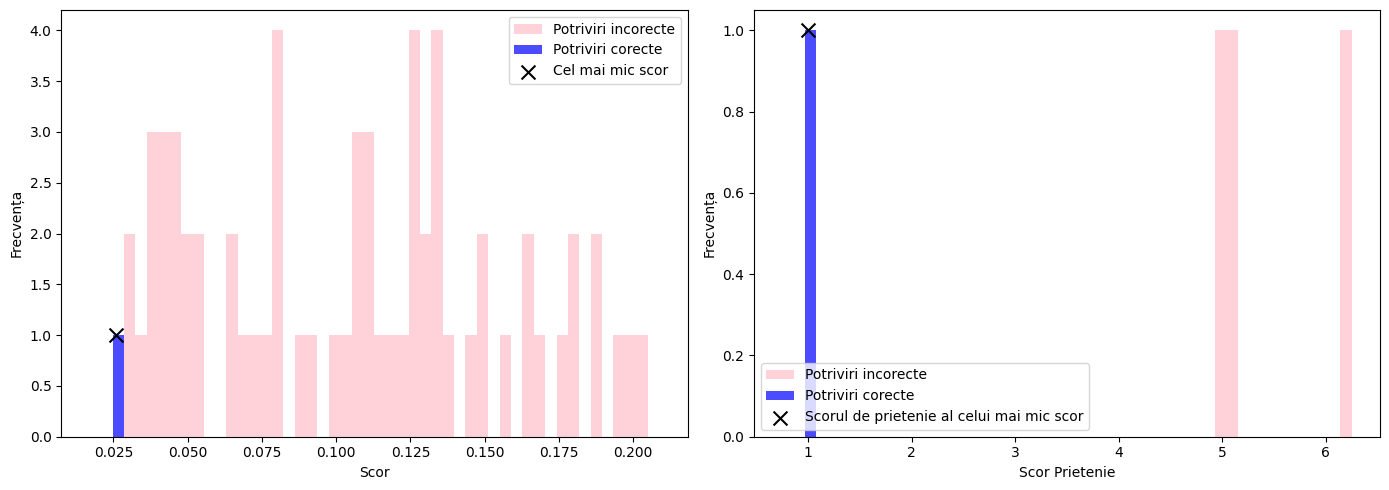

Fragment 6 side 3
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (6, 15, 3, 1, 0.02220190558084508)
Min buddy score = 6.030136258599634


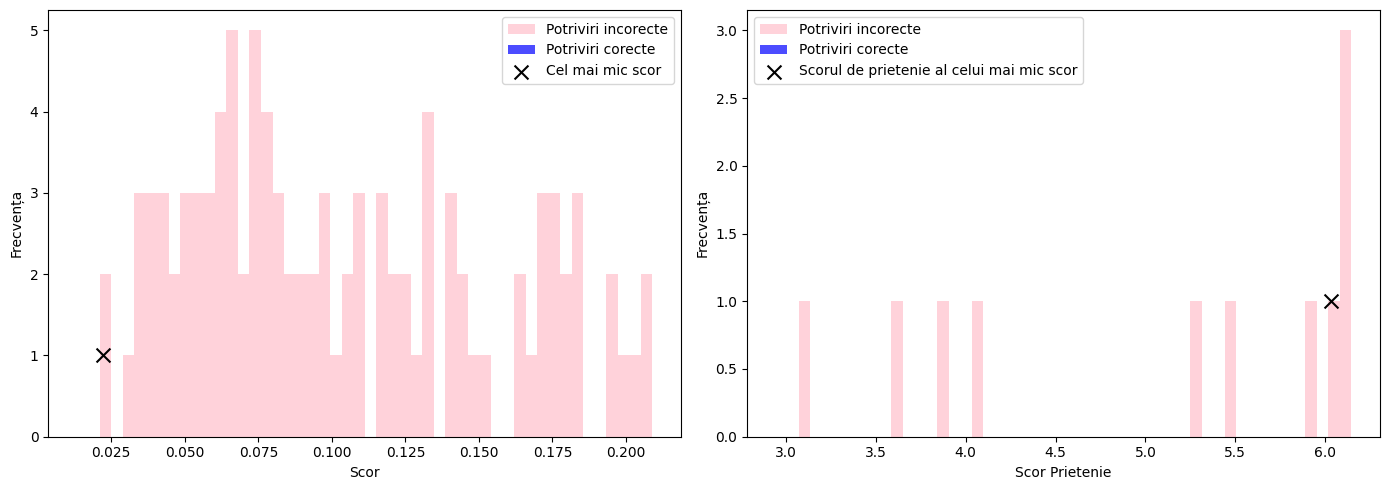

Fragment 7 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (1, 7, 2, 0, 0.021852044787728966)
Min buddy score = 1.0


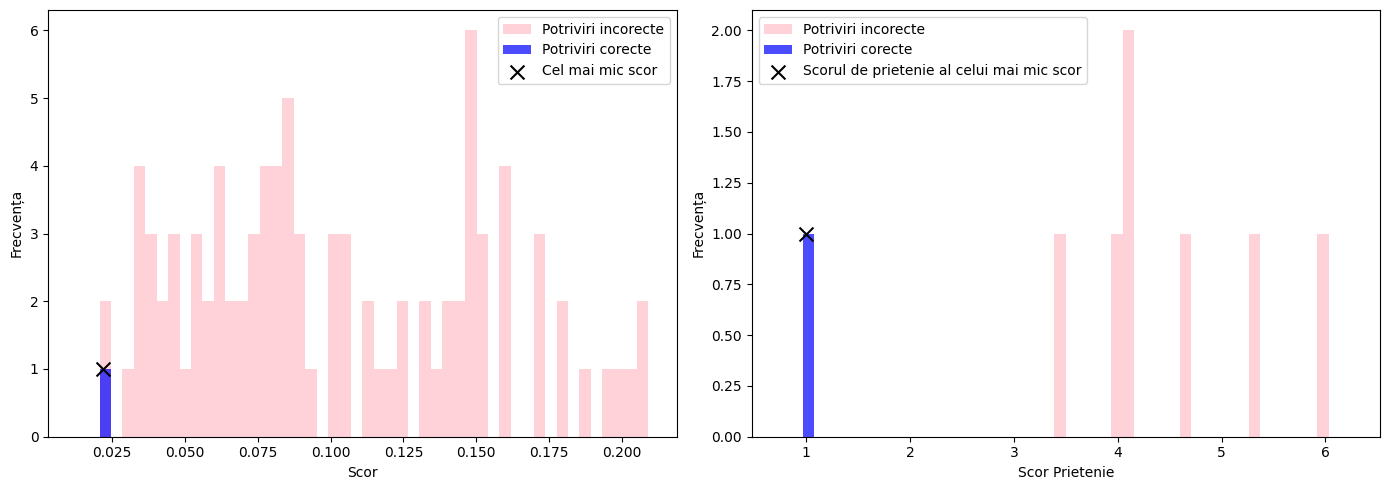

Fragment 7 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (7, 8, 1, 3, 0.0021248202650689914)
Min buddy score = 1.0


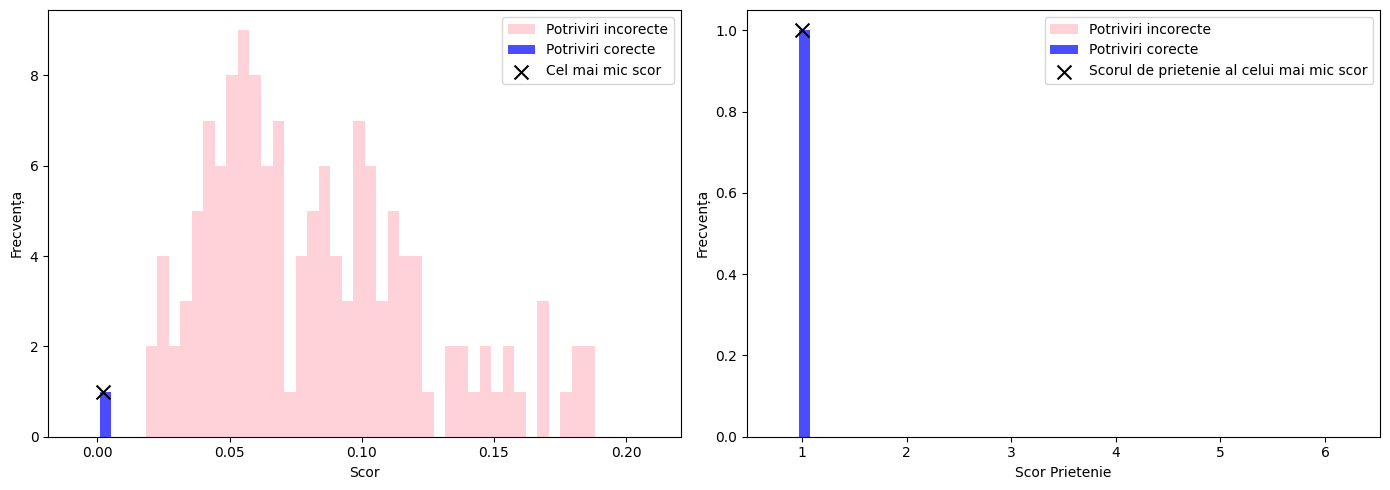

Fragment 7 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (7, 13, 2, 0, 0.005164924853483931)
Min buddy score = 1.0


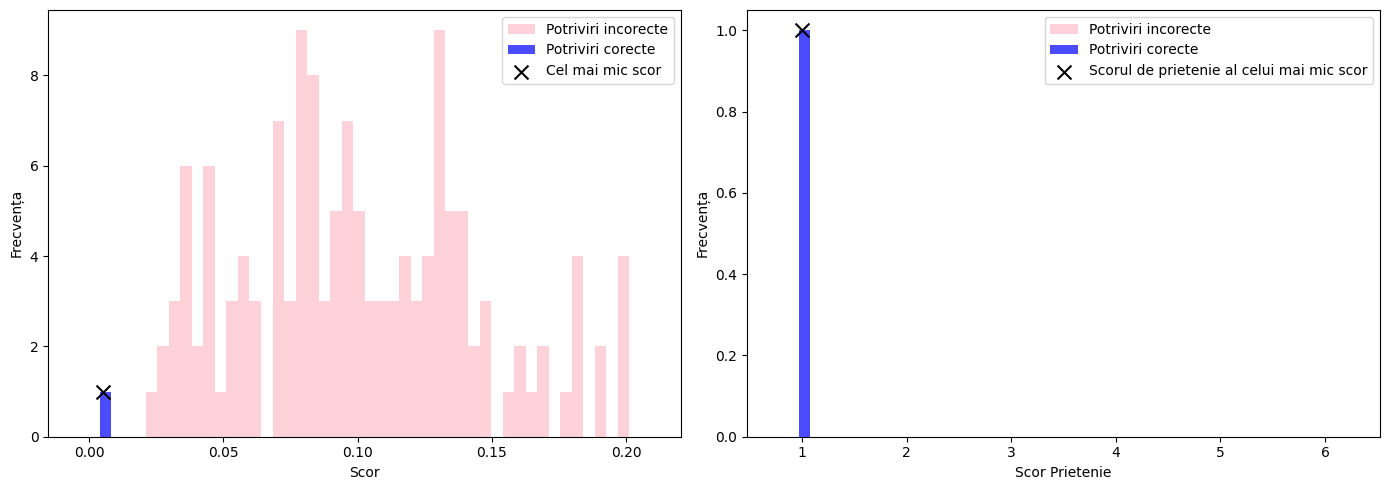

Fragment 7 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (6, 7, 1, 3, 0.01858028907426789)
Min buddy score = 1.0


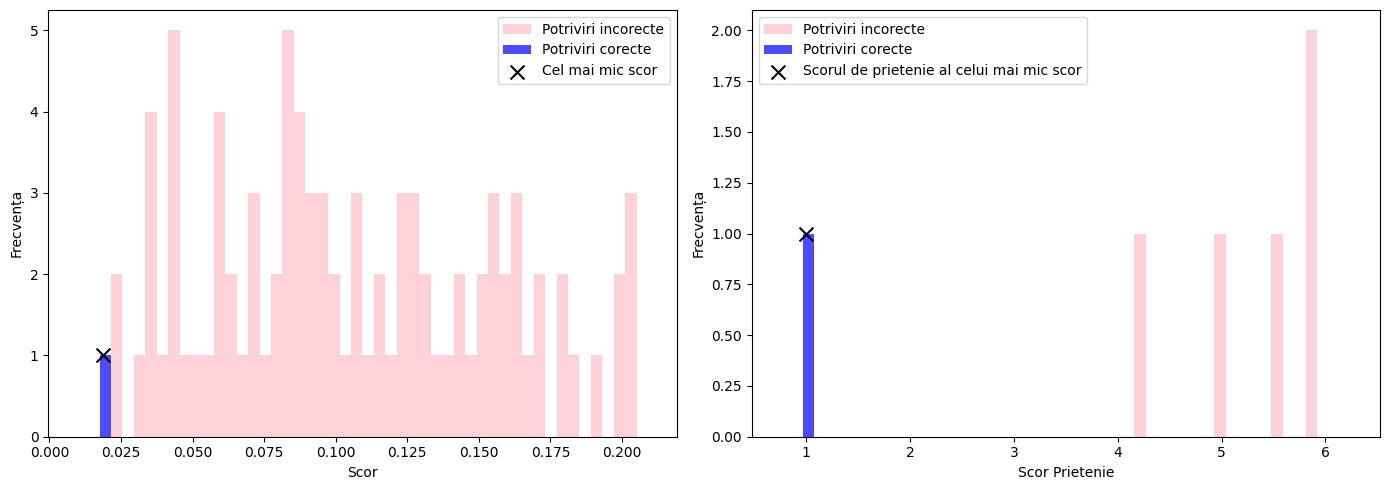

Fragment 8 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (2, 8, 2, 0, 0.014276749558389328)
Min buddy score = 1.0


Fragment 8 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (8, 9, 1, 3, 0.004545616235333568)
Min buddy score = 1.0


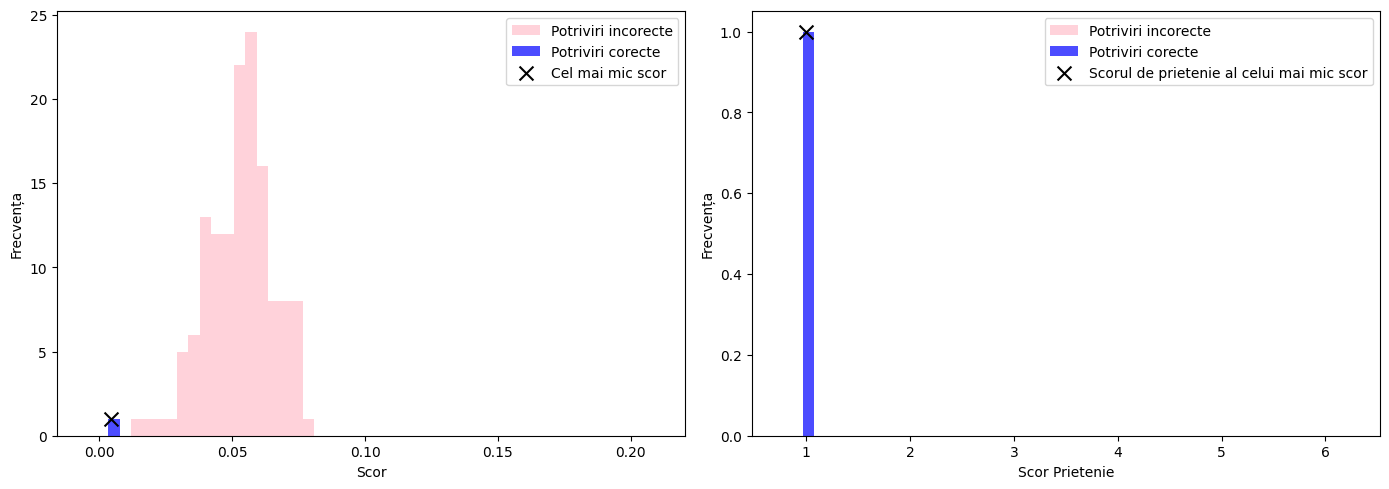

Fragment 8 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (8, 14, 2, 0, 0.0038547273469827377)
Min buddy score = 1.0


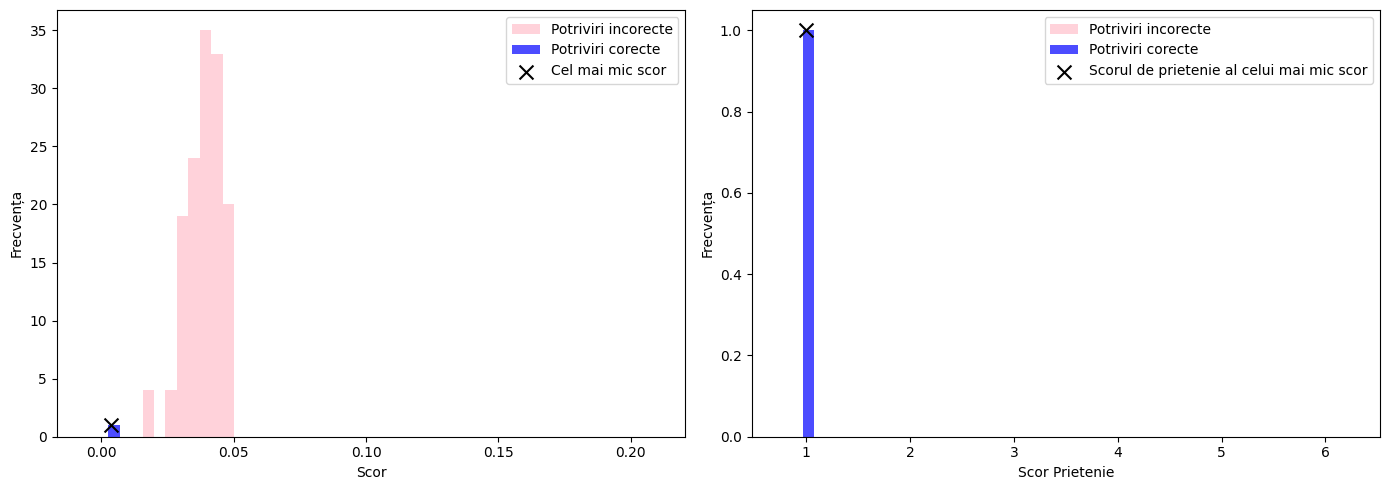

Fragment 8 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (7, 8, 1, 3, 0.0021248202650689914)
Min buddy score = 1.0


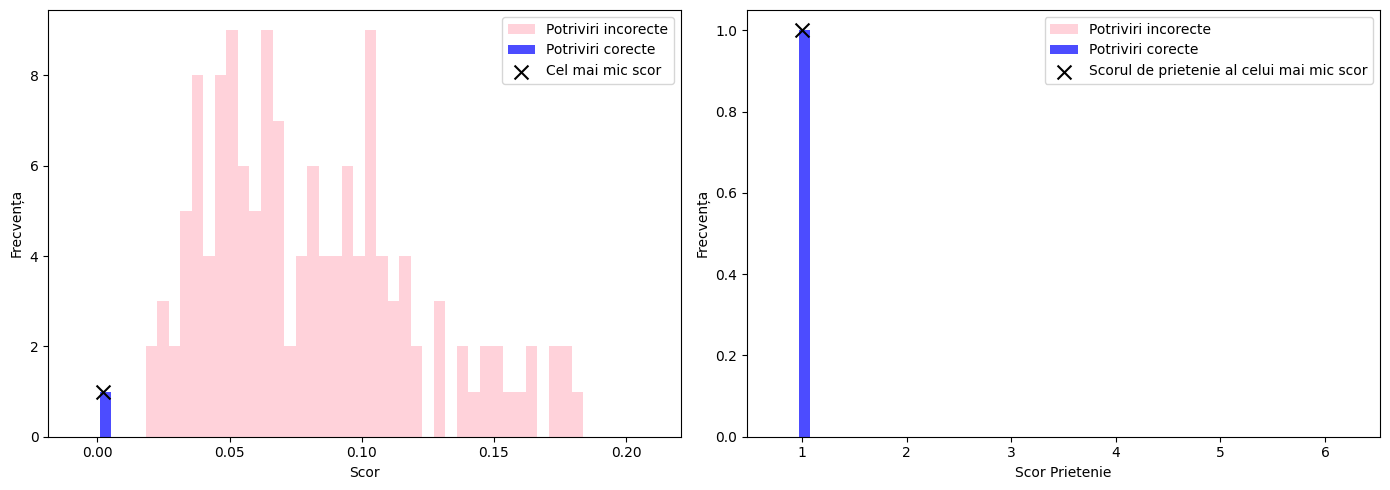

Fragment 9 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (3, 9, 2, 0, 0.006242739154261254)
Min buddy score = 1.0


Fragment 9 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (9, 10, 1, 3, 0.010490939360250614)
Min buddy score = 1.0


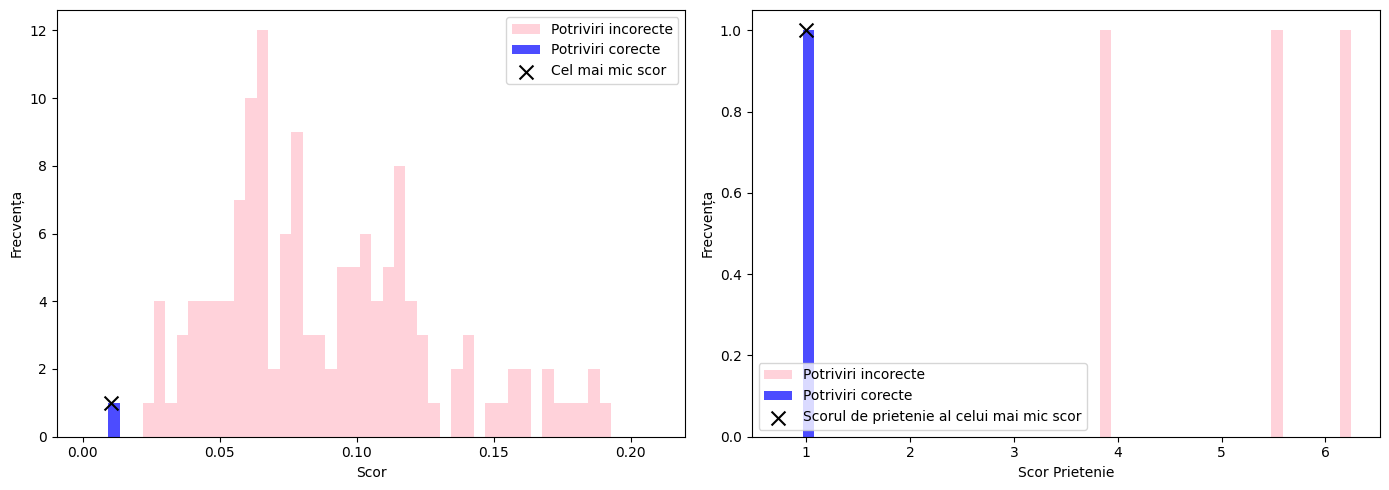

Fragment 9 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (9, 15, 2, 0, 0.00415025253631209)
Min buddy score = 1.0


Fragment 9 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (8, 9, 1, 3, 0.004545616235333568)
Min buddy score = 1.0


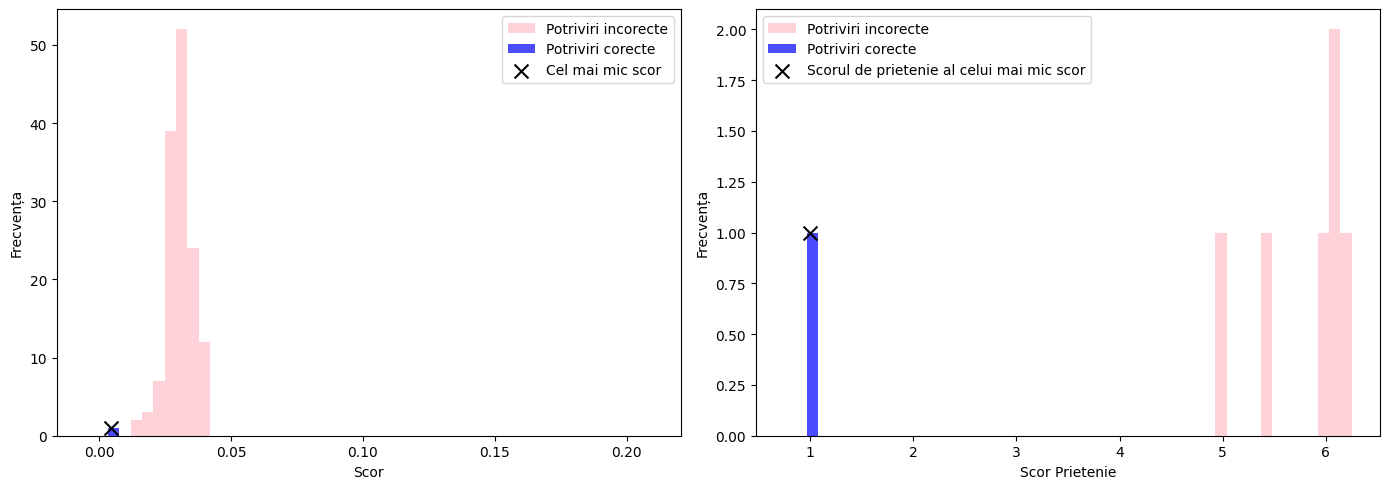

Fragment 10 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (10, 15, 0, 1, 0.022653115032593842)
Min buddy score = 6.152686751633012


Fragment 10 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (10, 11, 1, 3, 0.01716092360162075)
Min buddy score = 1.0


Fragment 10 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (10, 16, 2, 0, 0.017524036721212024)
Min buddy score = 1.0


Fragment 10 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (9, 10, 1, 3, 0.010490939360250614)
Min buddy score = 1.0


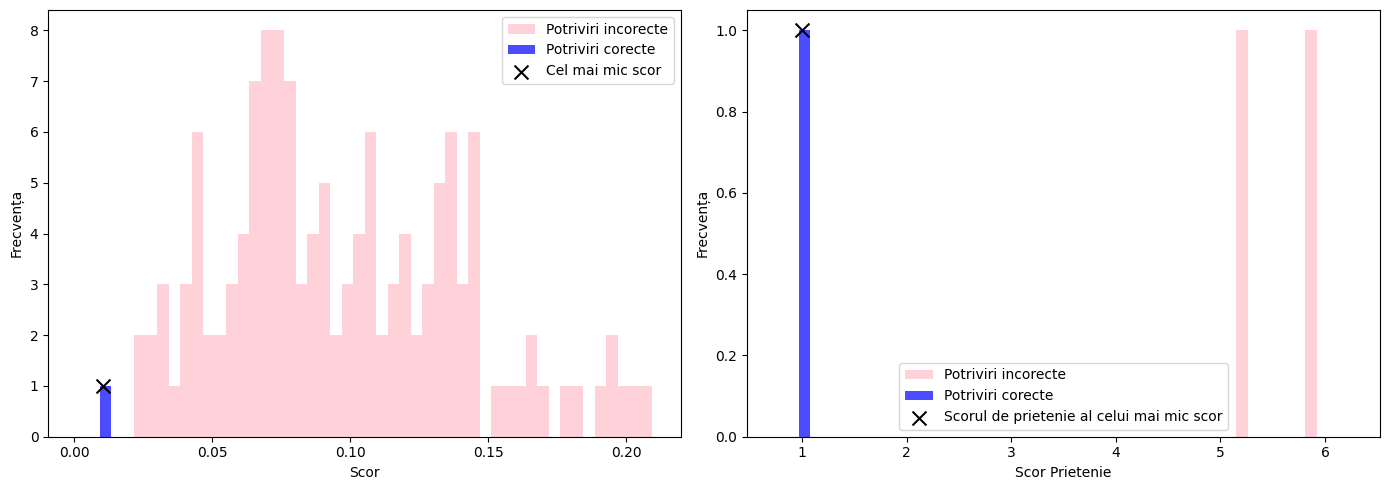

Fragment 11 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (11, 15, 0, 1, 0.021563993824412327)
Min buddy score = 5.856876589593074


Fragment 11 side 1
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (11, 15, 1, 1, 0.022252549015375444)
Min buddy score = 6.043891240563211


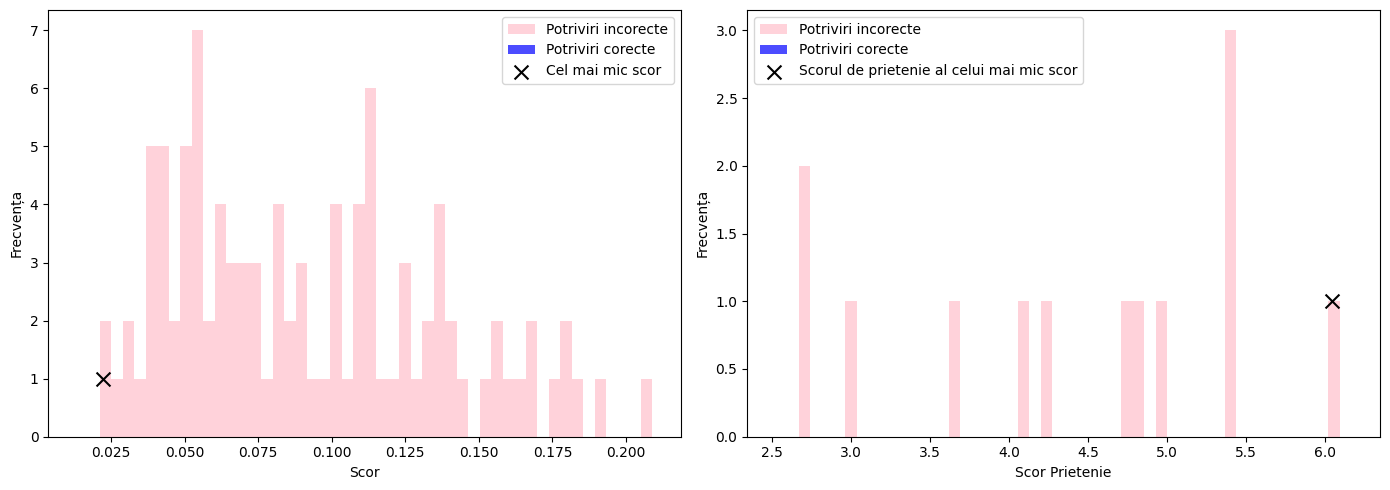

Fragment 11 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (11, 17, 2, 0, 0.014224645257683724)
Min buddy score = 1.0


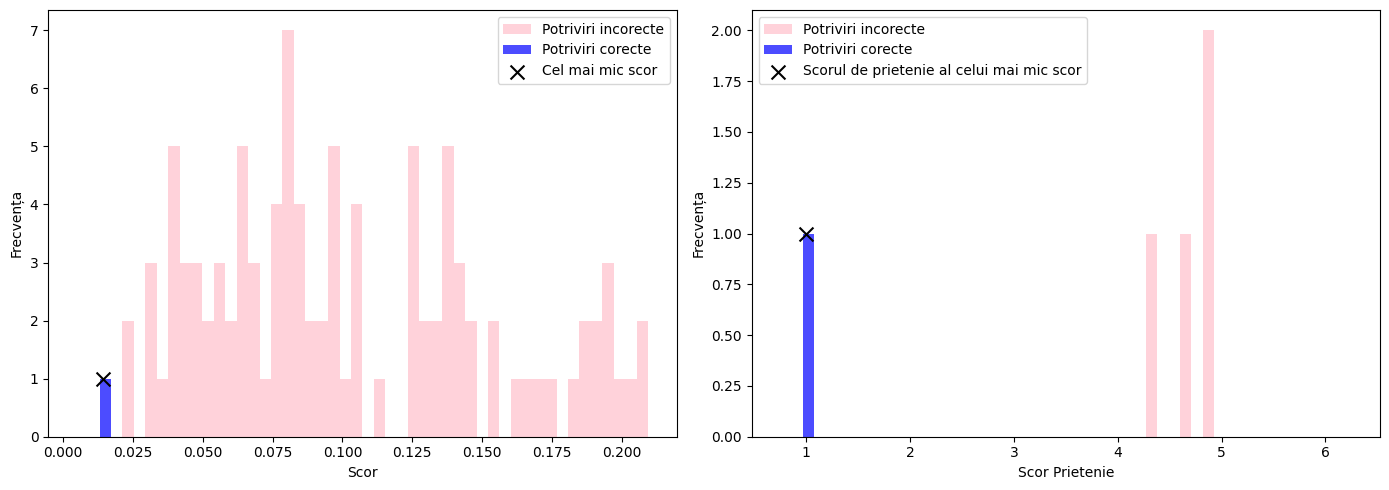

Fragment 11 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (10, 11, 1, 3, 0.01716092360162075)
Min buddy score = 1.0


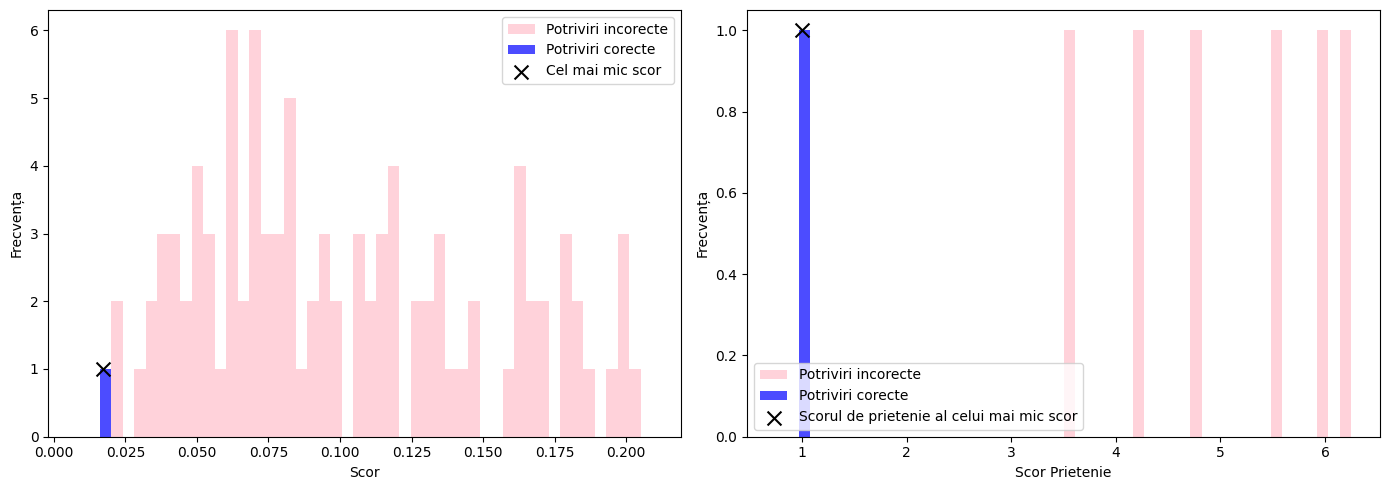

Fragment 12 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (6, 12, 2, 0, 0.0257142342731369)
Min buddy score = 1.0


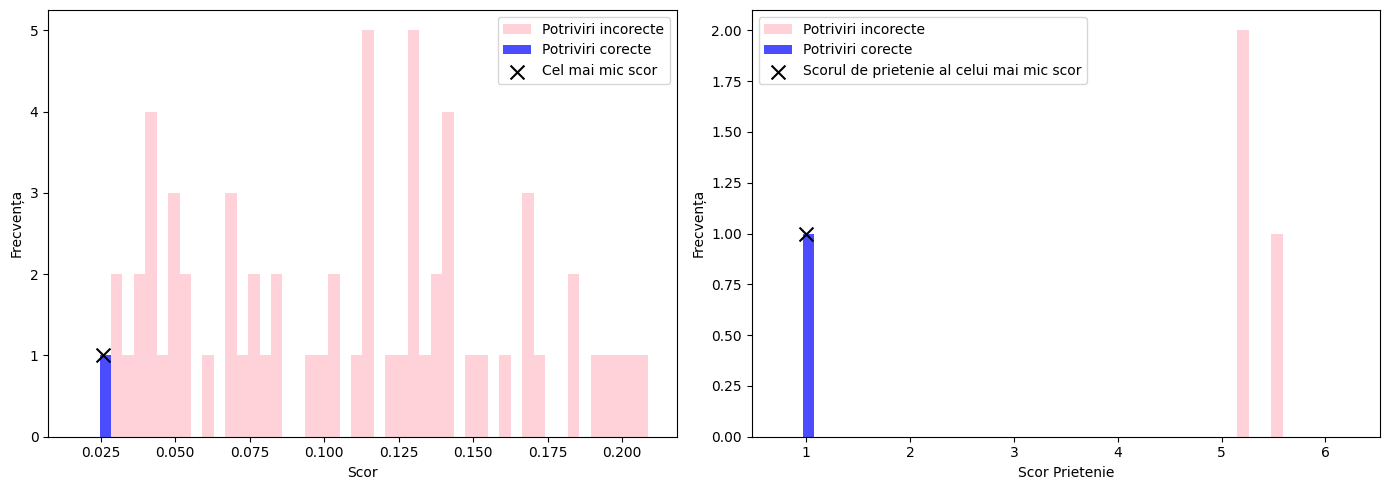

Fragment 12 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (12, 13, 1, 3, 0.010259171695252388)
Min buddy score = 1.0


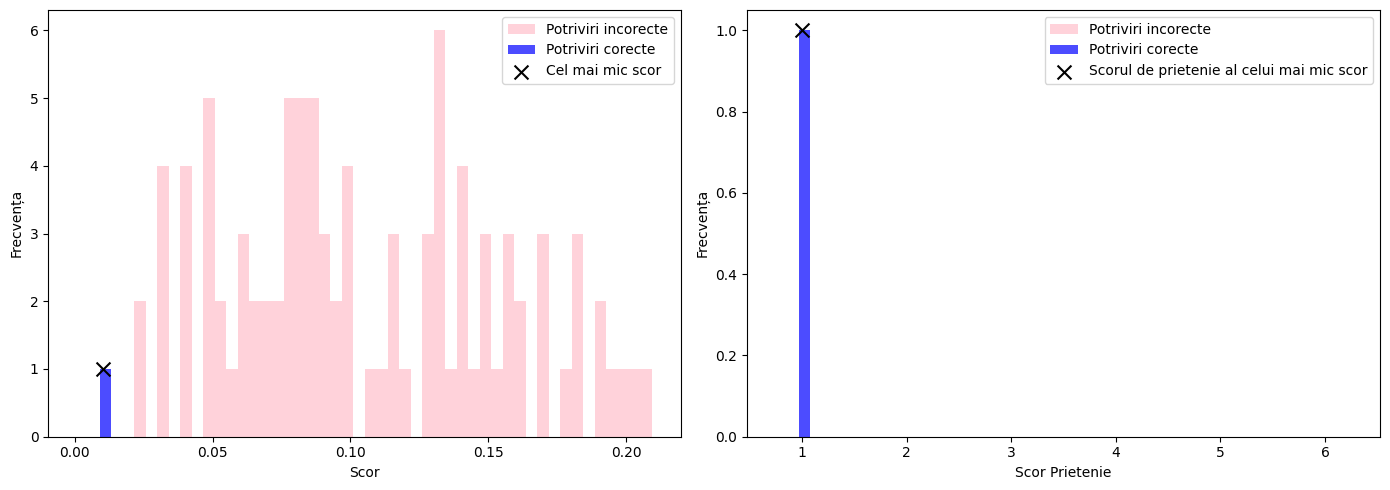

Fragment 12 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (12, 18, 2, 0, 0.016668266273517224)
Min buddy score = 1.0


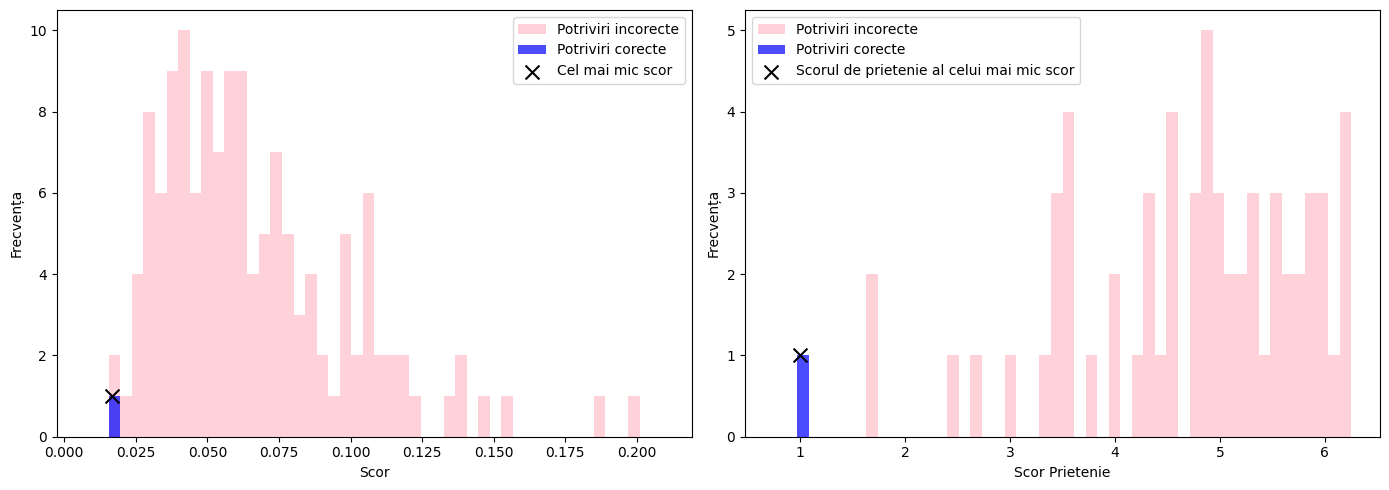

Fragment 12 side 3
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (12, 16, 3, 3, 0.02355687788991152)
Min buddy score = 6.398152761532127


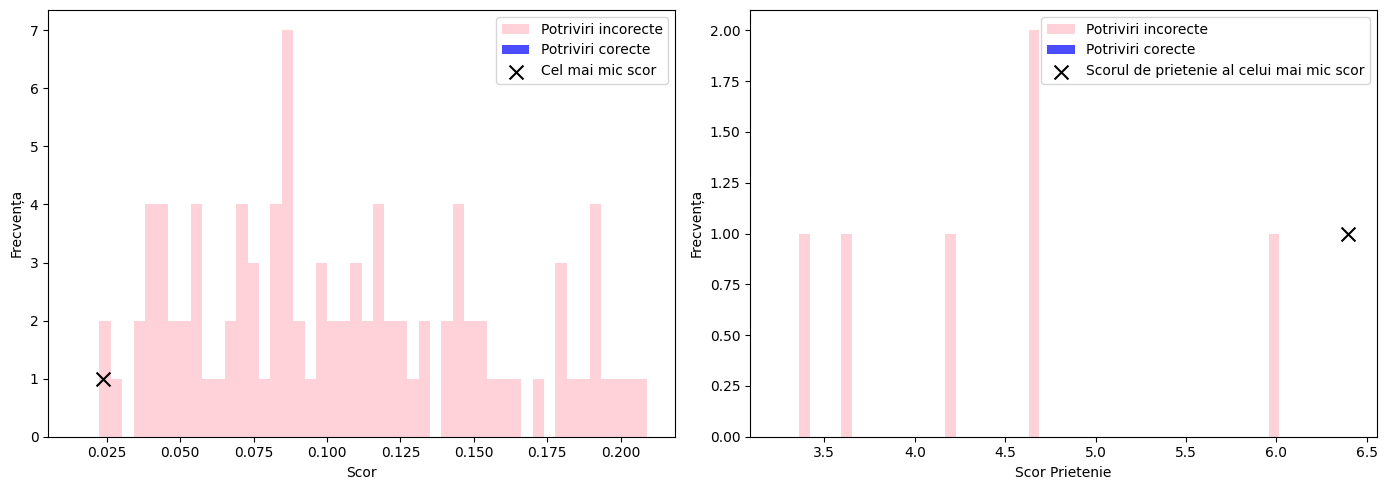

Fragment 13 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (7, 13, 2, 0, 0.005164924853483931)
Min buddy score = 1.0


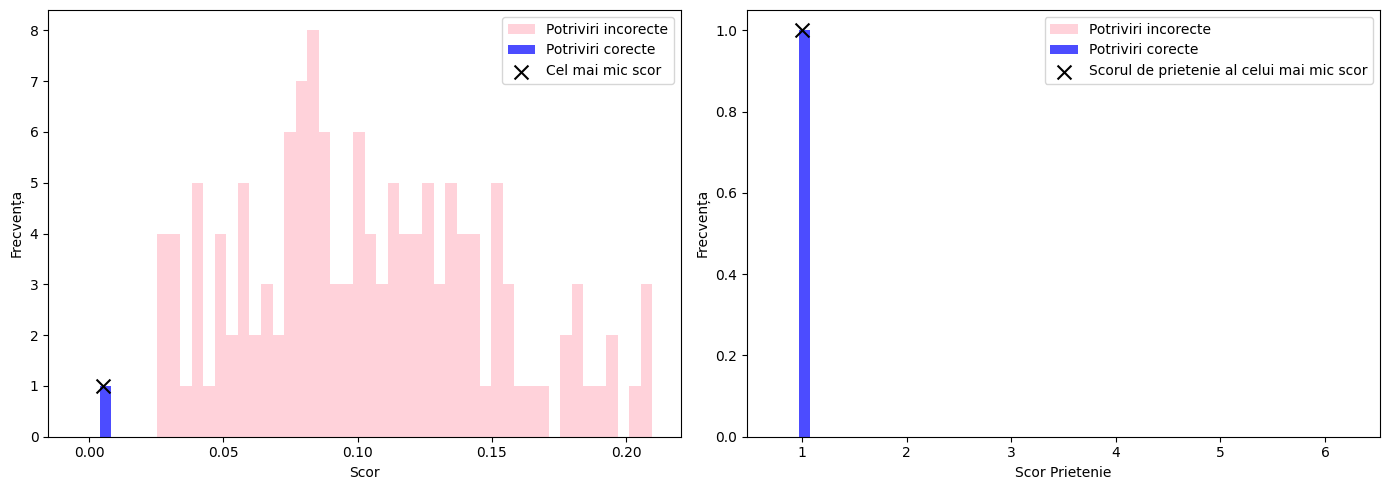

Fragment 13 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (13, 14, 1, 3, 0.002021117269364173)
Min buddy score = 1.0


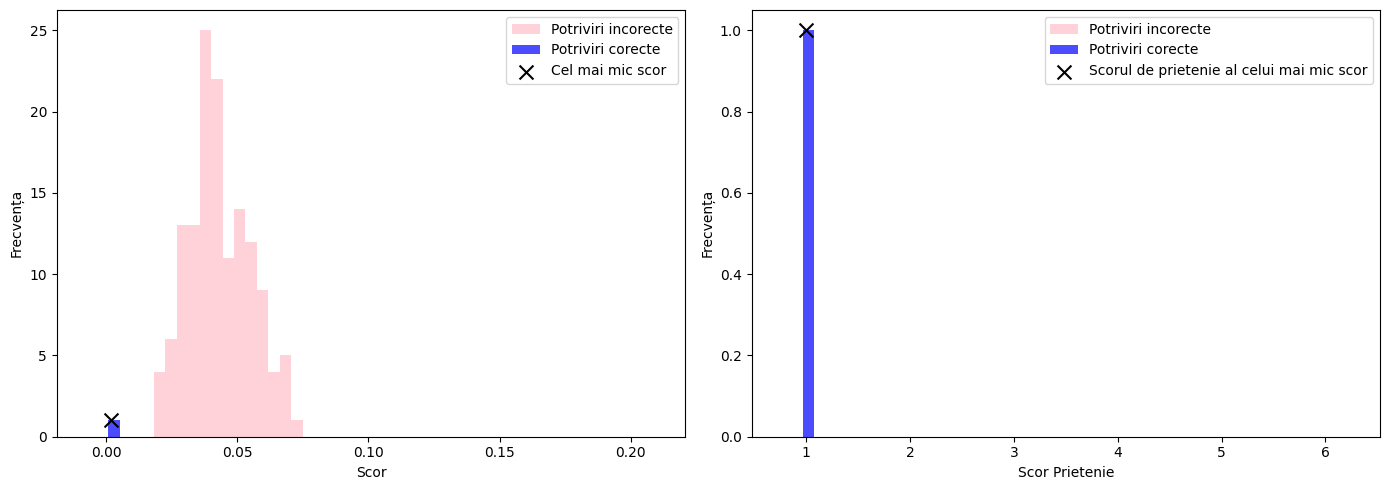

Fragment 13 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (13, 19, 2, 0, 0.010744603170504576)
Min buddy score = 1.0


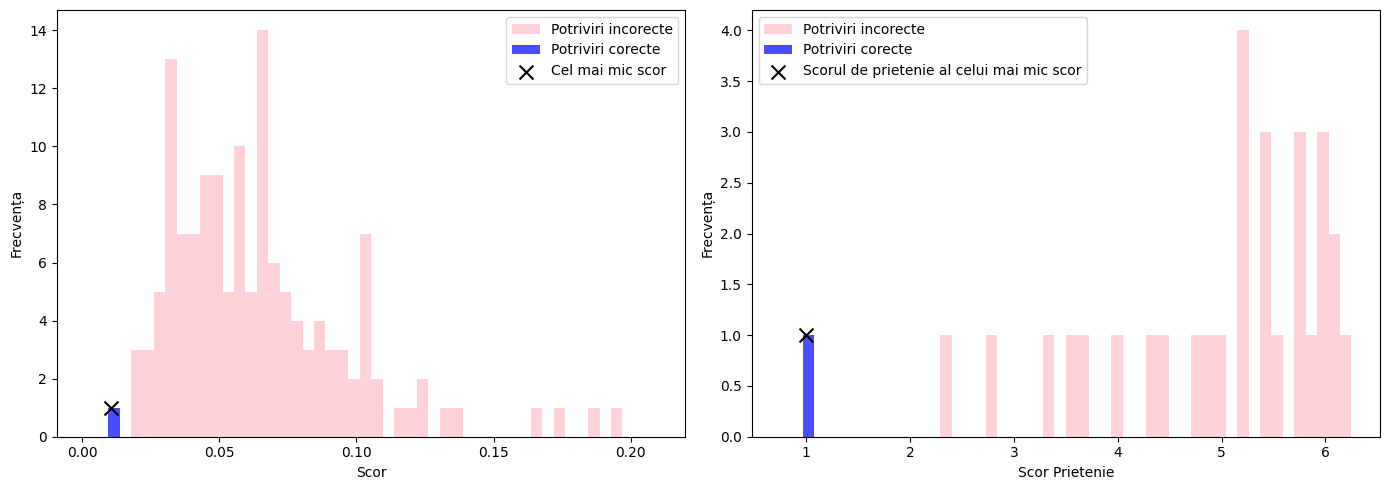

Fragment 13 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (12, 13, 1, 3, 0.010259171695252388)
Min buddy score = 1.0


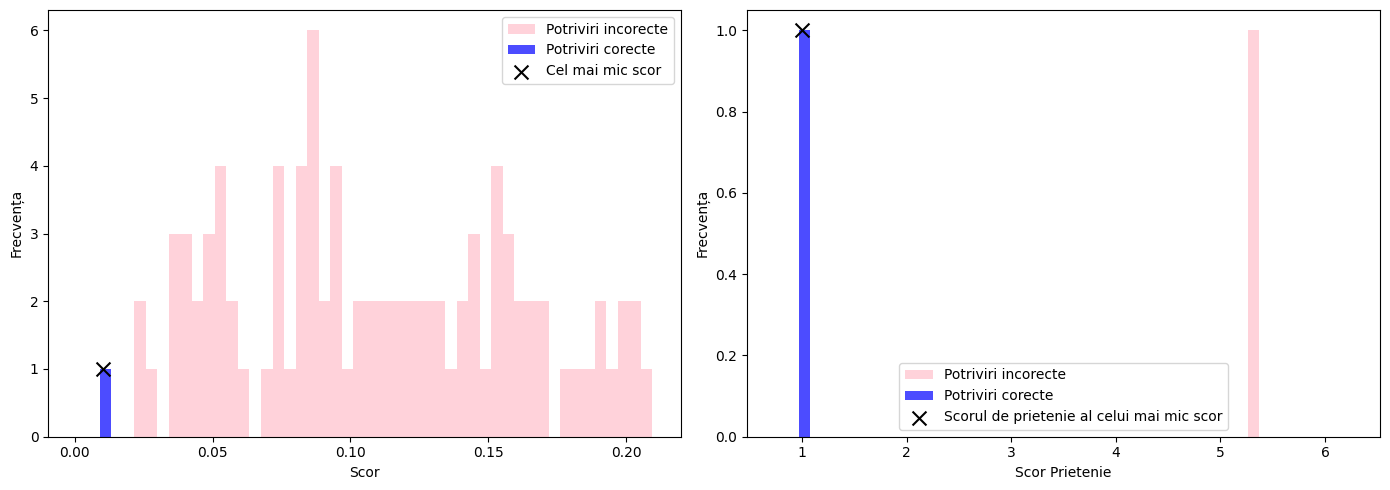

Fragment 14 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (8, 14, 2, 0, 0.0038547273469827377)
Min buddy score = 1.0


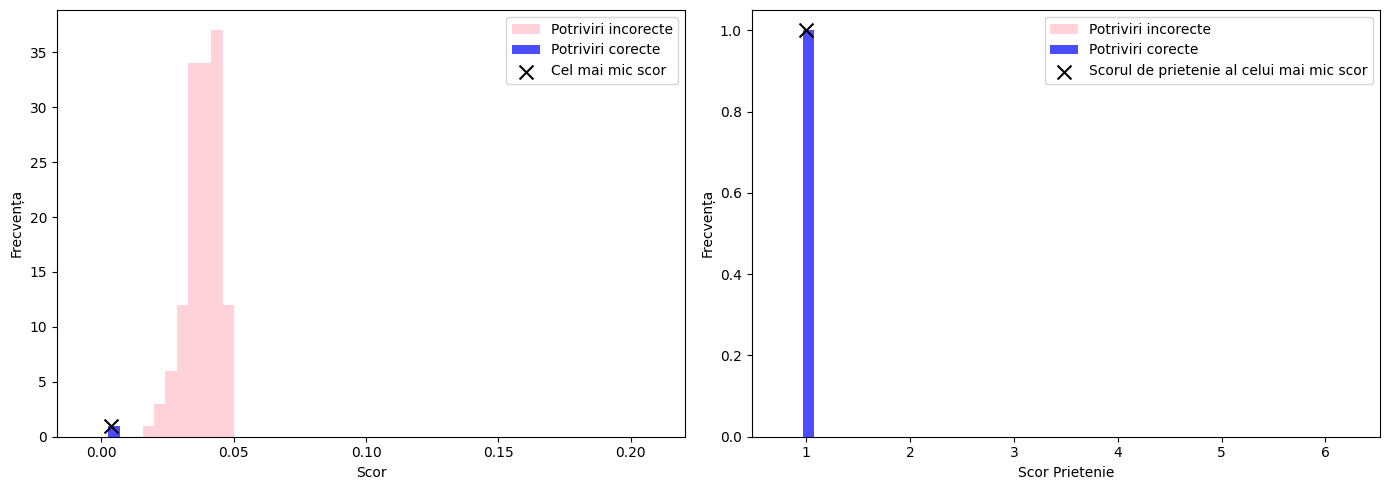

Fragment 14 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (14, 15, 1, 3, 0.0039649523192862735)
Min buddy score = 1.0


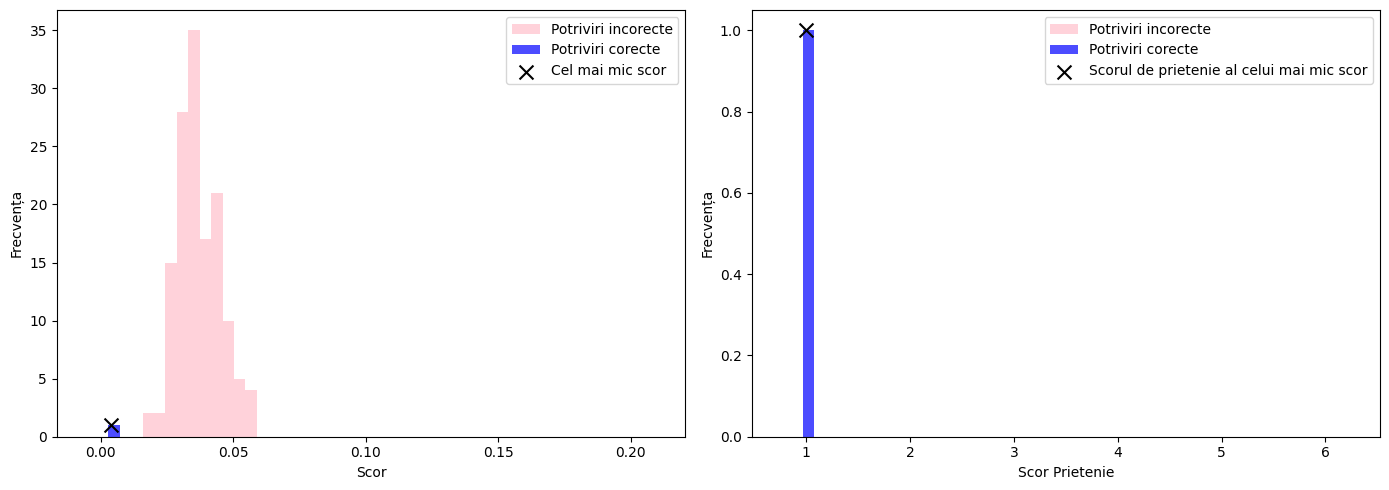

Fragment 14 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (14, 20, 2, 0, 0.012220565415338525)
Min buddy score = 1.0


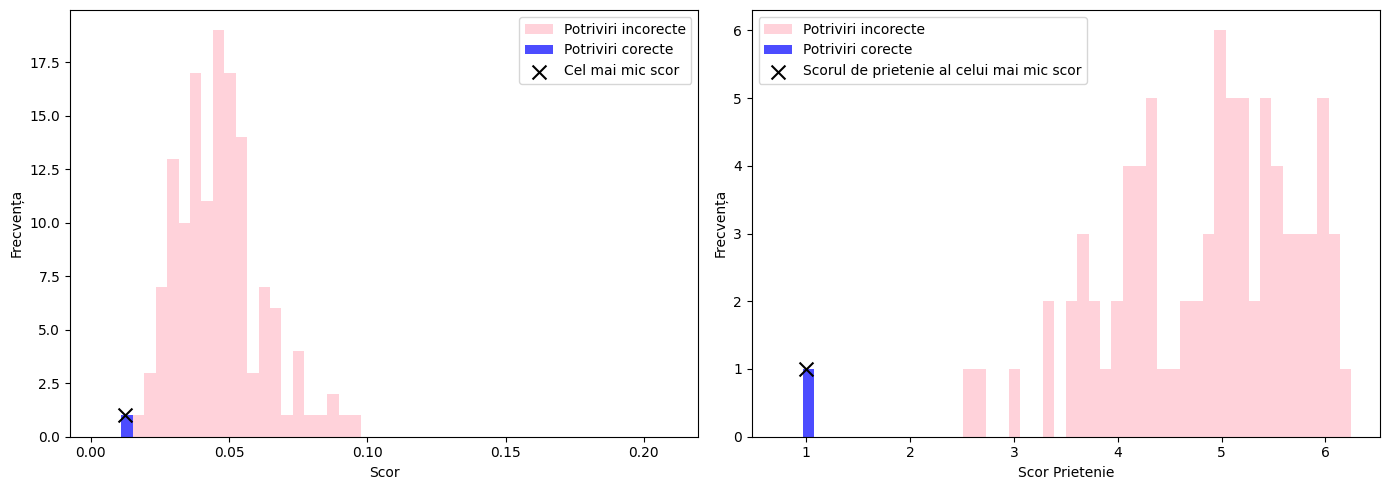

Fragment 14 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (13, 14, 1, 3, 0.002021117269364173)
Min buddy score = 1.0


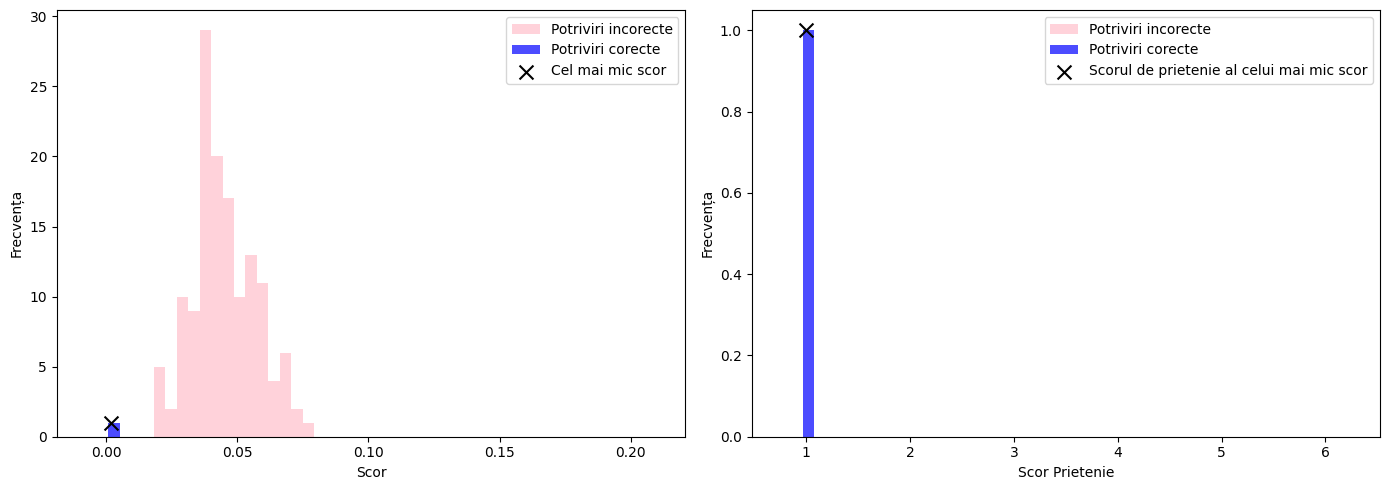

Fragment 15 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (9, 15, 2, 0, 0.00415025253631209)
Min buddy score = 1.0


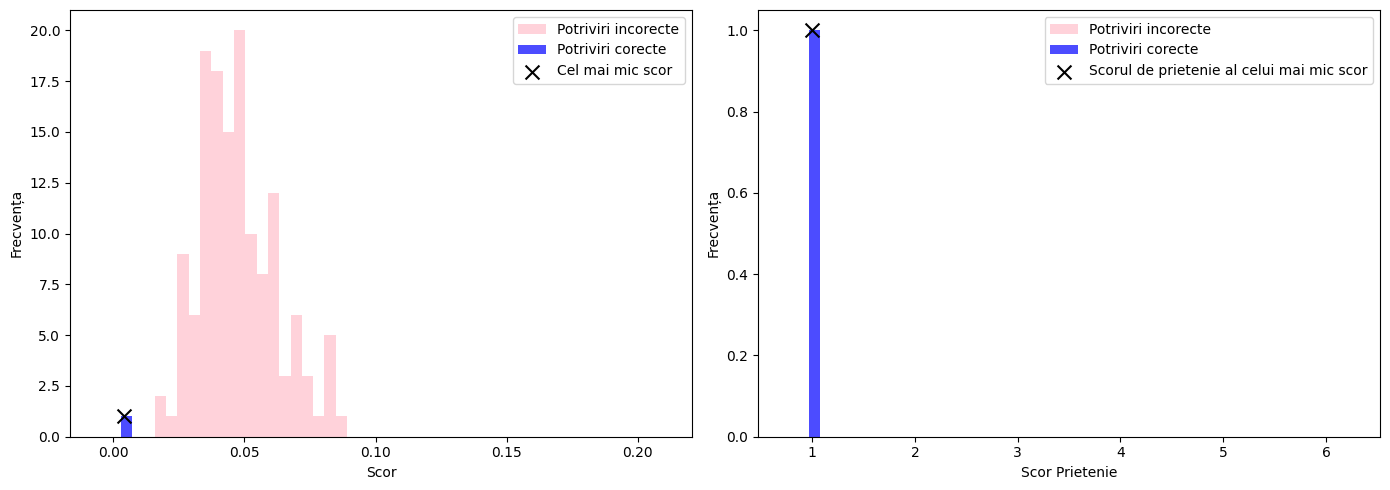

Fragment 15 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (15, 16, 1, 3, 0.0036818248591286365)
Min buddy score = 1.0


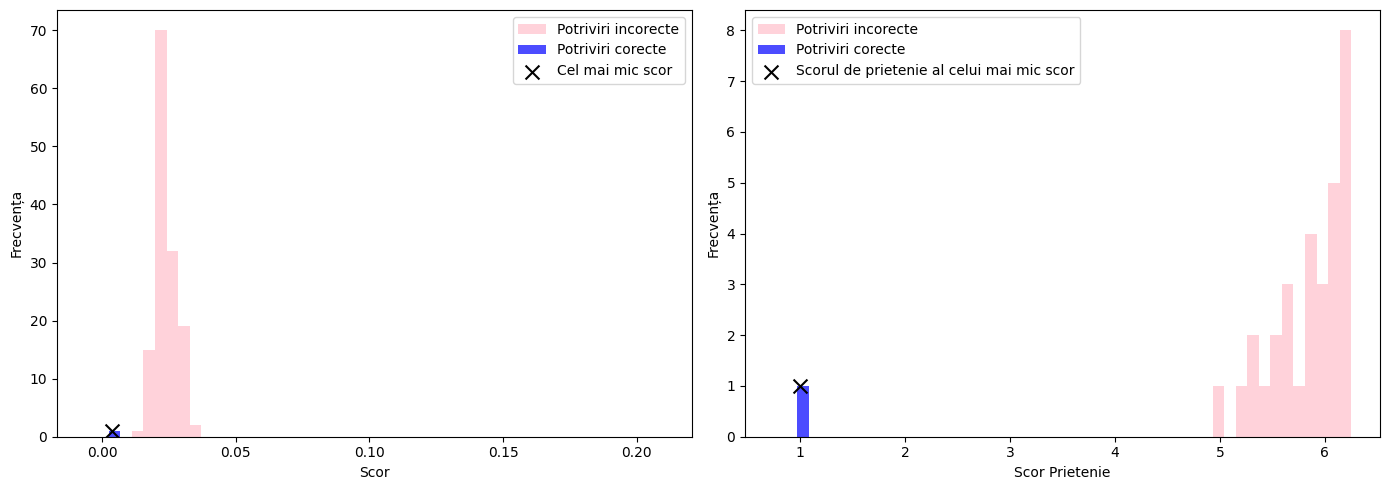

Fragment 15 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (15, 21, 2, 0, 0.009860417182471978)
Min buddy score = 1.0


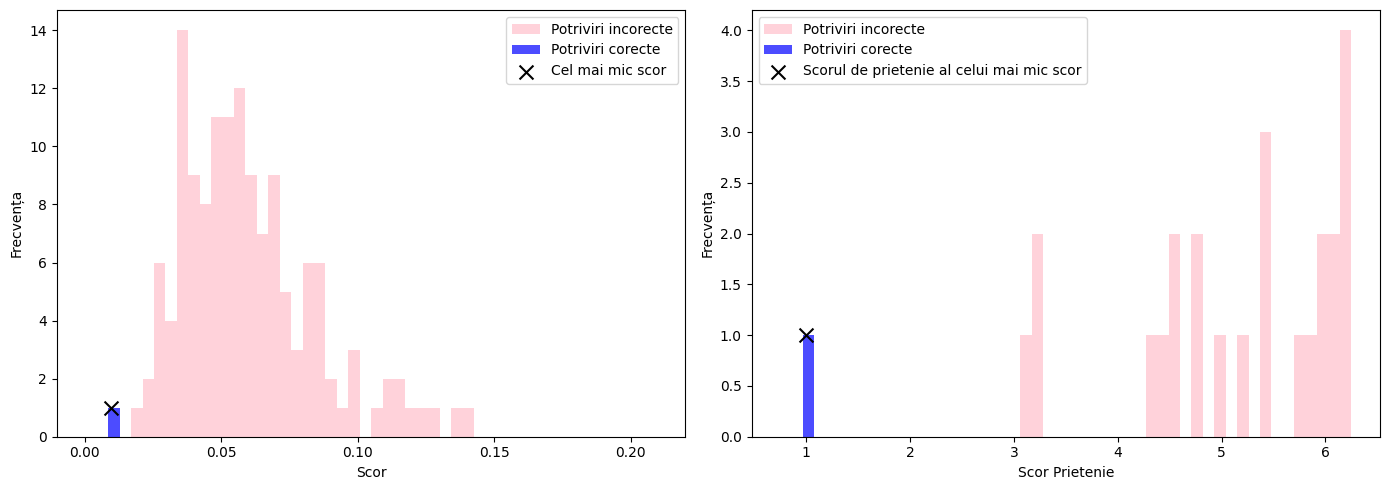

Fragment 15 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (14, 15, 1, 3, 0.0039649523192862735)
Min buddy score = 1.0


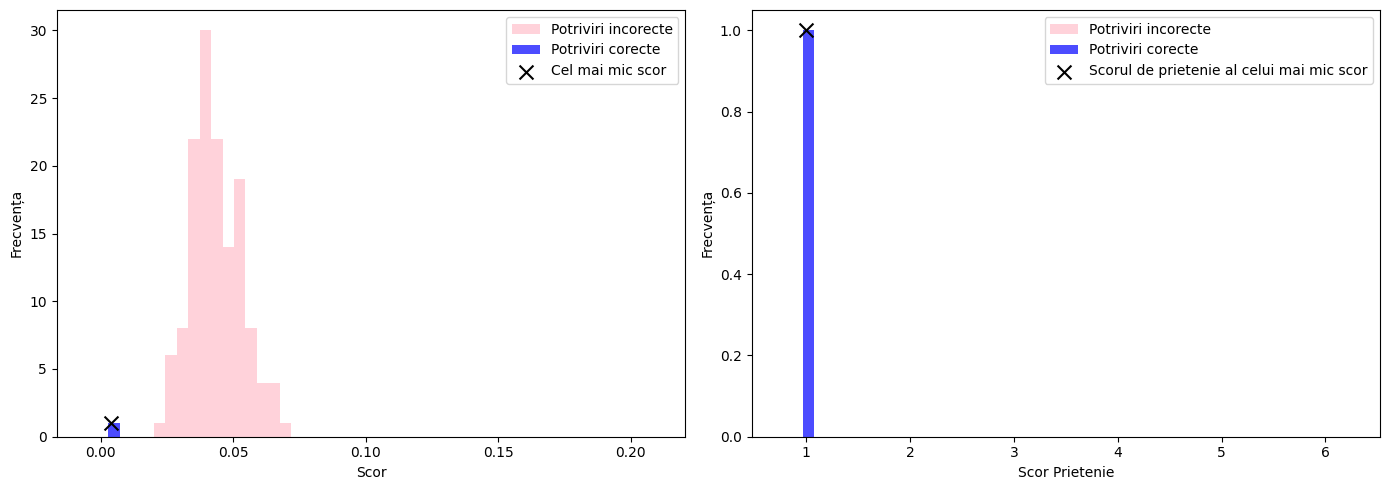

Fragment 16 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (10, 16, 2, 0, 0.017524036721212024)
Min buddy score = 1.0


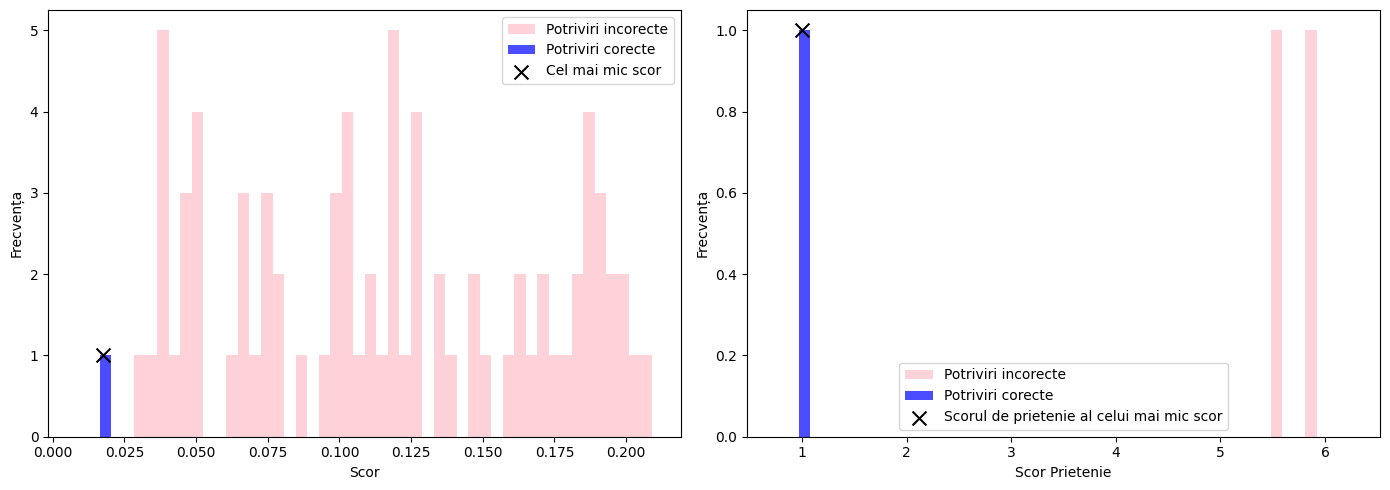

Fragment 16 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (16, 17, 1, 3, 0.008616291250755517)
Min buddy score = 1.0


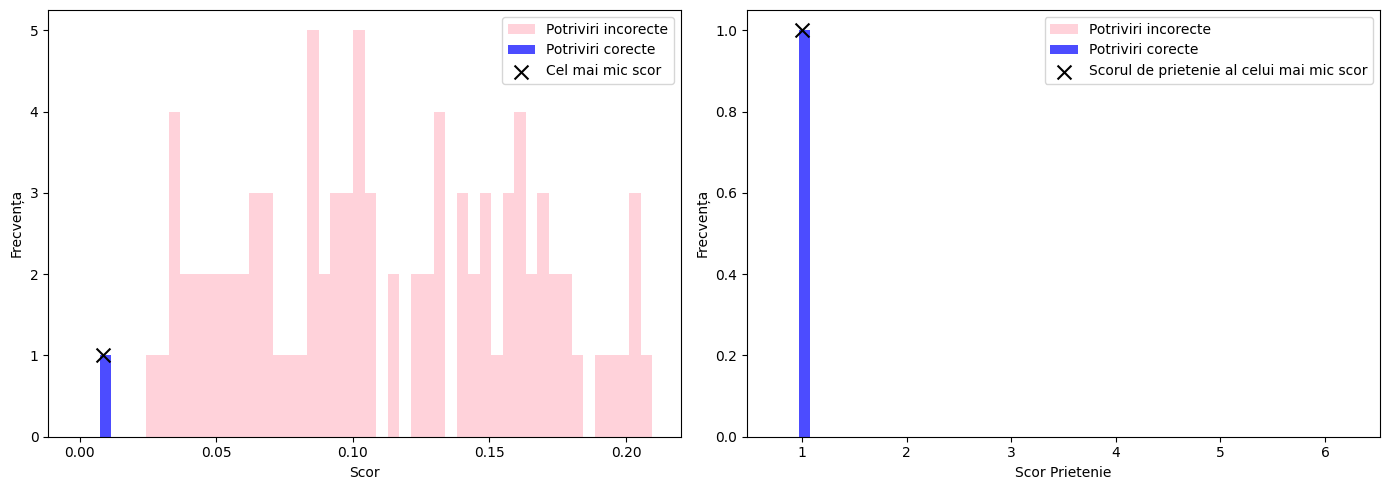

Fragment 16 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (16, 22, 2, 0, 0.01686334184127828)
Min buddy score = 1.0


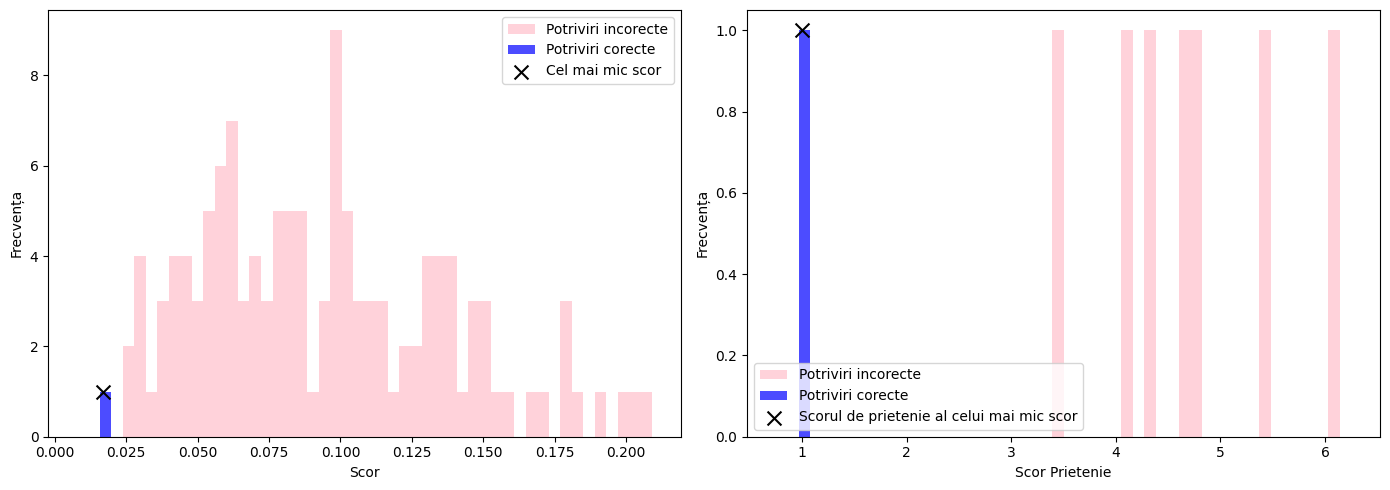

Fragment 16 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (15, 16, 1, 3, 0.0036818248591286365)
Min buddy score = 1.0


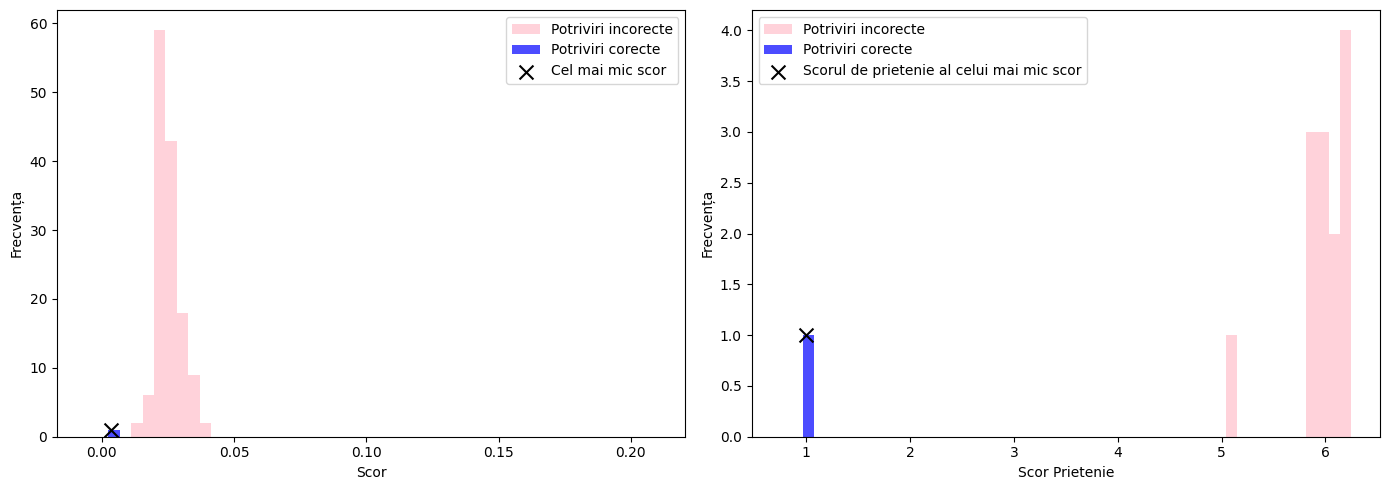

Fragment 17 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (11, 17, 2, 0, 0.014224645257683724)
Min buddy score = 1.0


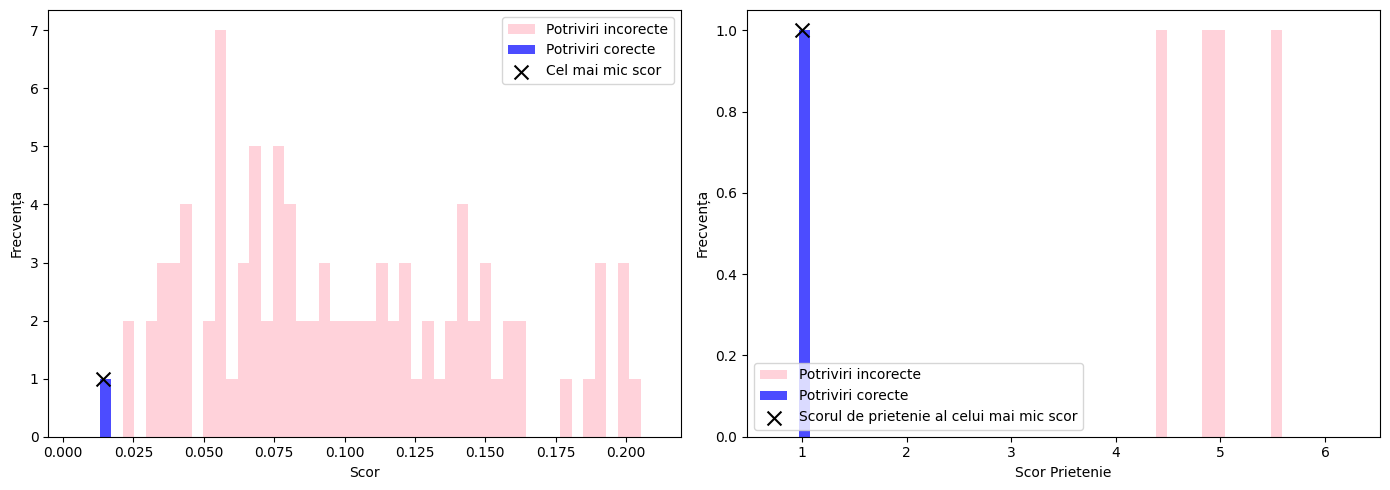

Fragment 17 side 1
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (15, 17, 1, 1, 0.022817985773007695)
Min buddy score = 6.197466377694006


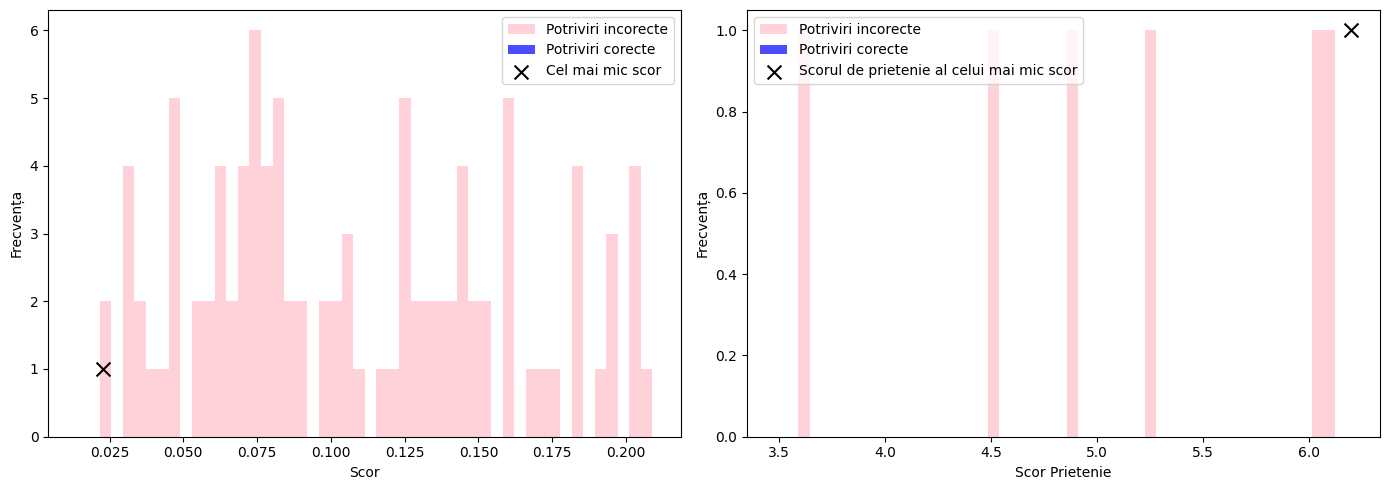

Fragment 17 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (17, 23, 2, 0, 0.019626080303566995)
Min buddy score = 1.0


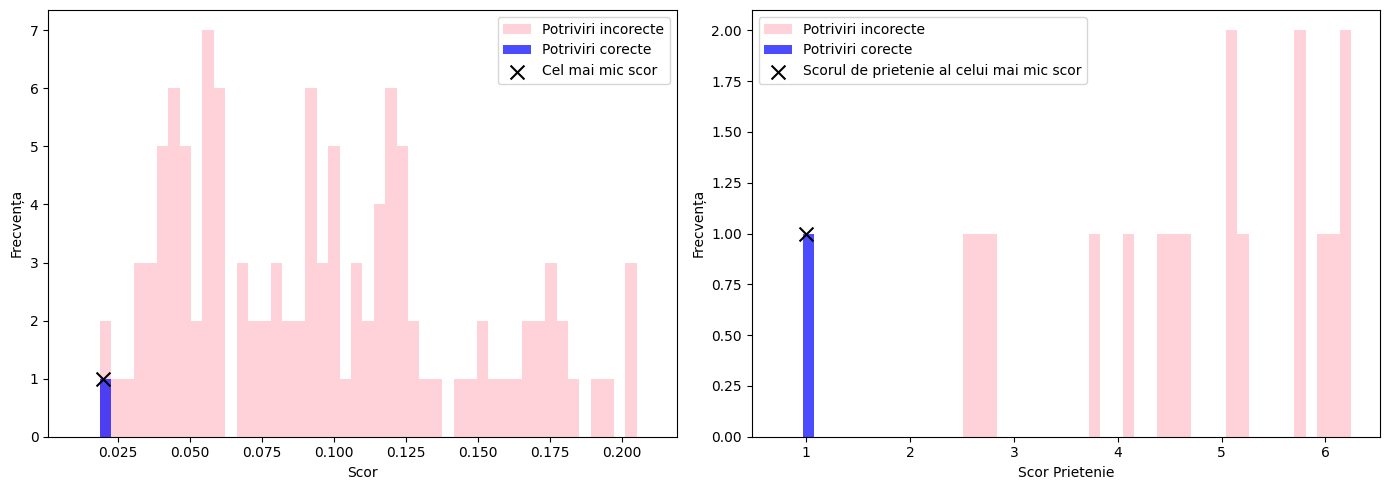

Fragment 17 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (16, 17, 1, 3, 0.008616291250755517)
Min buddy score = 1.0


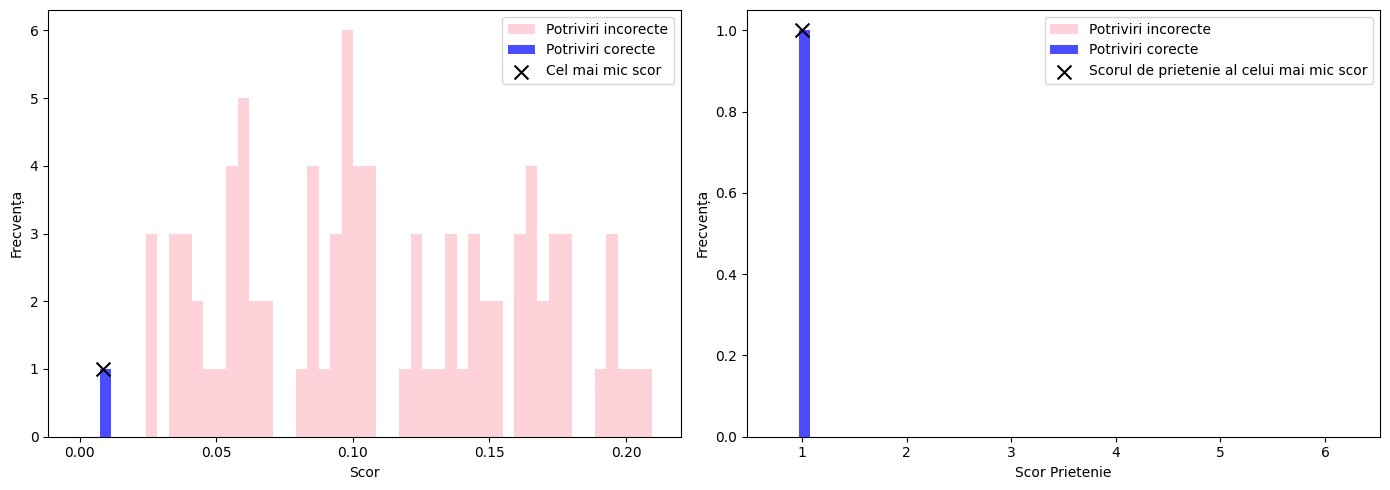

Fragment 18 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (12, 18, 2, 0, 0.016668266273517224)
Min buddy score = 1.0


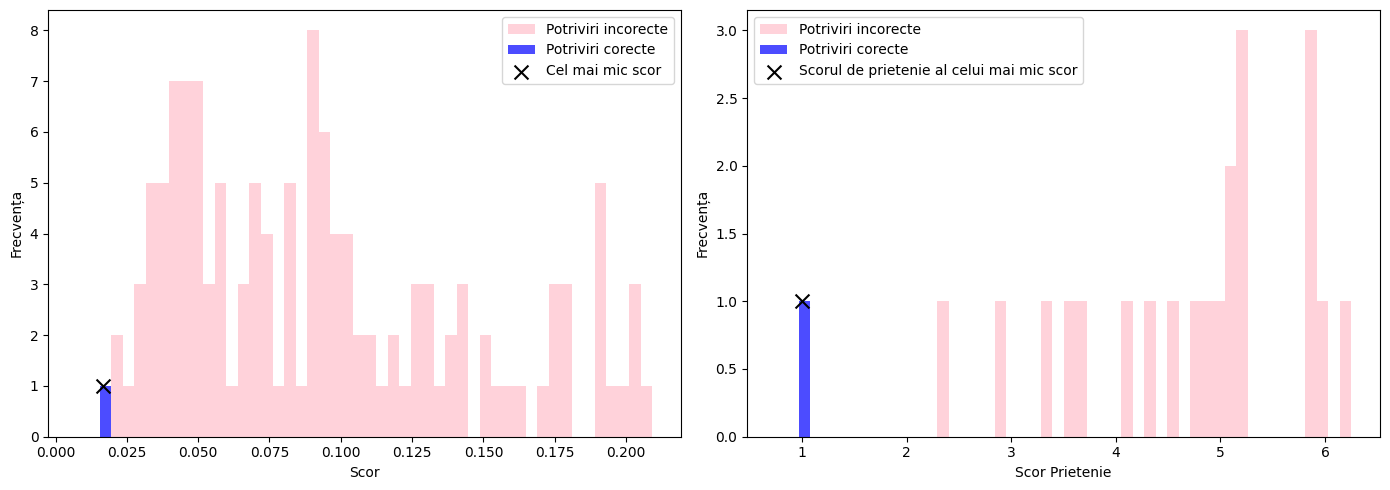

Fragment 18 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (18, 19, 1, 3, 0.009168861535346988)
Min buddy score = 1.0


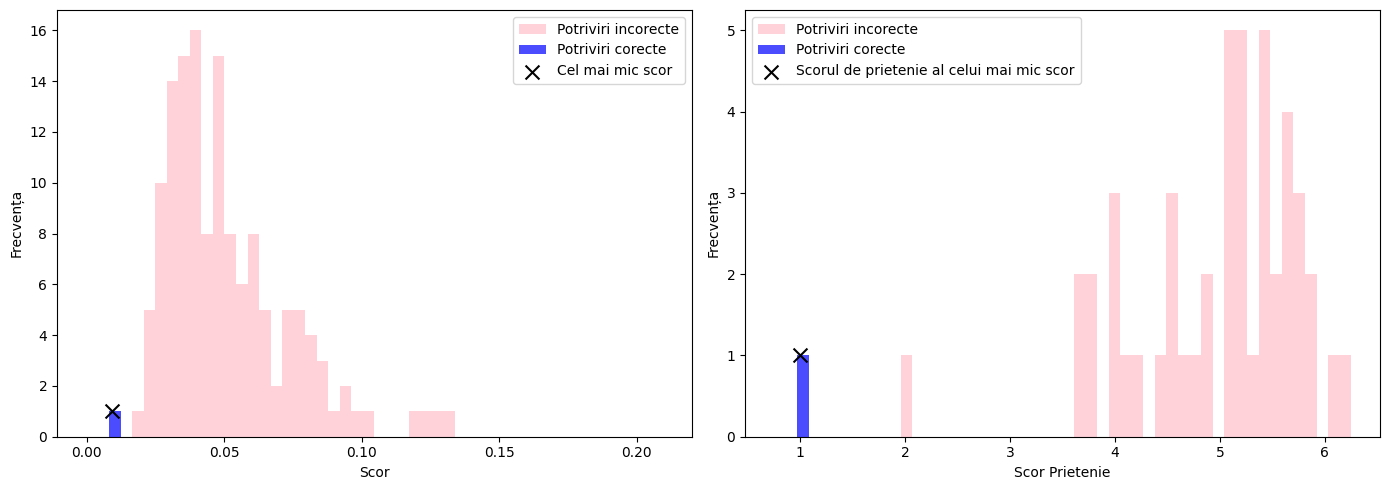

Fragment 18 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (18, 29, 2, 1, 0.027553125463211713)
Min buddy score = 1.3926865899106868


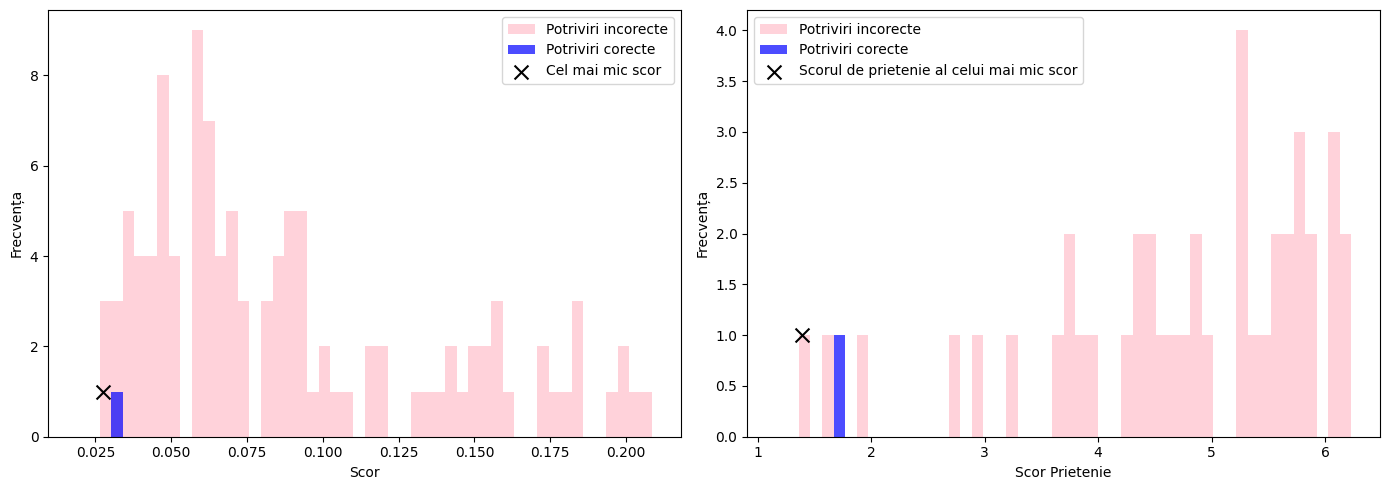

Fragment 18 side 3
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (18, 23, 3, 2, 0.0236928664491345)
Min buddy score = 2.307558400162632


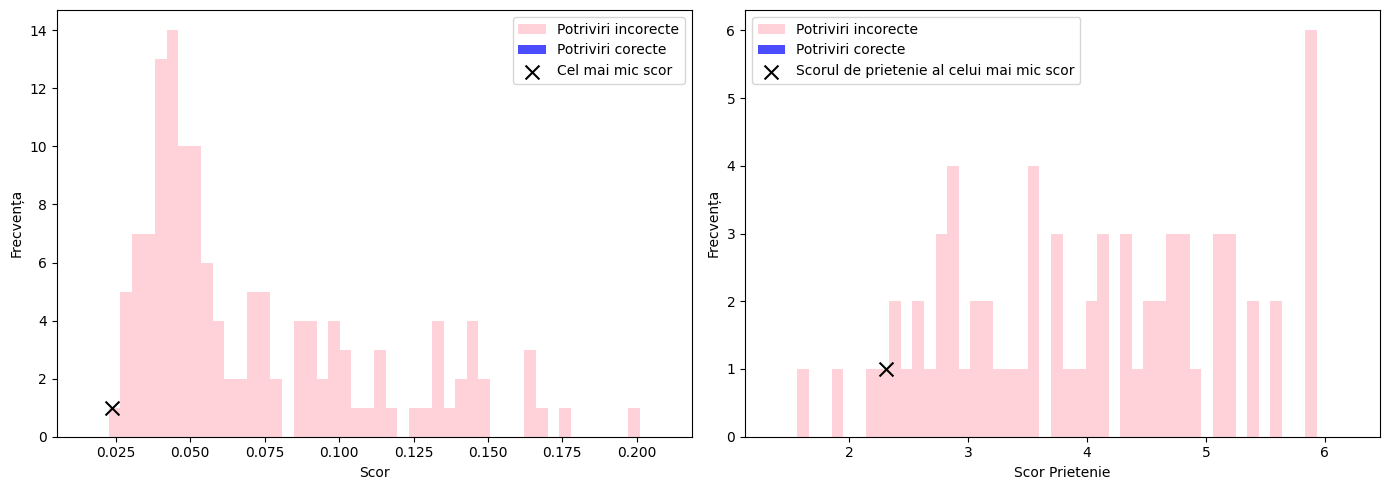

Fragment 19 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (13, 19, 2, 0, 0.010744603170504576)
Min buddy score = 1.0


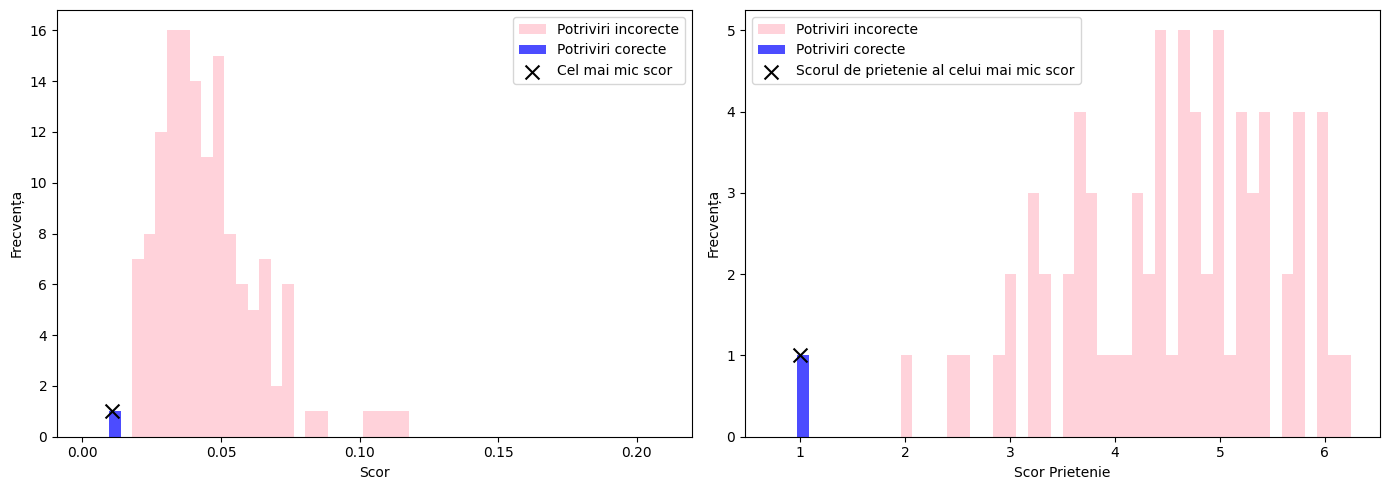

Fragment 19 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (19, 20, 1, 3, 0.007161840468627115)
Min buddy score = 1.0


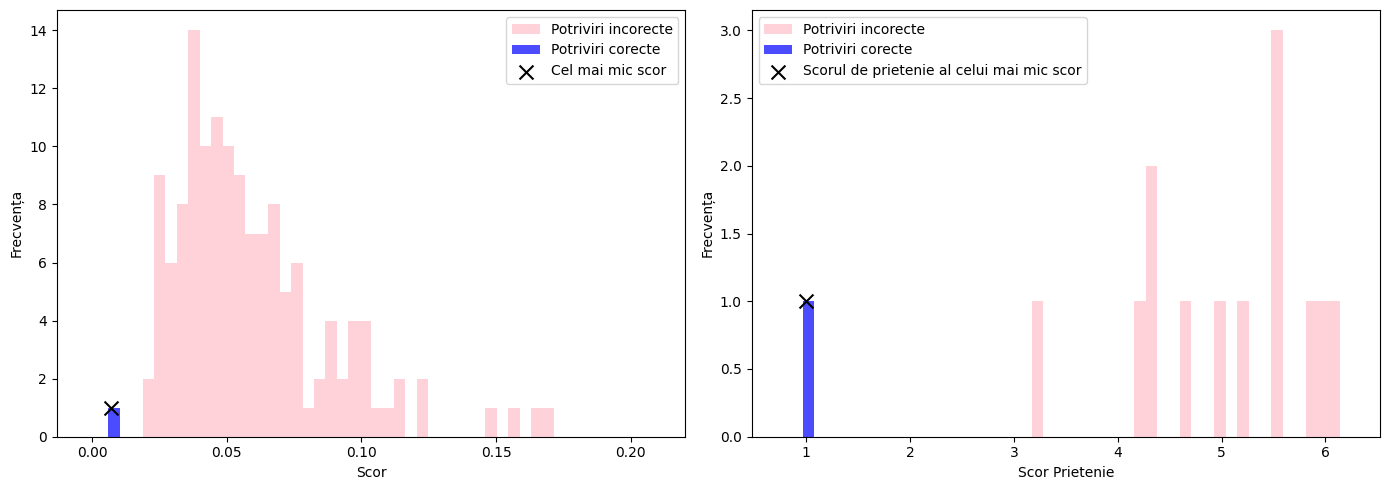

Fragment 19 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (19, 25, 2, 0, 0.008977422942213986)
Min buddy score = 1.0


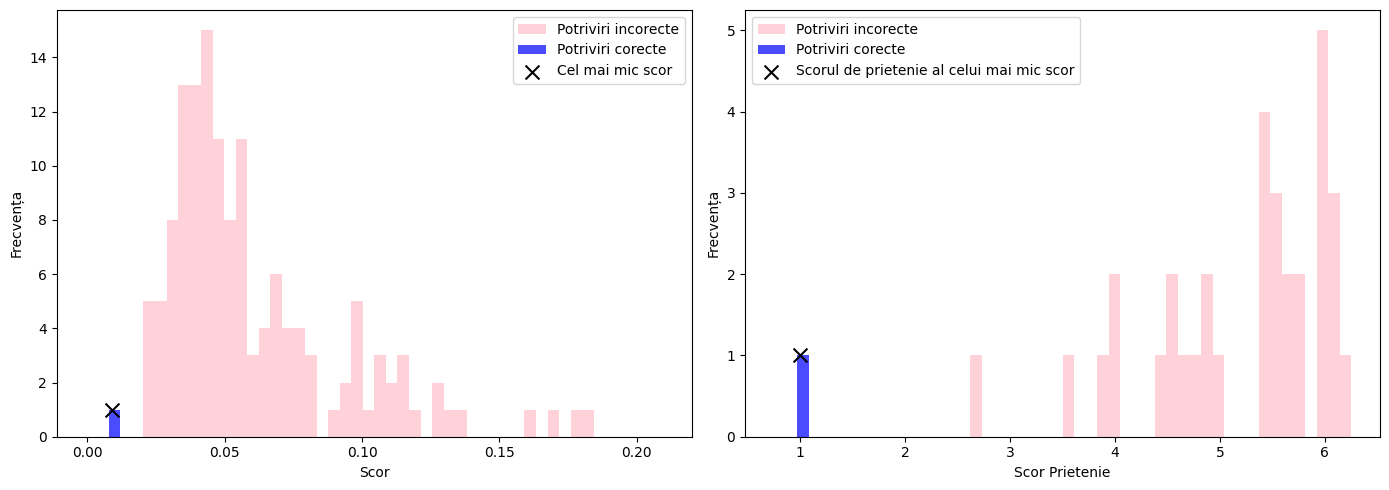

Fragment 19 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (18, 19, 1, 3, 0.009168861535346988)
Min buddy score = 1.0


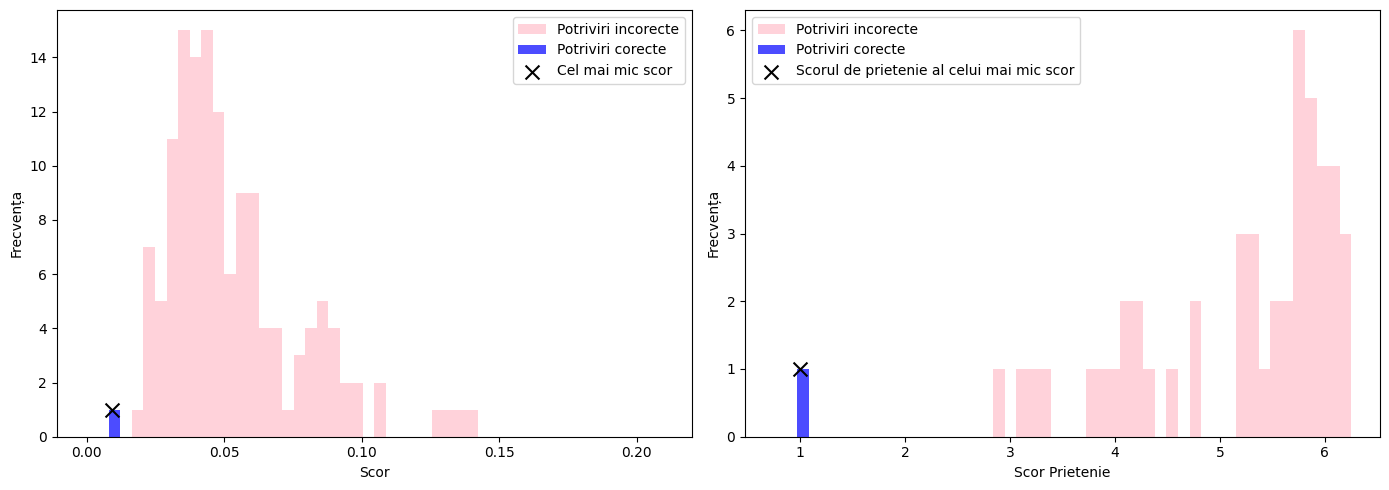

Fragment 20 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (14, 20, 2, 0, 0.012220565415338525)
Min buddy score = 1.0


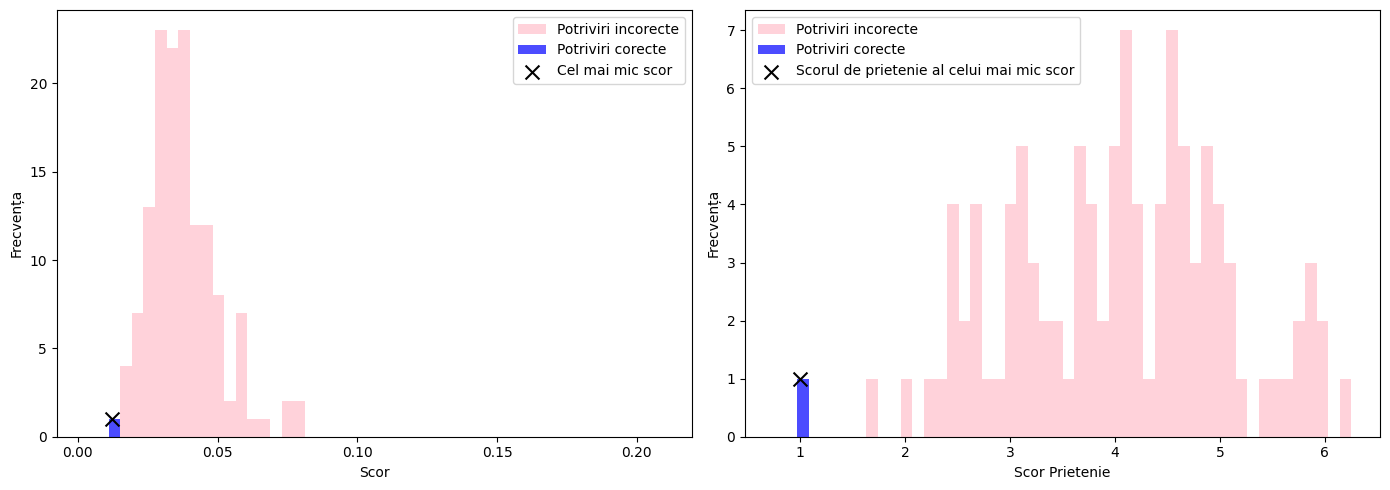

Fragment 20 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (20, 21, 1, 3, 0.011114896142869079)
Min buddy score = 1.0


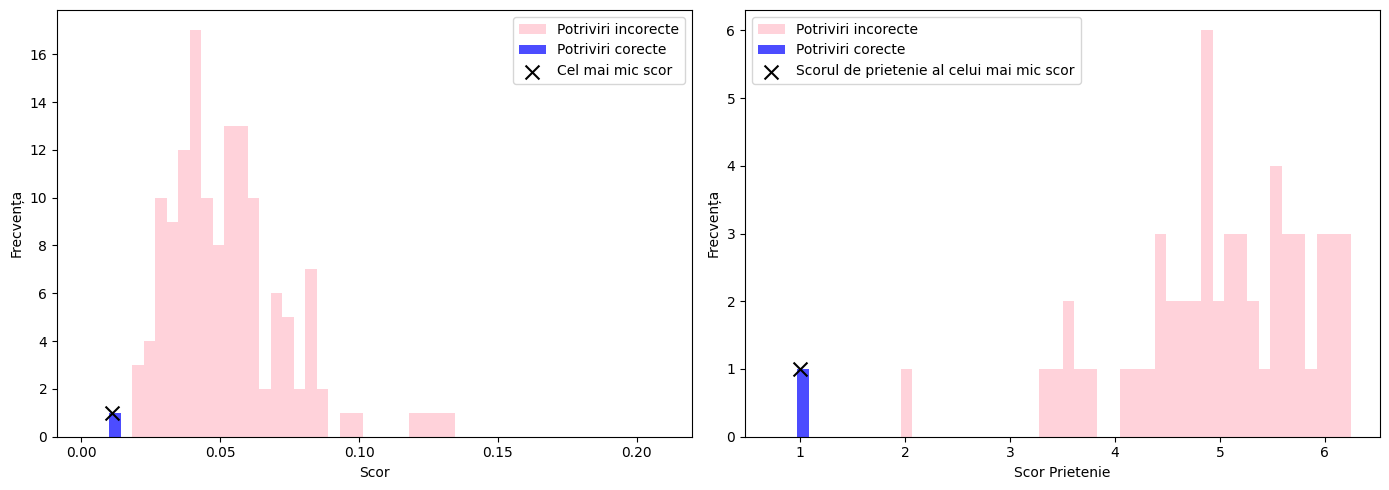

Fragment 20 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (20, 31, 2, 2, 0.023903721055048704)
Min buddy score = 1.2823671460638817


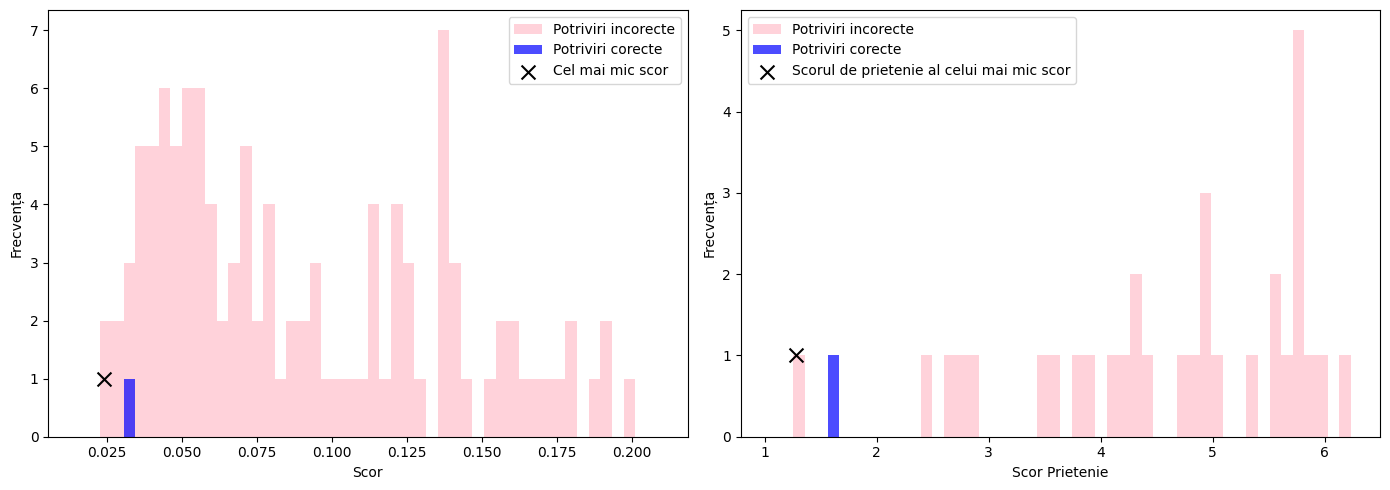

Fragment 20 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (19, 20, 1, 3, 0.007161840468627115)
Min buddy score = 1.0


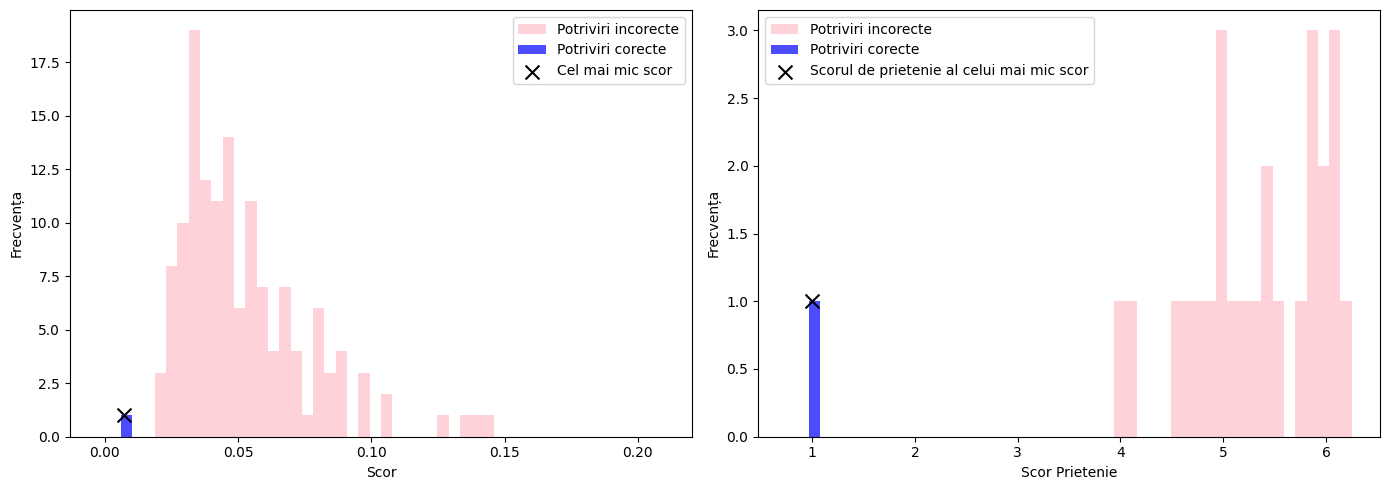

Fragment 21 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (15, 21, 2, 0, 0.009860417182471978)
Min buddy score = 1.0


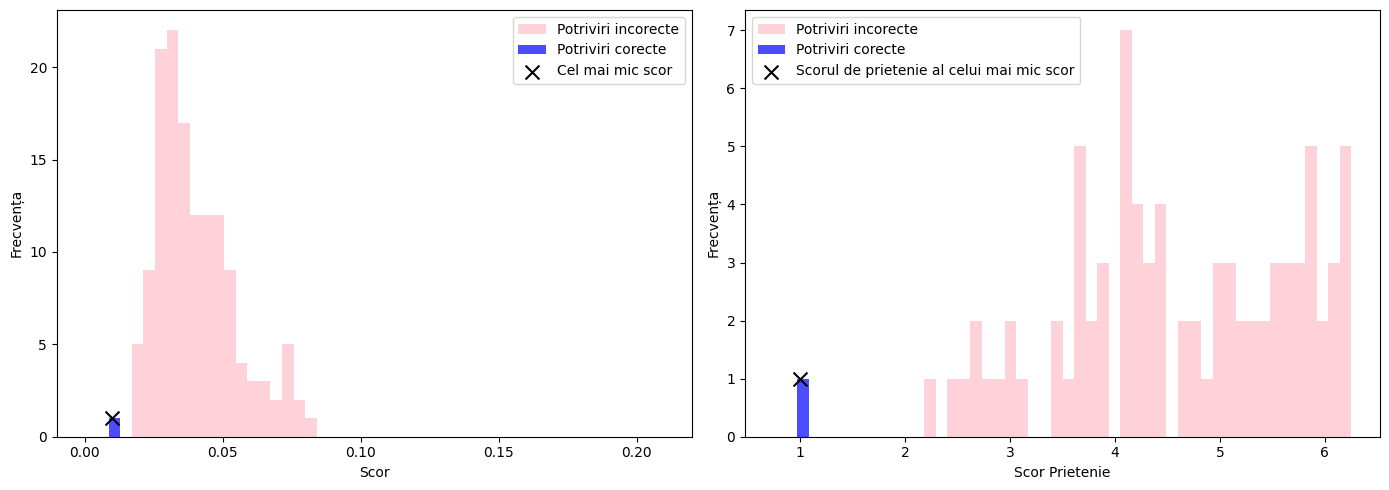

Fragment 21 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (21, 22, 1, 3, 0.009082312345387734)
Min buddy score = 1.0


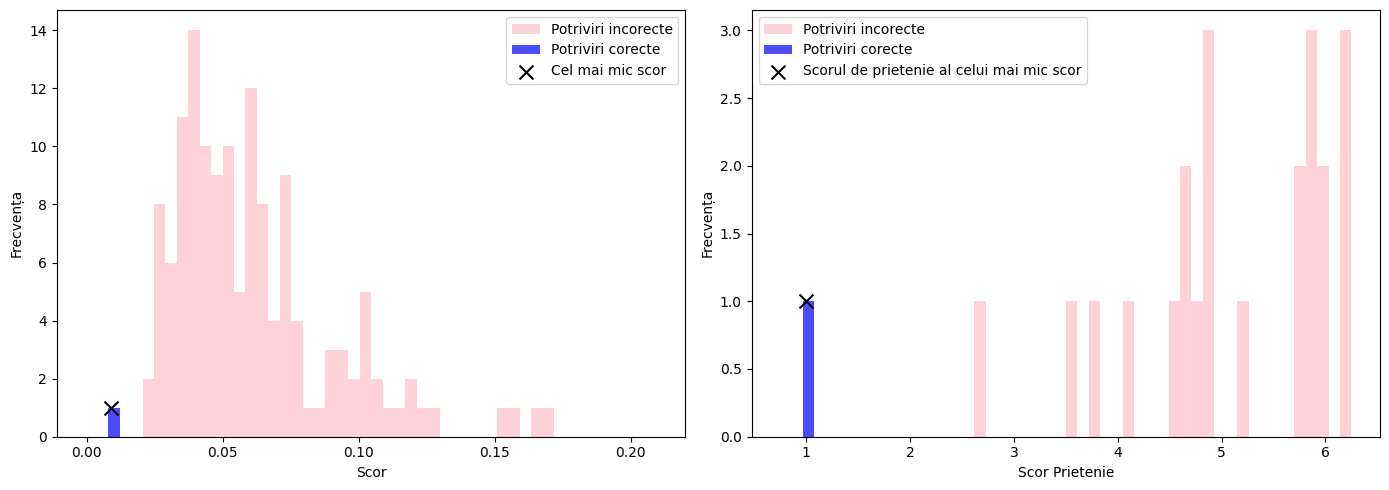

Fragment 21 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (16, 21, 3, 2, 0.023011727276264424)
Min buddy score = 6.250087431293656


Fragment 21 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (20, 21, 1, 3, 0.011114896142869079)
Min buddy score = 1.0


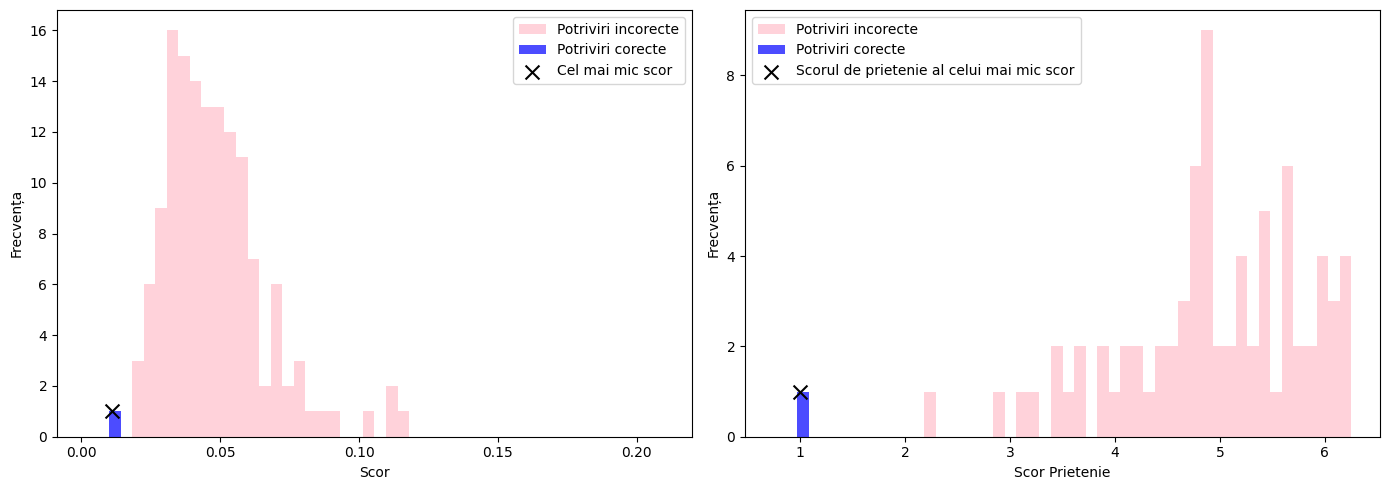

Fragment 22 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (16, 22, 2, 0, 0.01686334184127828)
Min buddy score = 1.0


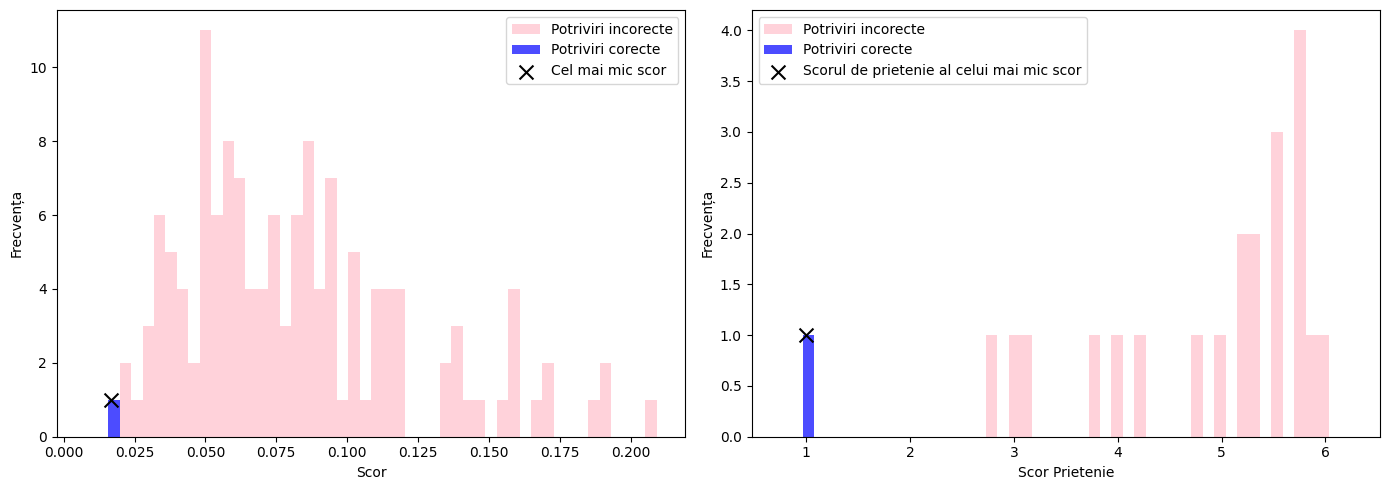

Fragment 22 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (22, 23, 1, 3, 0.014417408871697731)
Min buddy score = 1.0


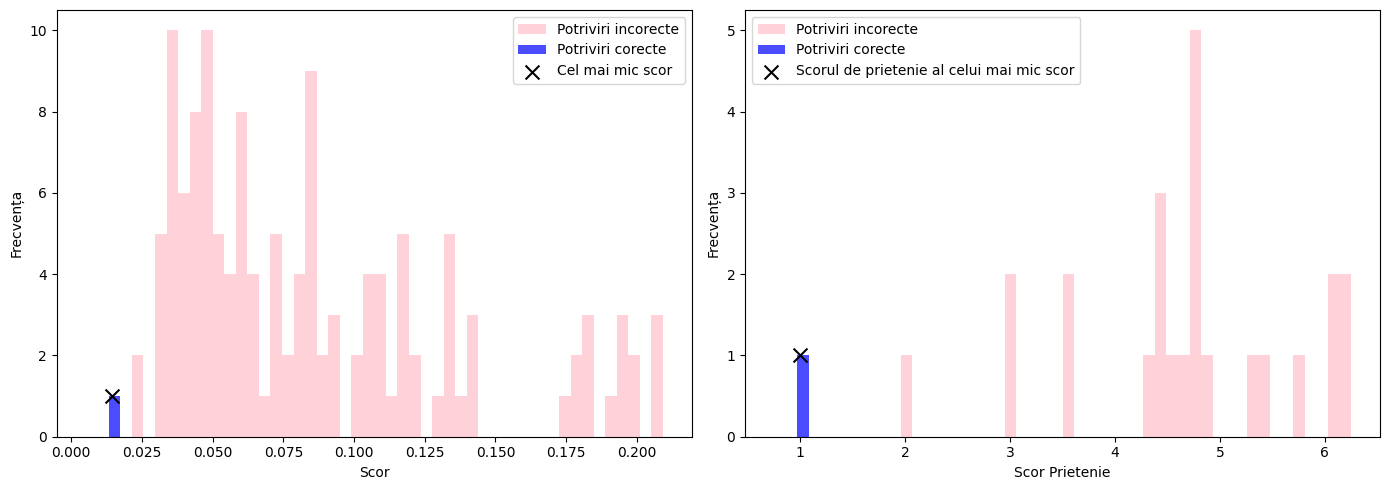

Fragment 22 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (22, 28, 2, 0, 0.008845718737798323)
Min buddy score = 1.0


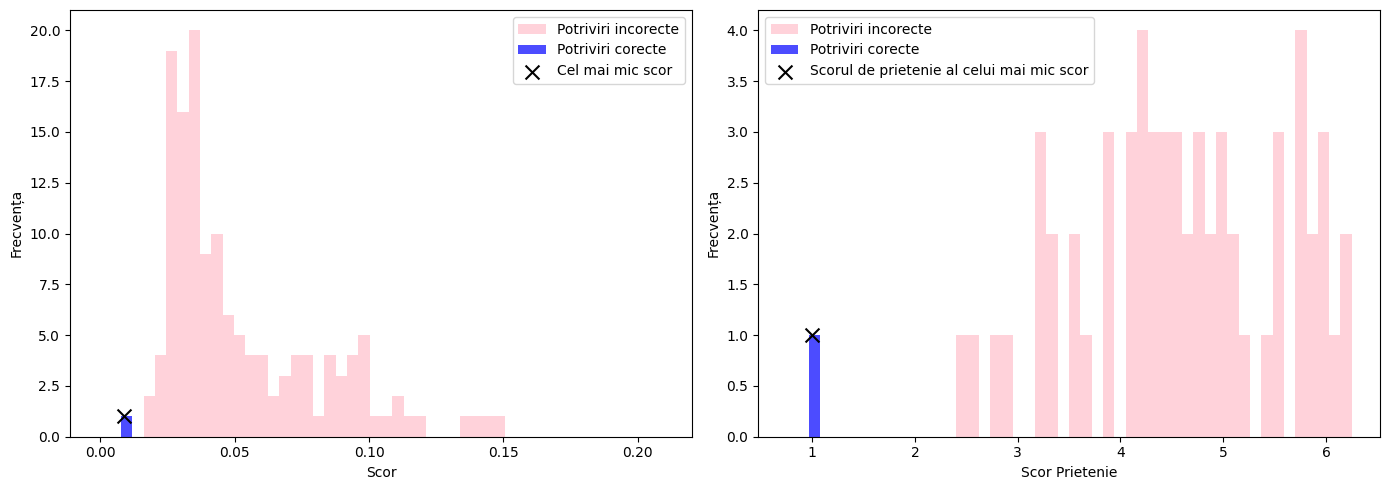

Fragment 22 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (21, 22, 1, 3, 0.009082312345387734)
Min buddy score = 1.0


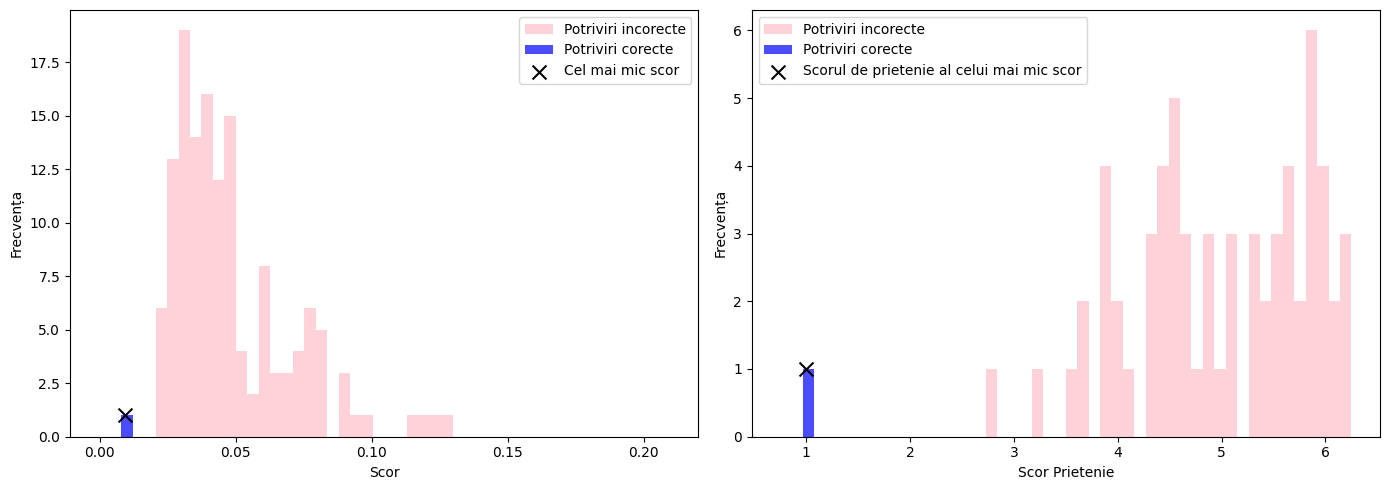

Fragment 23 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (17, 23, 2, 0, 0.019626080303566995)
Min buddy score = 1.0


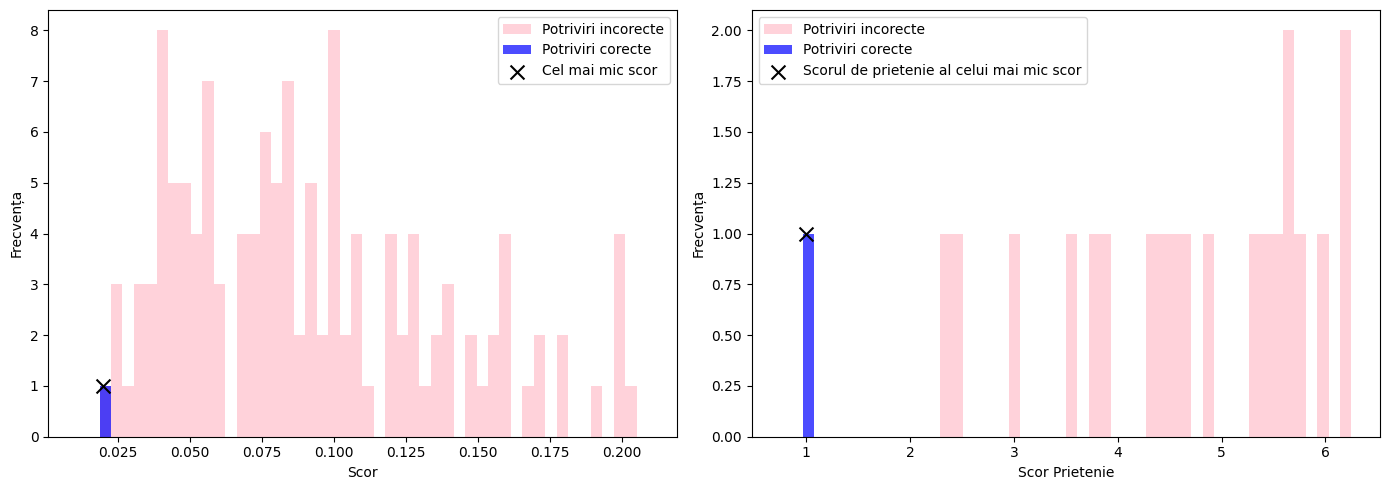

Fragment 23 side 1
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (15, 23, 1, 1, 0.022674670853748125)
Min buddy score = 6.158541408489064


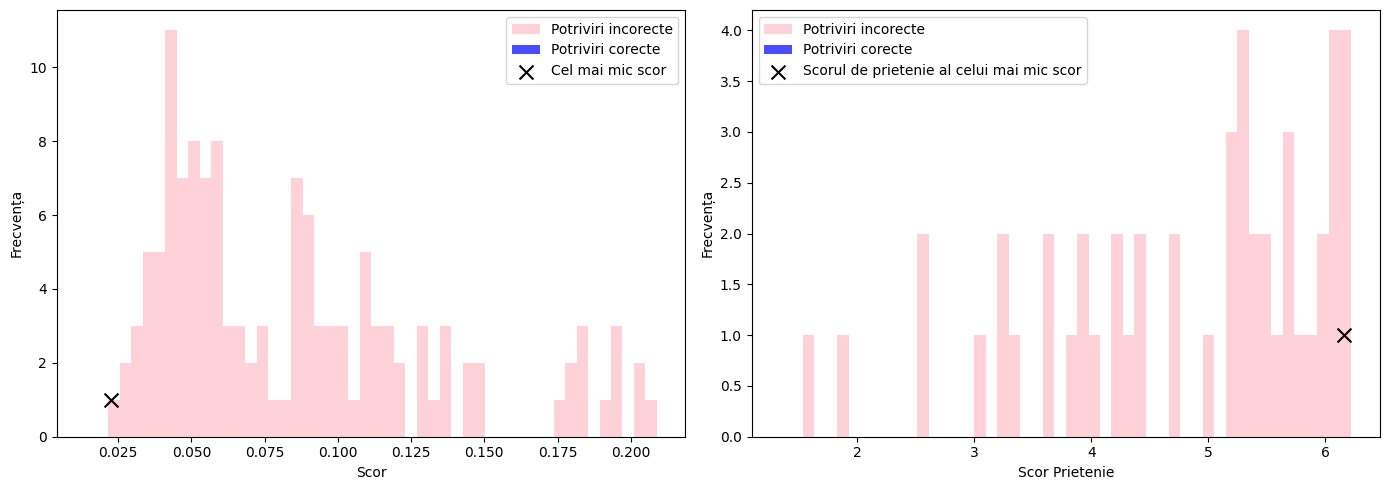

Fragment 23 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (23, 29, 2, 0, 0.010267504582967293)
Min buddy score = 1.0


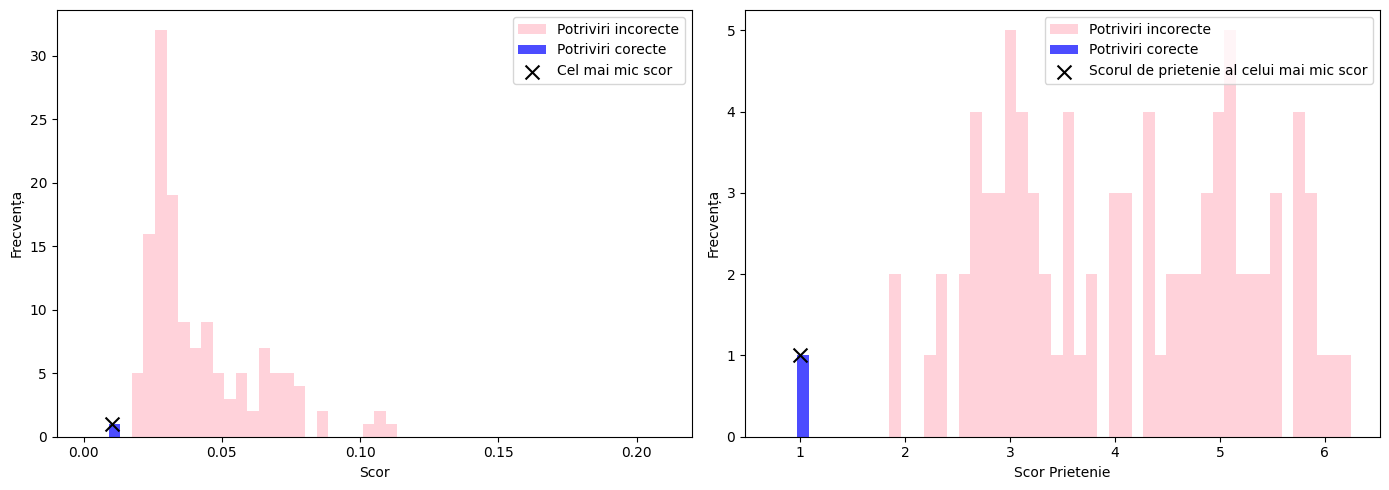

Fragment 23 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (22, 23, 1, 3, 0.014417408871697731)
Min buddy score = 1.0


Fragment 24 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (23, 24, 2, 0, 0.023585678257074274)
Min buddy score = 2.2971188438718038


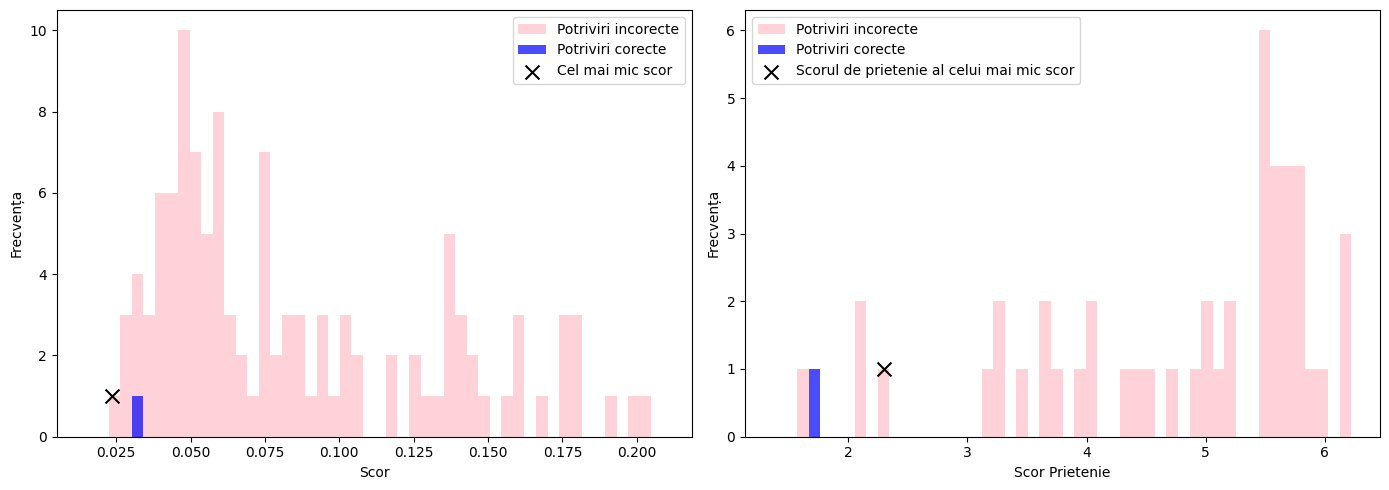

Fragment 24 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (24, 25, 1, 3, 0.022741855939923748)
Min buddy score = 1.0


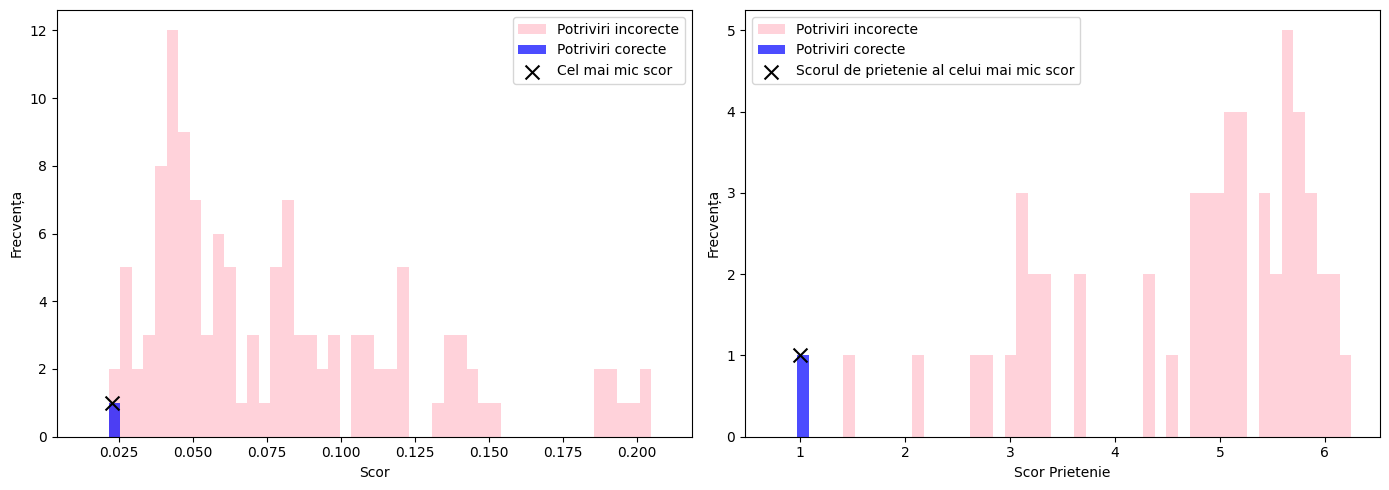

Fragment 24 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (24, 31, 2, 2, 0.026662605499675134)
Min buddy score = 1.4303735072253119


Fragment 24 side 3
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (15, 24, 1, 3, 0.0254134678519769)
Min buddy score = 6.902410849056902


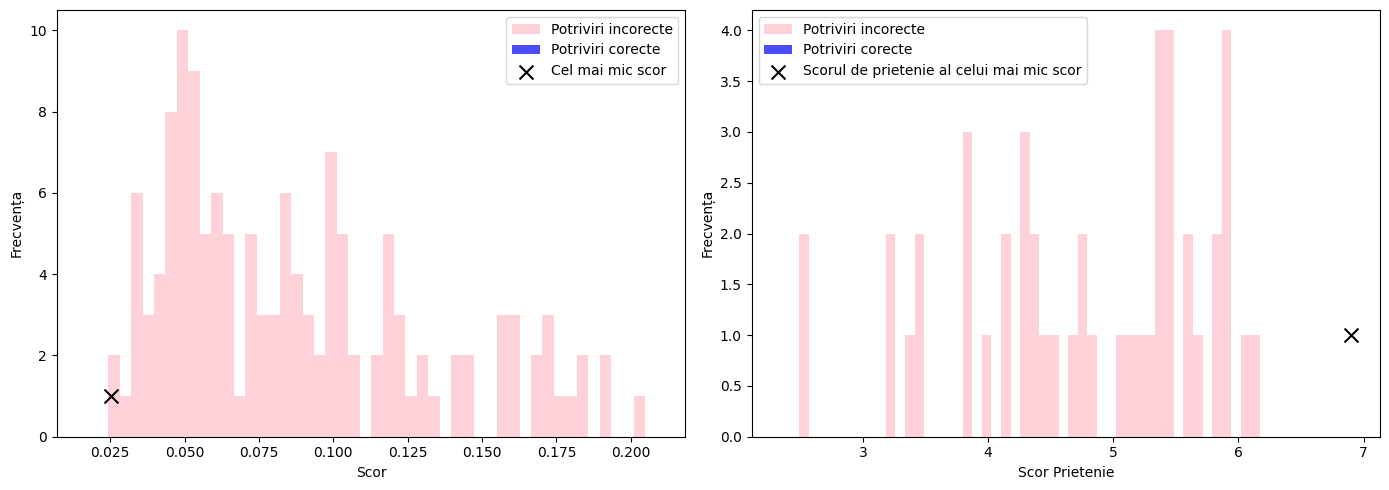

Fragment 25 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (19, 25, 2, 0, 0.008977422942213986)
Min buddy score = 1.0


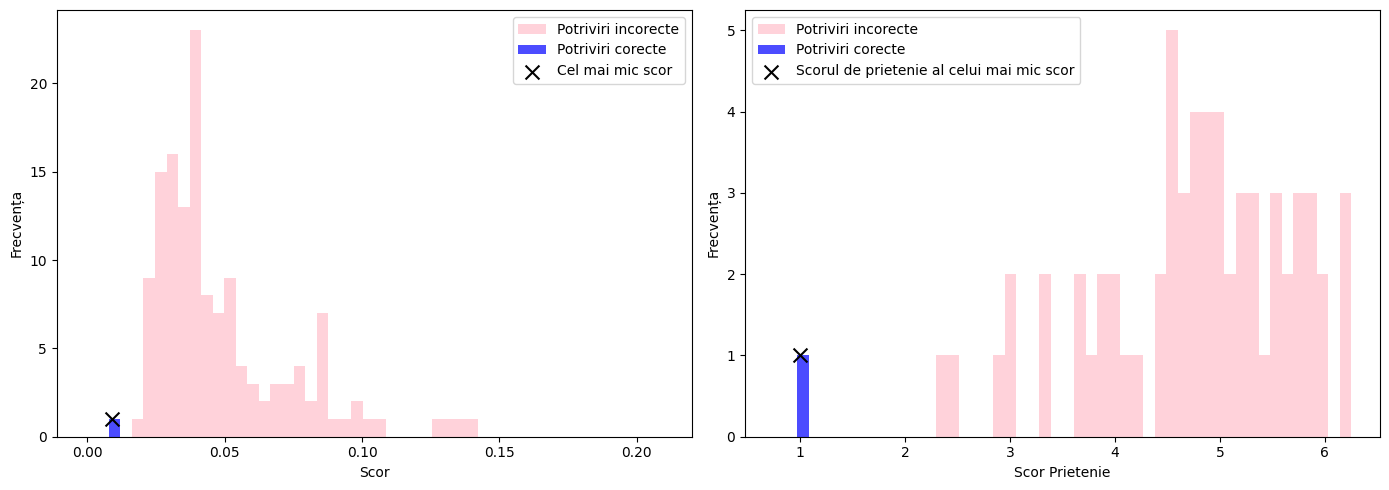

Fragment 25 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (25, 26, 1, 3, 0.01083663443323851)
Min buddy score = 1.0


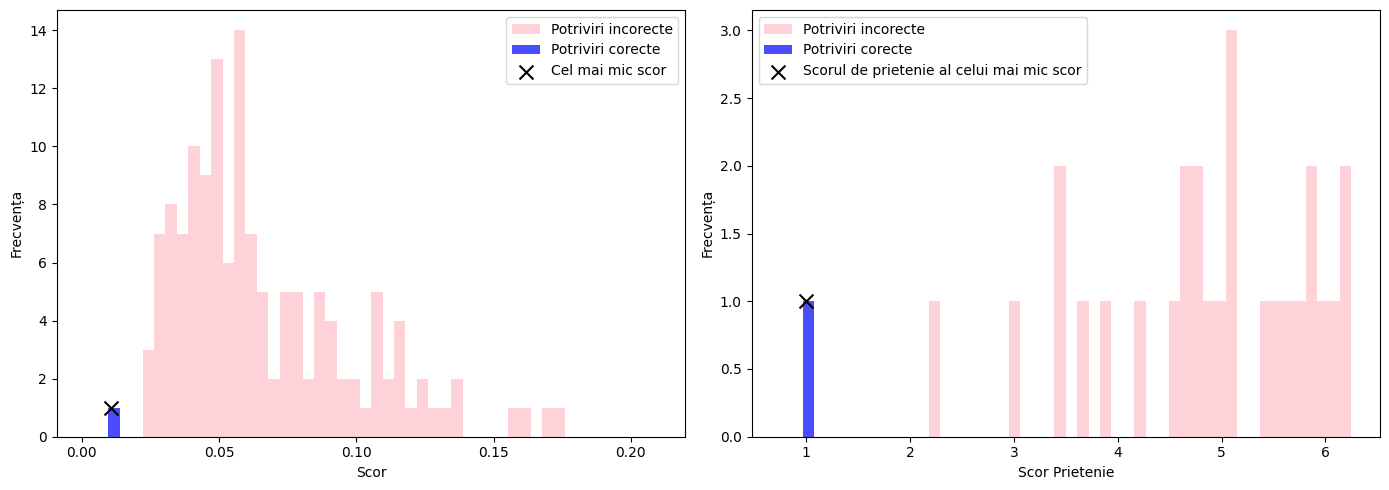

Fragment 25 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (25, 31, 2, 0, 0.011522720186956707)
Min buddy score = 1.0


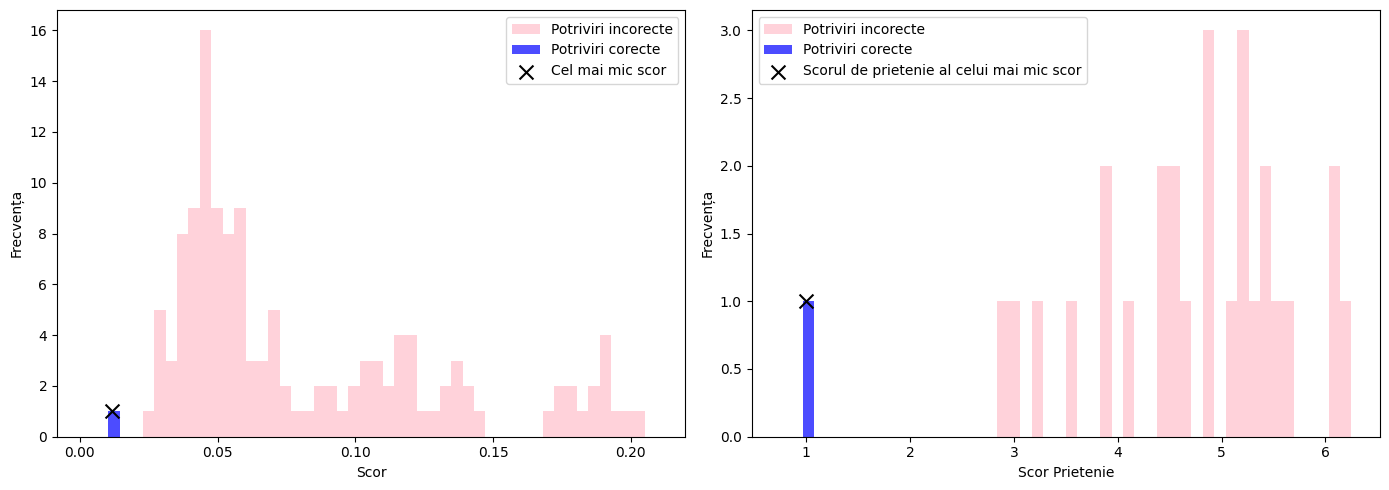

Fragment 25 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (24, 25, 1, 3, 0.022741855939923748)
Min buddy score = 1.0


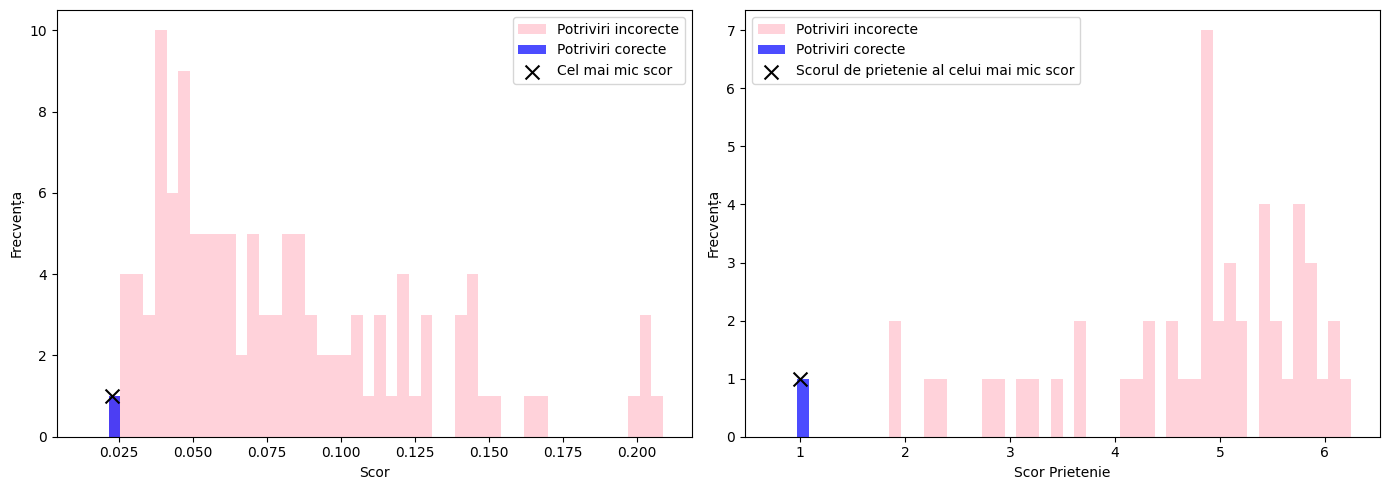

Fragment 26 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (15, 26, 1, 0, 0.023564717056663496)
Min buddy score = 6.400281914072488


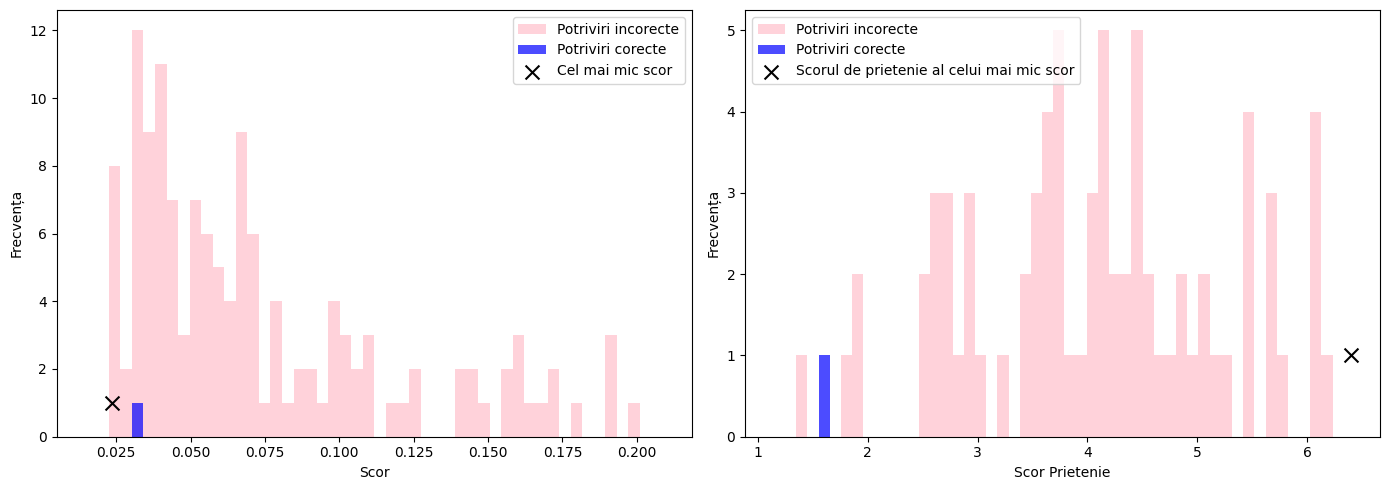

Fragment 26 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (26, 27, 1, 3, 0.013534060622377756)
Min buddy score = 1.0


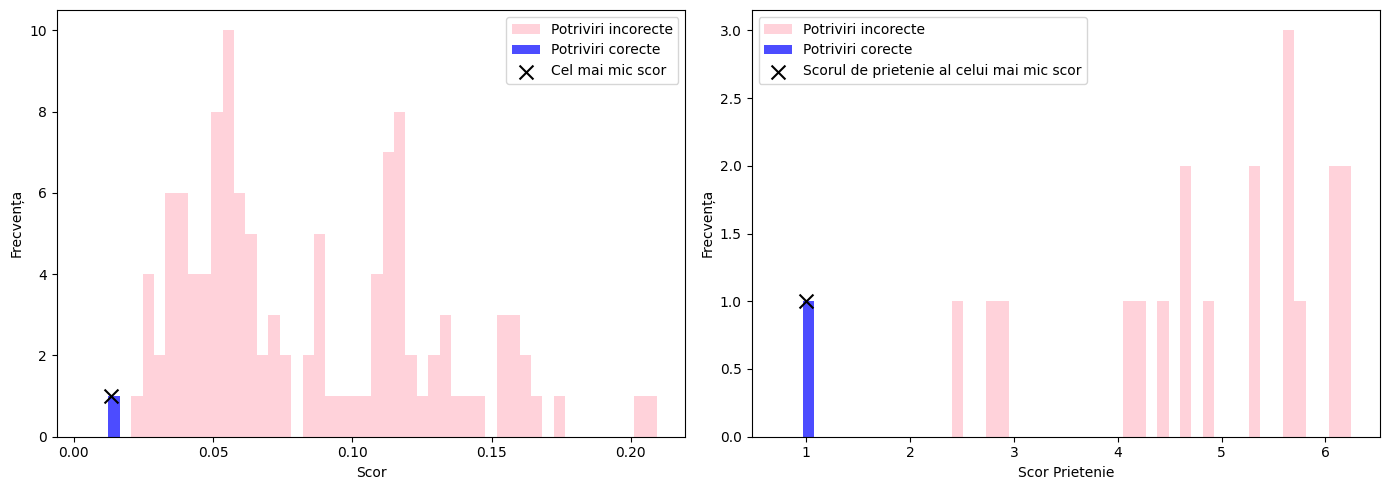

Fragment 26 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (23, 26, 2, 2, 0.028412474735660904)
Min buddy score = 2.767222990364592


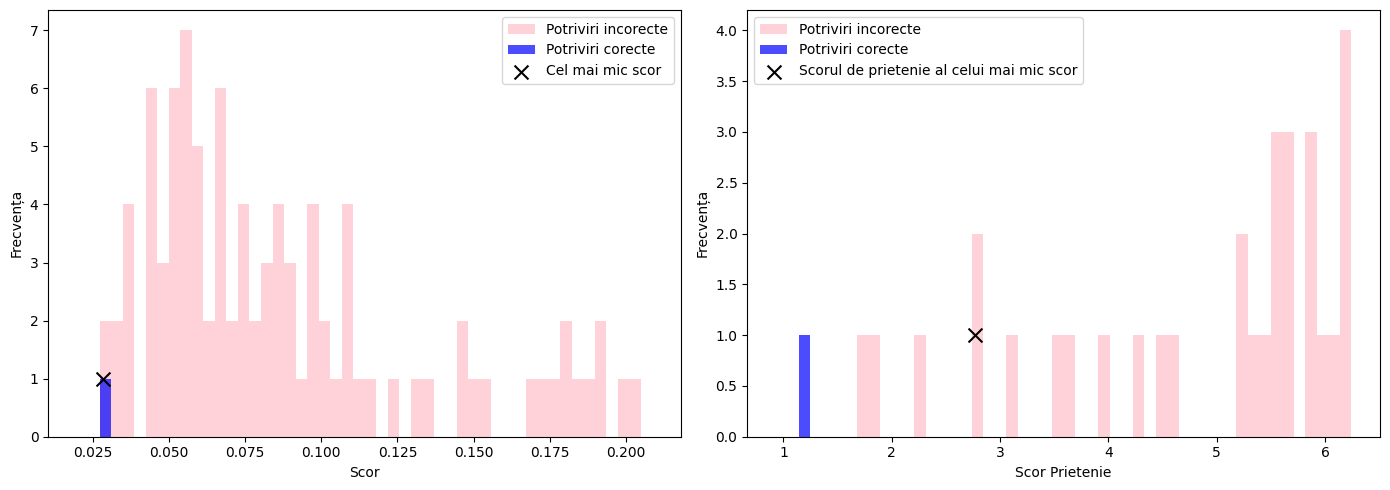

Fragment 26 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (25, 26, 1, 3, 0.01083663443323851)
Min buddy score = 1.0


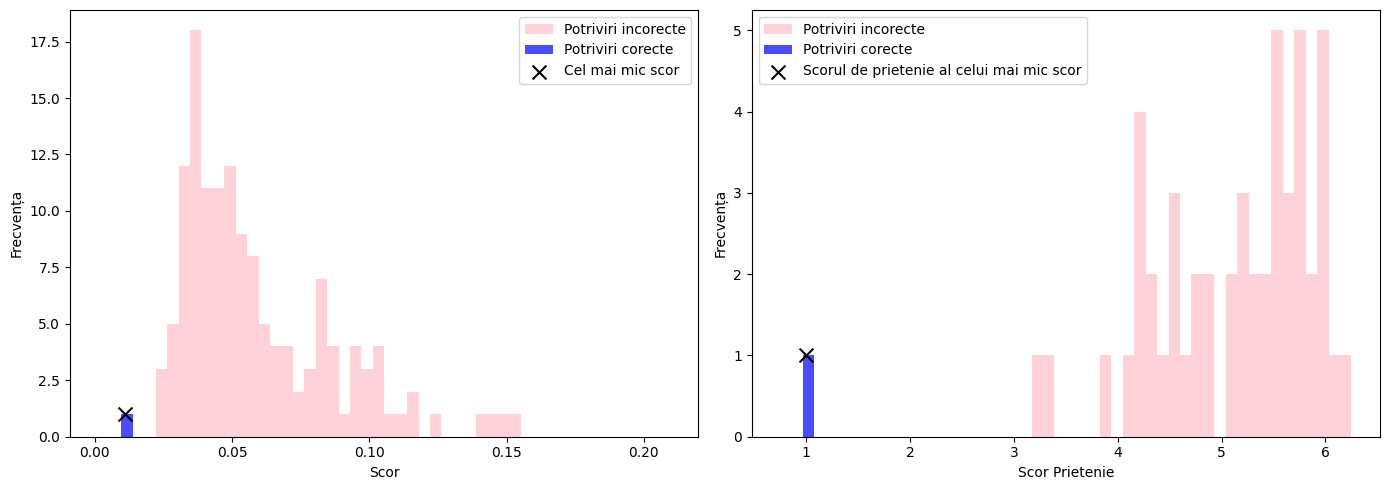

Fragment 27 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (15, 27, 1, 0, 0.02201423350814548)
Min buddy score = 5.979163689322123


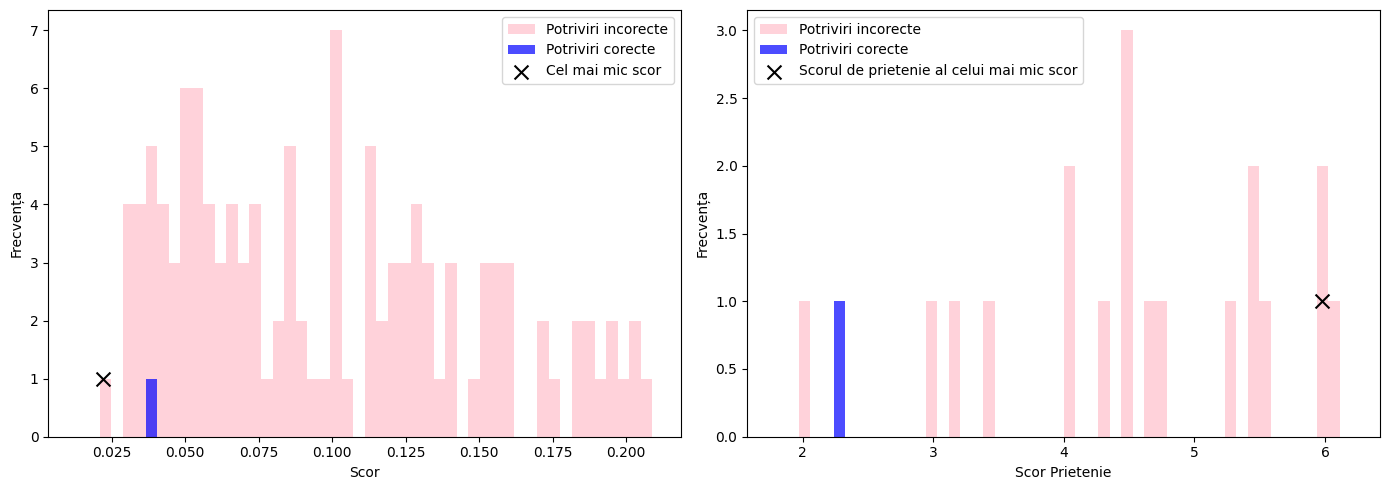

Fragment 27 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (27, 28, 1, 3, 0.010115814967730534)
Min buddy score = 1.0


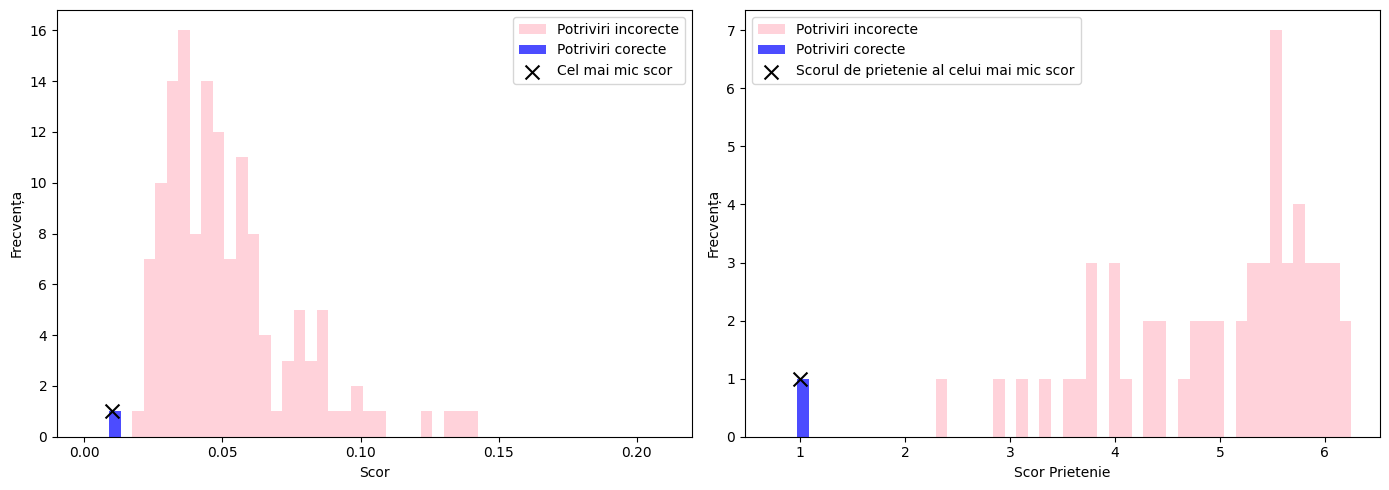

Fragment 27 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (27, 33, 2, 0, 0.01872915829290518)
Min buddy score = 1.0


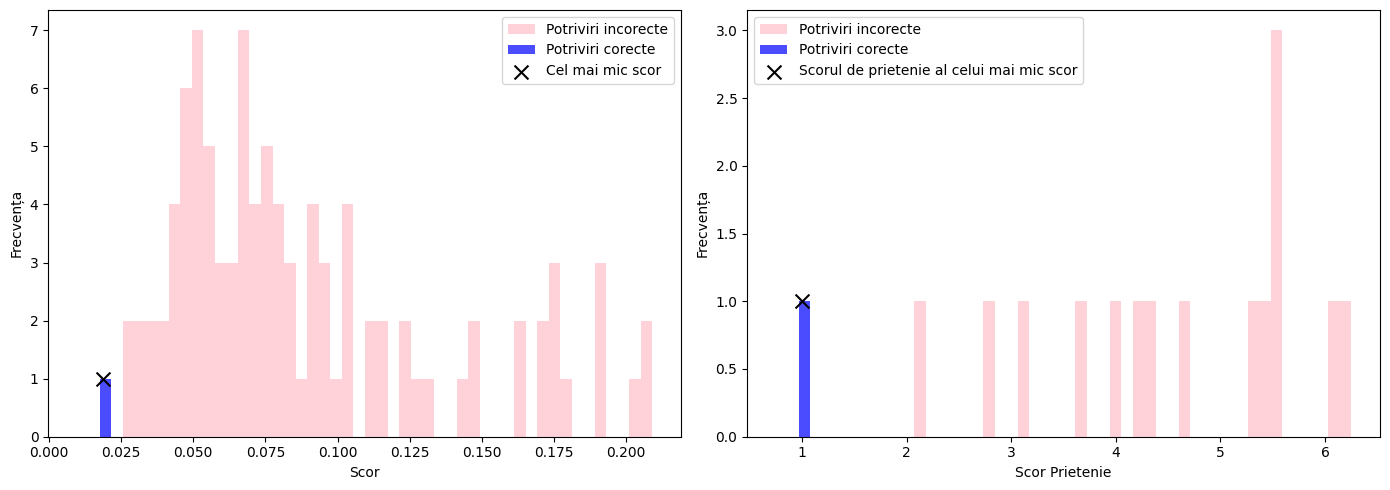

Fragment 27 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (26, 27, 1, 3, 0.013534060622377756)
Min buddy score = 1.0


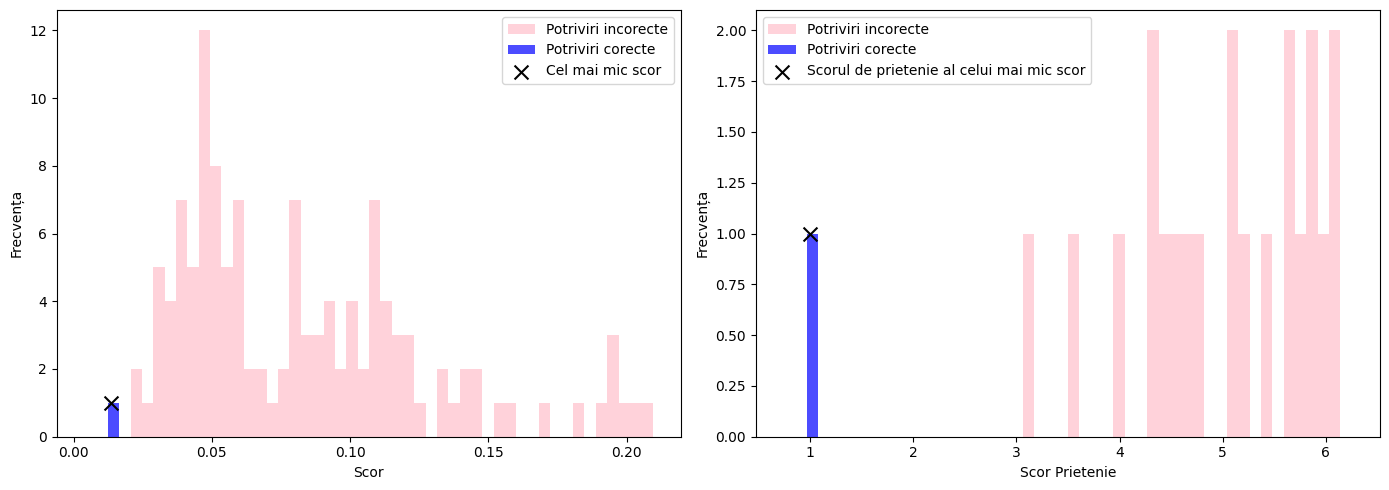

Fragment 28 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (22, 28, 2, 0, 0.008845718737798323)
Min buddy score = 1.0


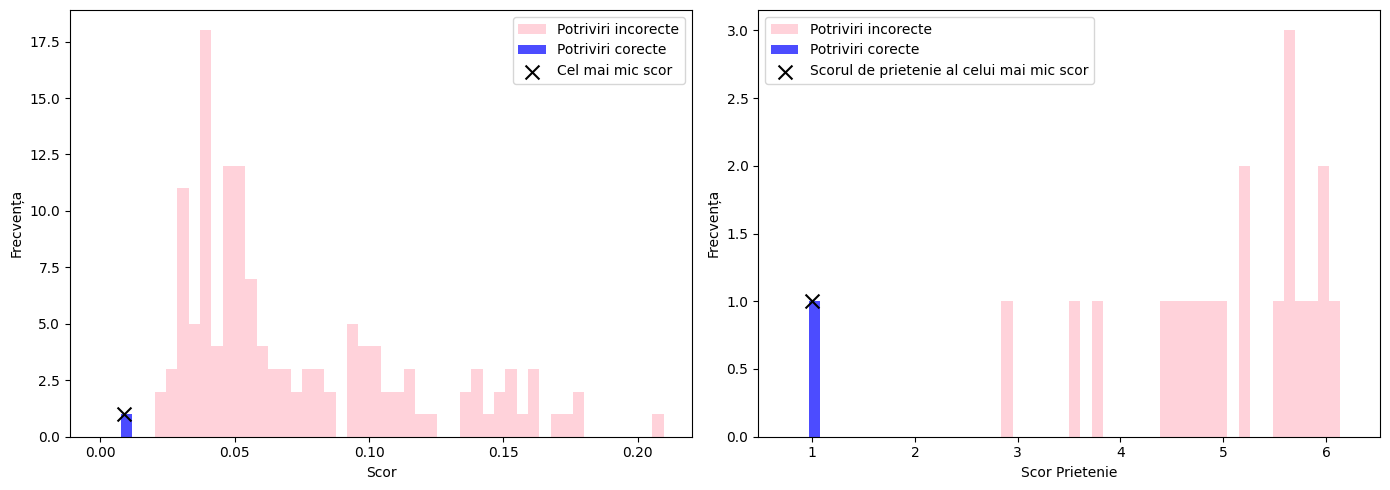

Fragment 28 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (28, 29, 1, 3, 0.00853239177897325)
Min buddy score = 1.0


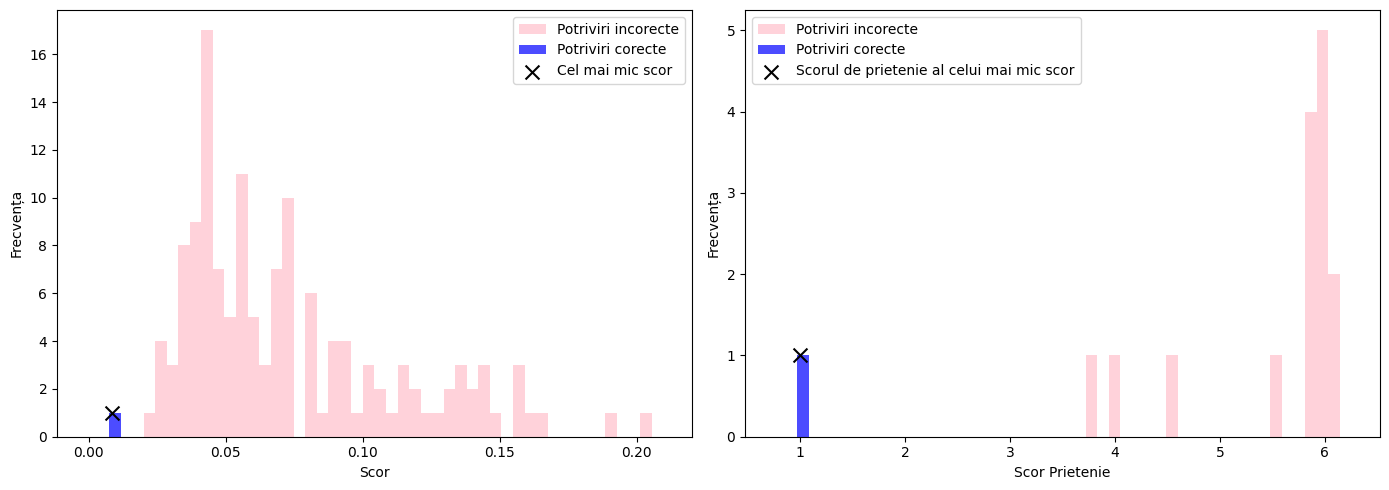

Fragment 28 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (28, 34, 2, 0, 0.020983847466249834)
Min buddy score = 1.0


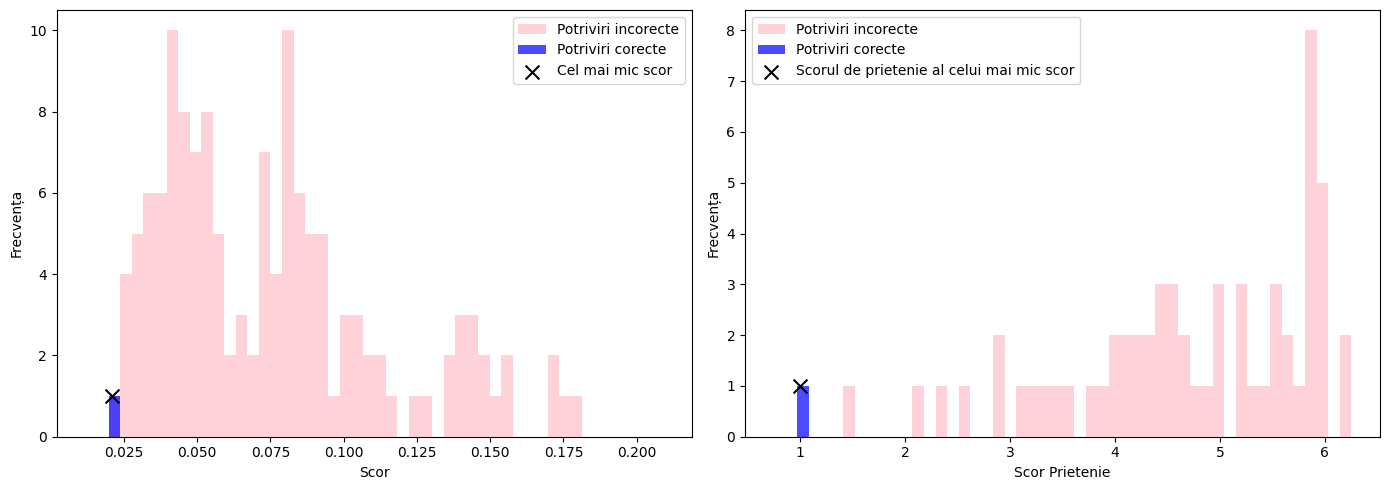

Fragment 28 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (27, 28, 1, 3, 0.010115814967730534)
Min buddy score = 1.0


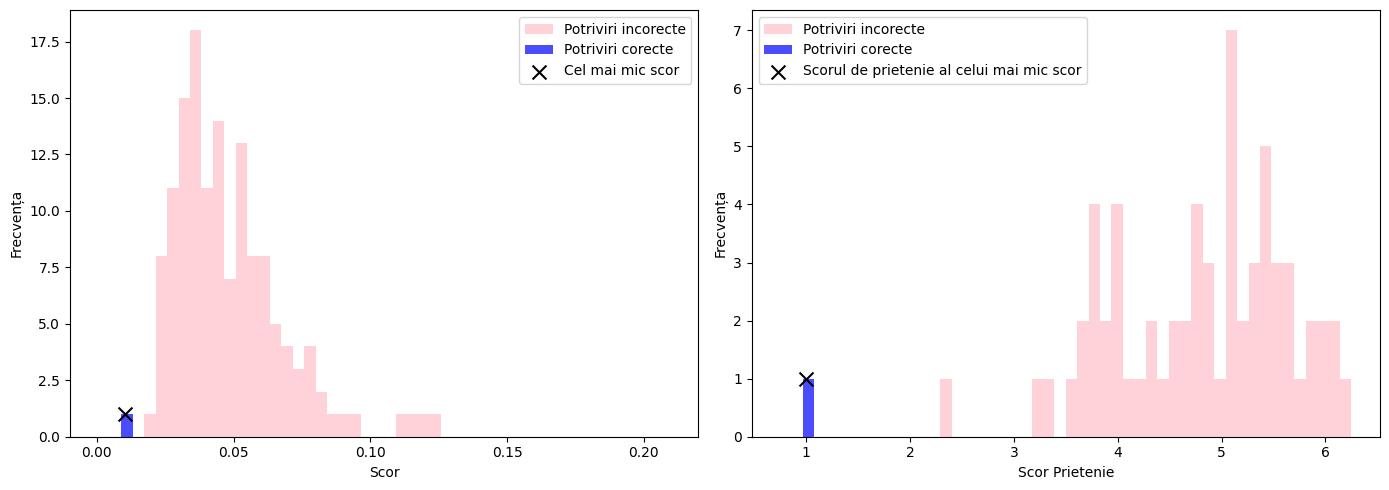

Fragment 29 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (23, 29, 2, 0, 0.010267504582967293)
Min buddy score = 1.0


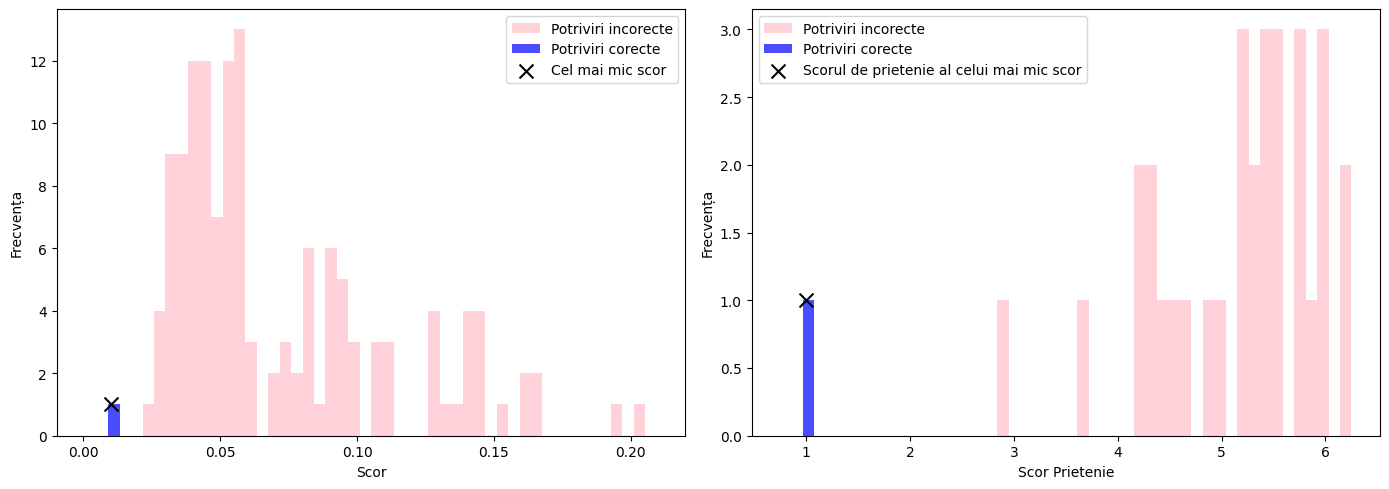

Fragment 29 side 1
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (23, 29, 2, 1, 0.01978415363716448)
Min buddy score = 1.926870689688739


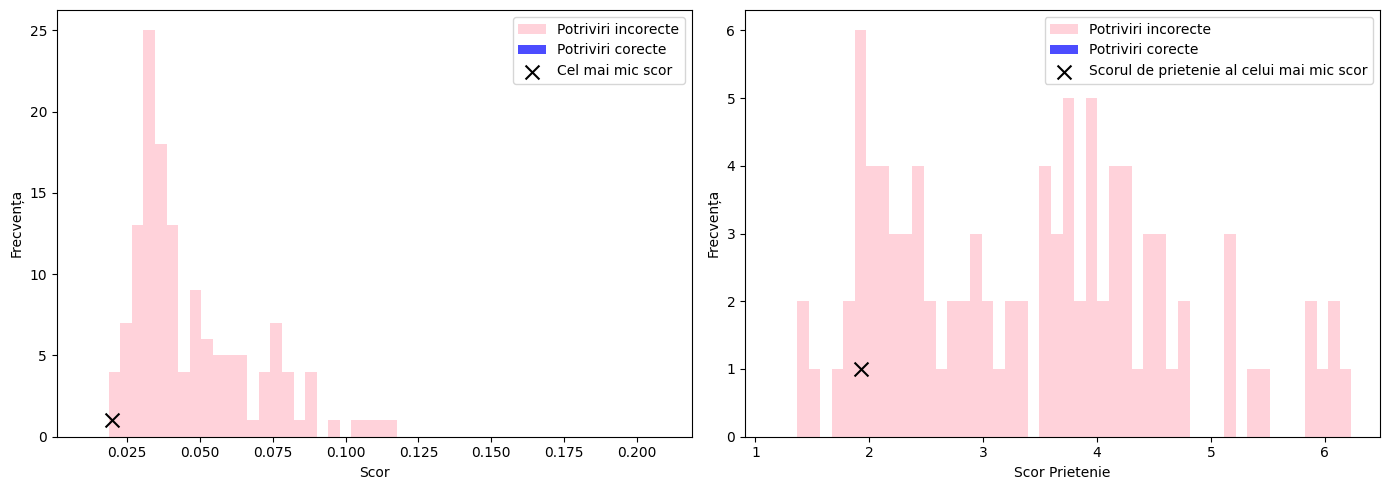

Fragment 29 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (29, 35, 2, 0, 0.007256589693218186)
Min buddy score = 1.0


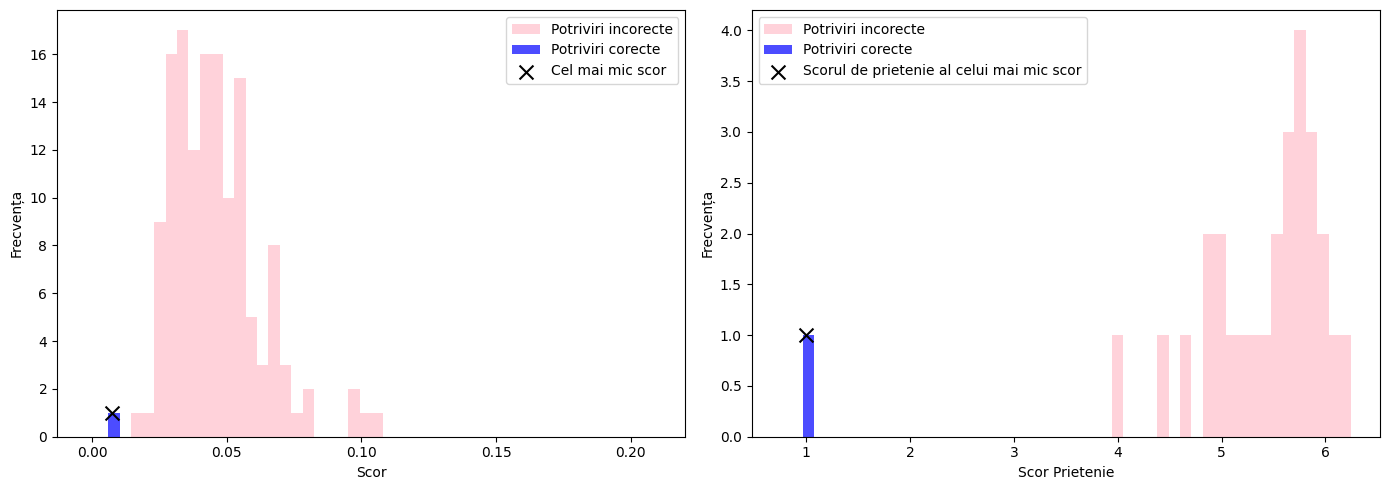

Fragment 29 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (28, 29, 1, 3, 0.00853239177897325)
Min buddy score = 1.0


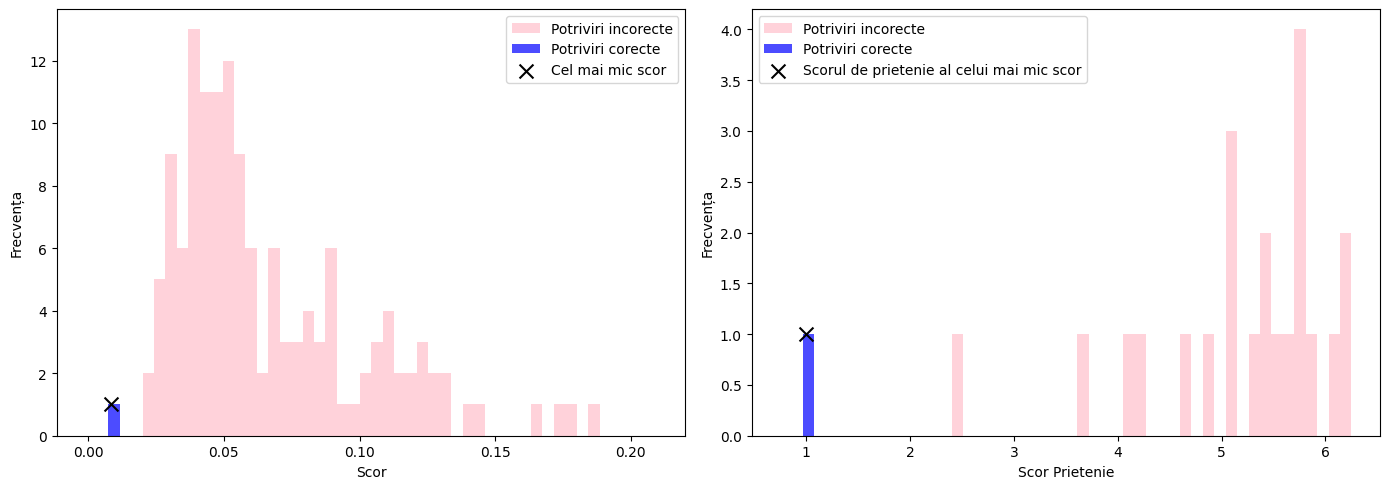

Fragment 30 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (30, 31, 0, 2, 0.029388520783504415)
Min buddy score = 1.5766111659934126


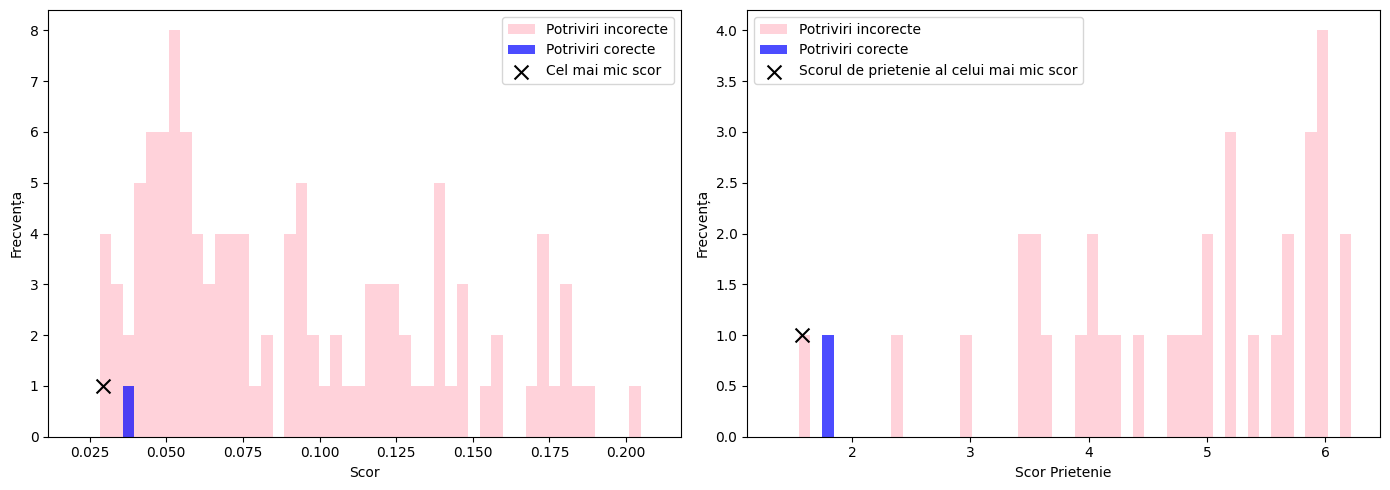

Fragment 30 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (30, 31, 1, 3, 0.013977226646019428)
Min buddy score = 1.0


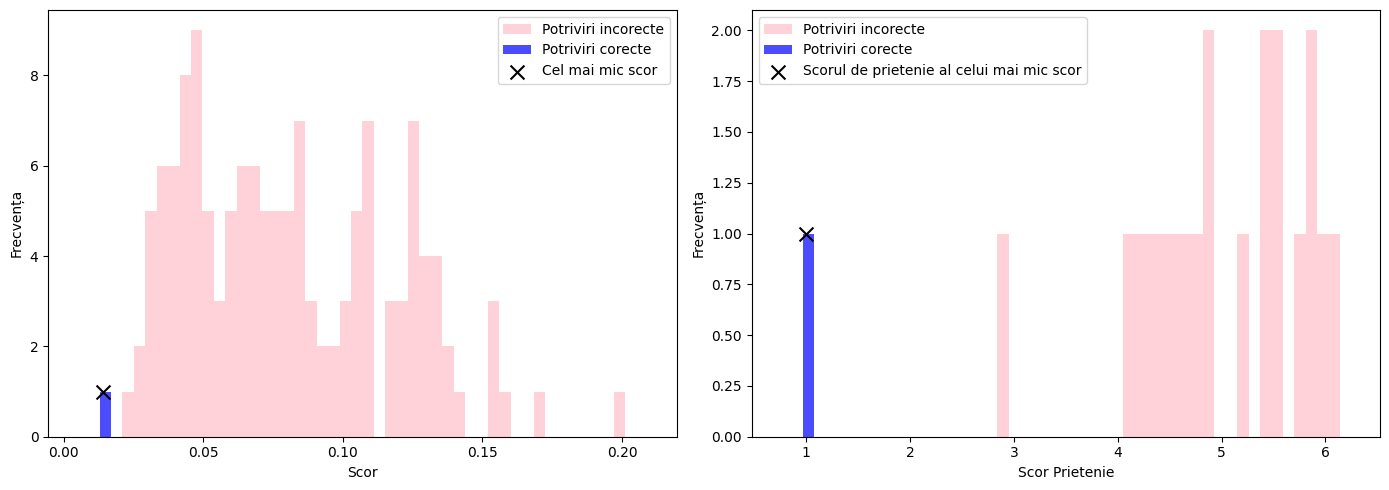

Fragment 30 side 2
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (15, 30, 1, 2, 0.020737005065203148)
Min buddy score = 5.632262766054248


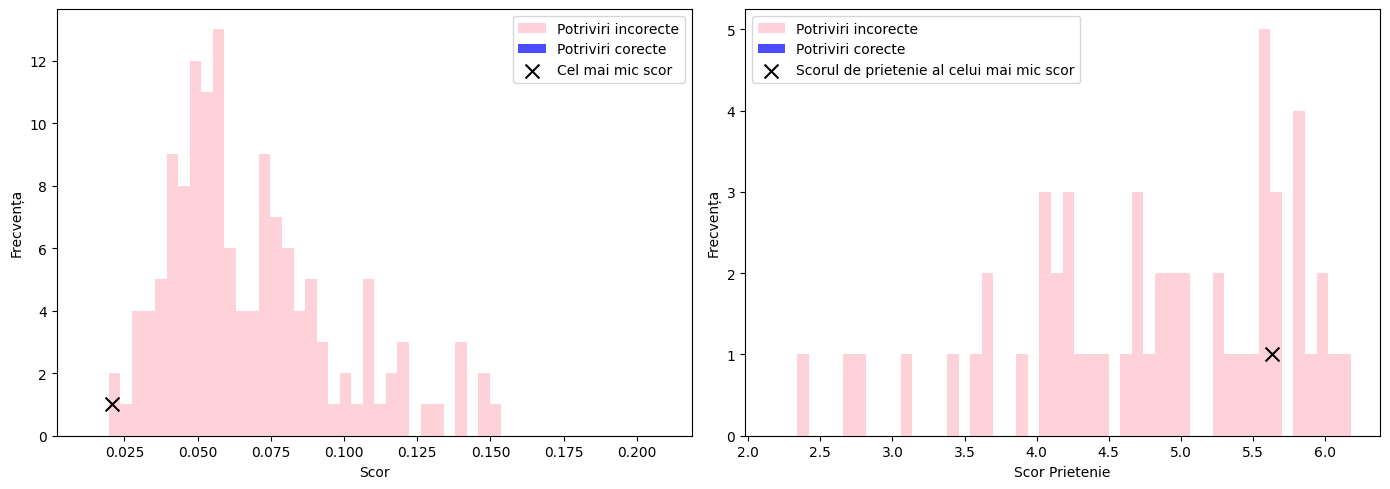

Fragment 30 side 3
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (15, 30, 1, 3, 0.02467500909130989)
Min buddy score = 6.701842166699269


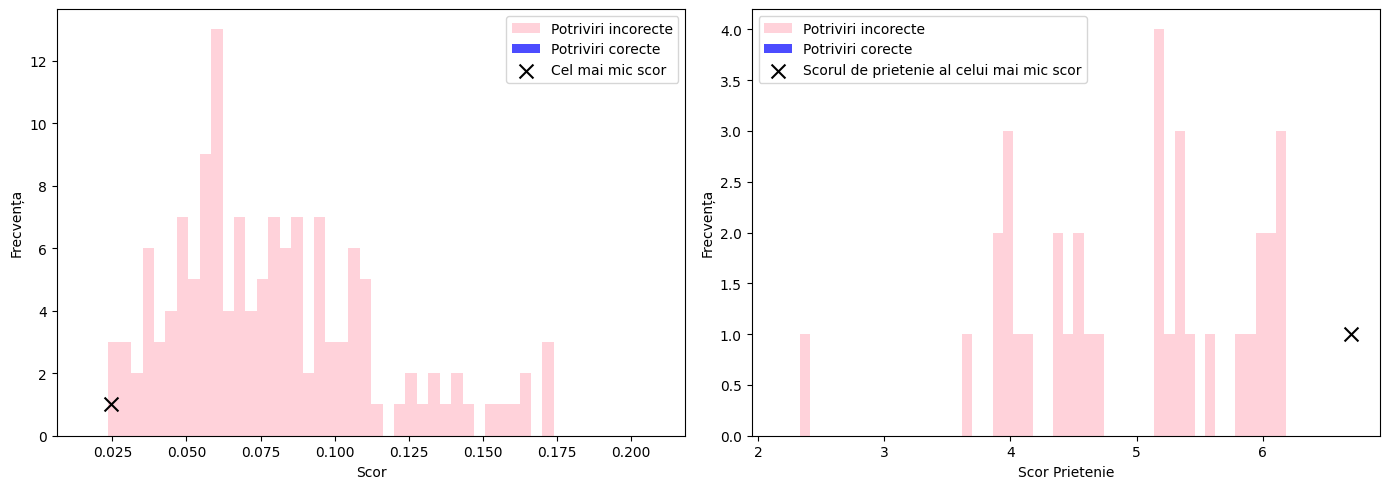

Fragment 31 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (25, 31, 2, 0, 0.011522720186956707)
Min buddy score = 1.0


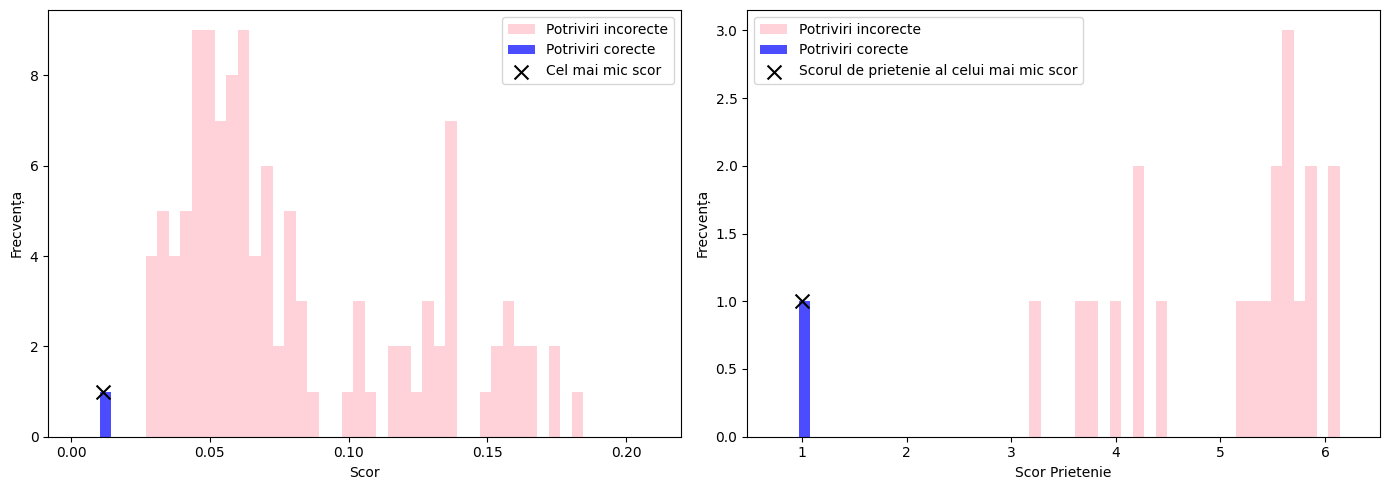

Fragment 31 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (31, 32, 1, 3, 0.004906282133218041)
Min buddy score = 1.0


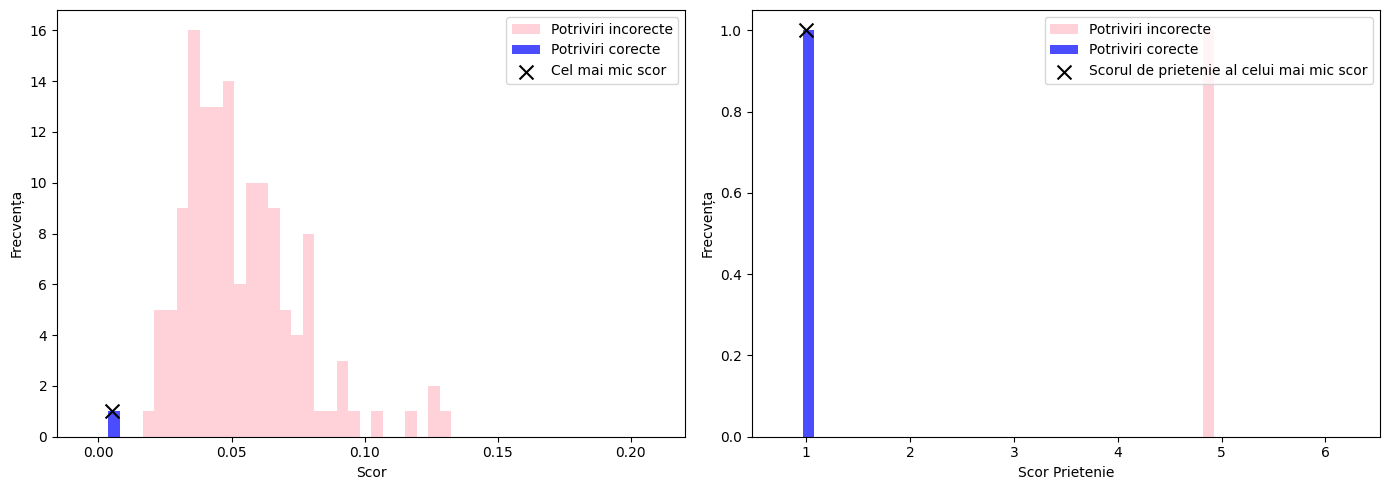

Fragment 31 side 2
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (18, 31, 1, 2, 0.018640309936525722)
Min buddy score = 2.033001574368338


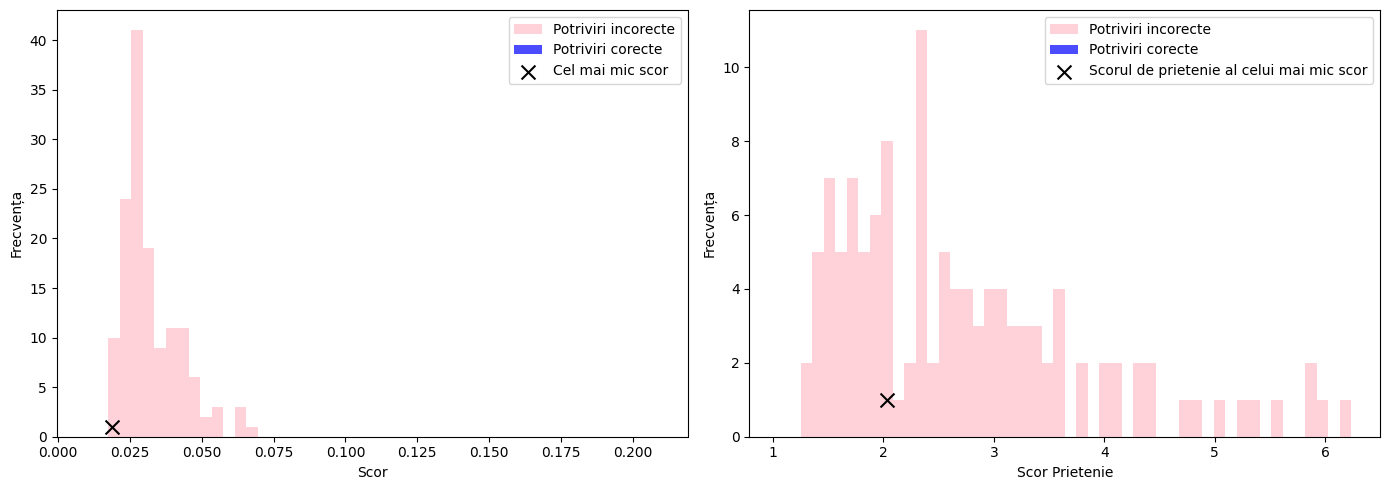

Fragment 31 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (30, 31, 1, 3, 0.013977226646019428)
Min buddy score = 1.0


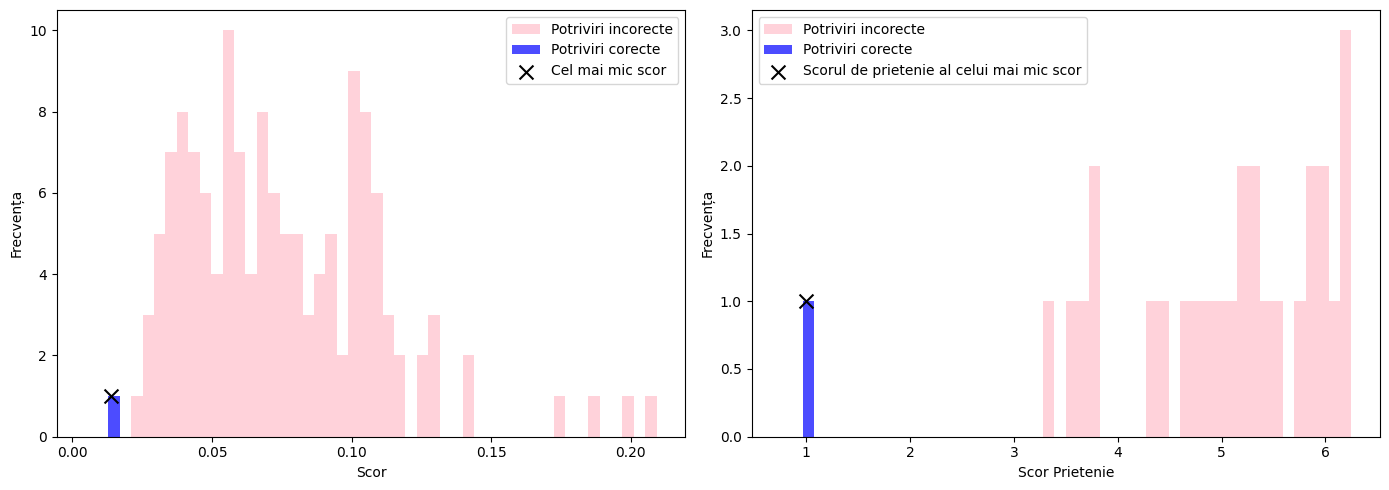

Fragment 32 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (23, 32, 2, 0, 0.027683707308612346)
Min buddy score = 2.696244942956899


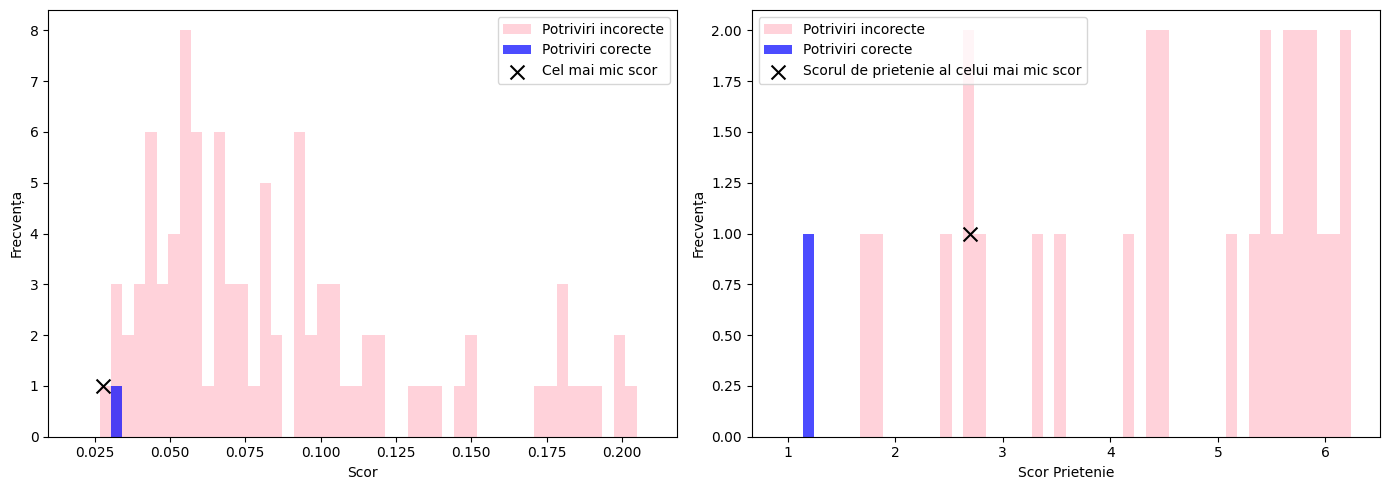

Fragment 32 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (32, 33, 1, 3, 0.007956939727100105)
Min buddy score = 1.0


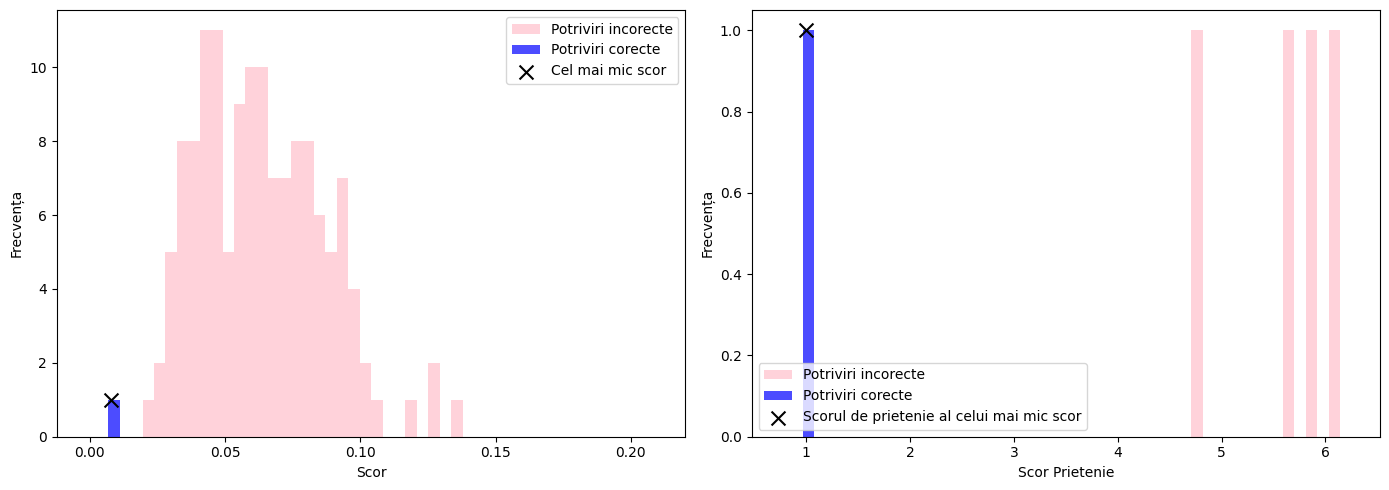

Fragment 32 side 2
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (15, 32, 1, 2, 0.02409463948542714)
Min buddy score = 6.544211201596789


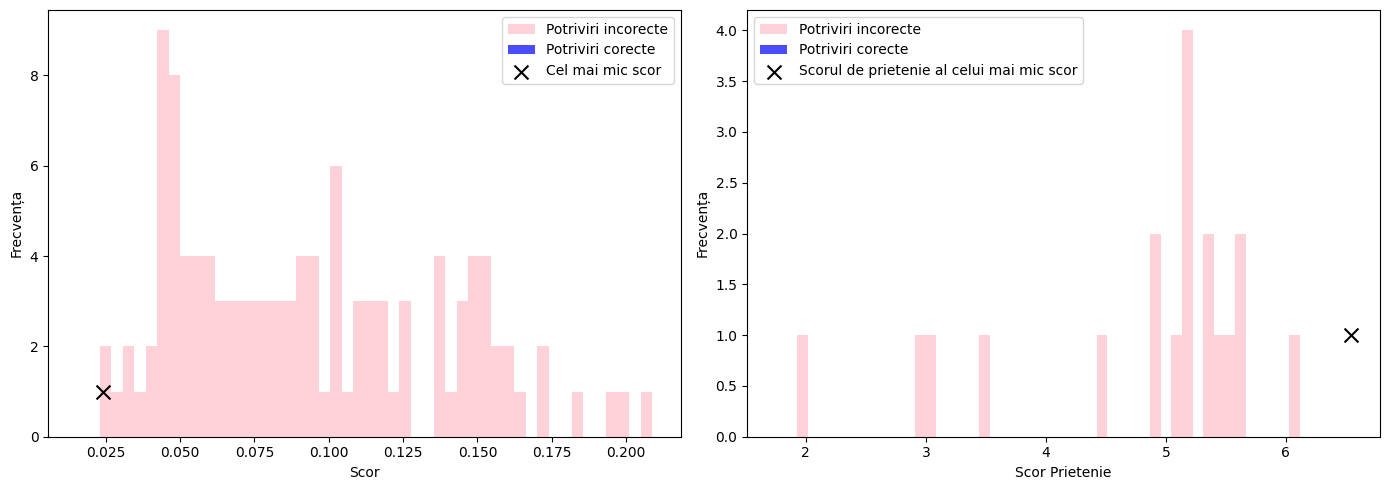

Fragment 32 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (31, 32, 1, 3, 0.004906282133218041)
Min buddy score = 1.0


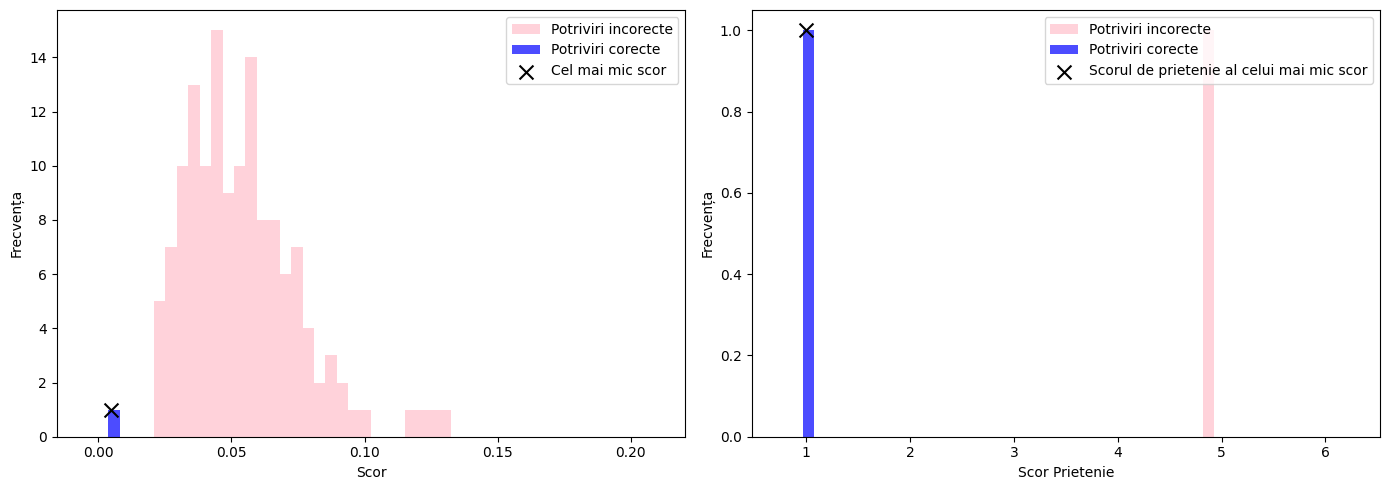

Fragment 33 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (27, 33, 2, 0, 0.01872915829290518)
Min buddy score = 1.0


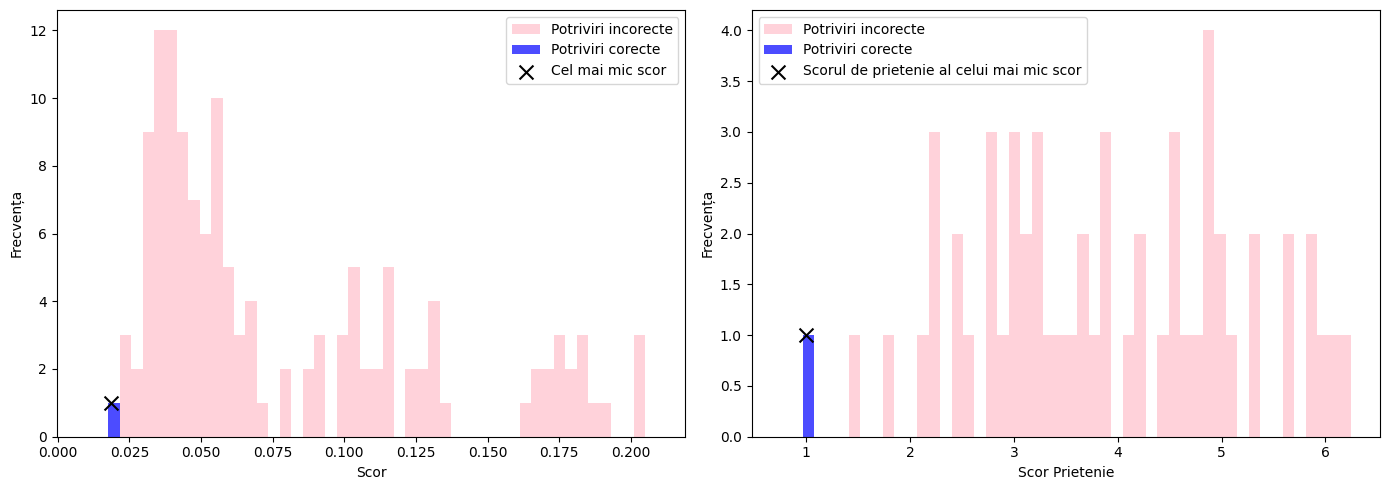

Fragment 33 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (33, 34, 1, 3, 0.021403491313302447)
Min buddy score = 1.0


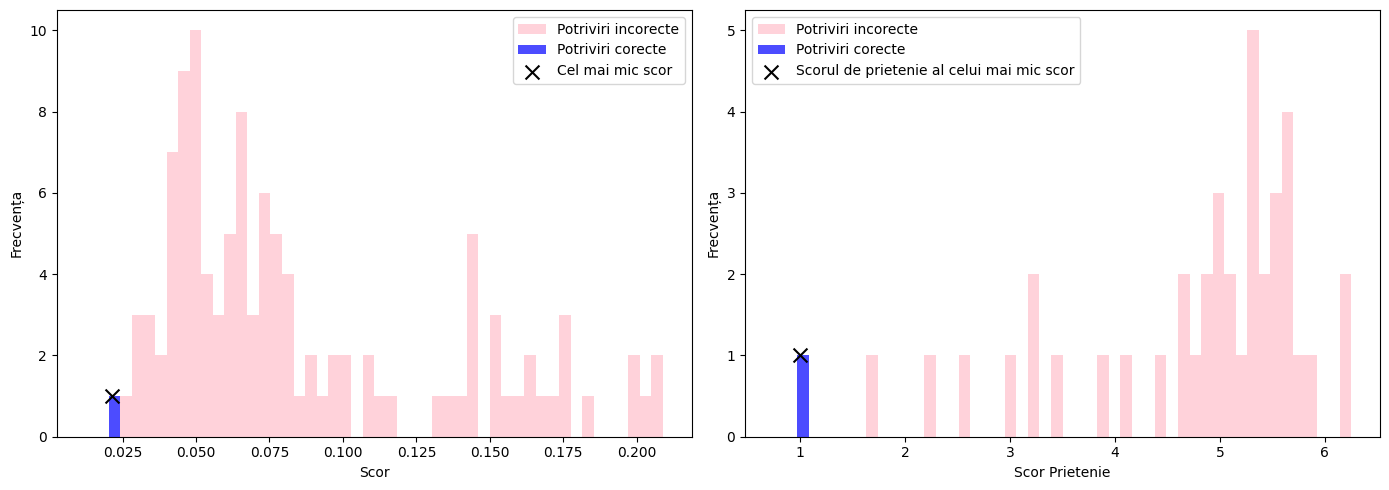

Fragment 33 side 2
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (23, 33, 2, 2, 0.022509350693378782)
Min buddy score = 2.1922902991170243


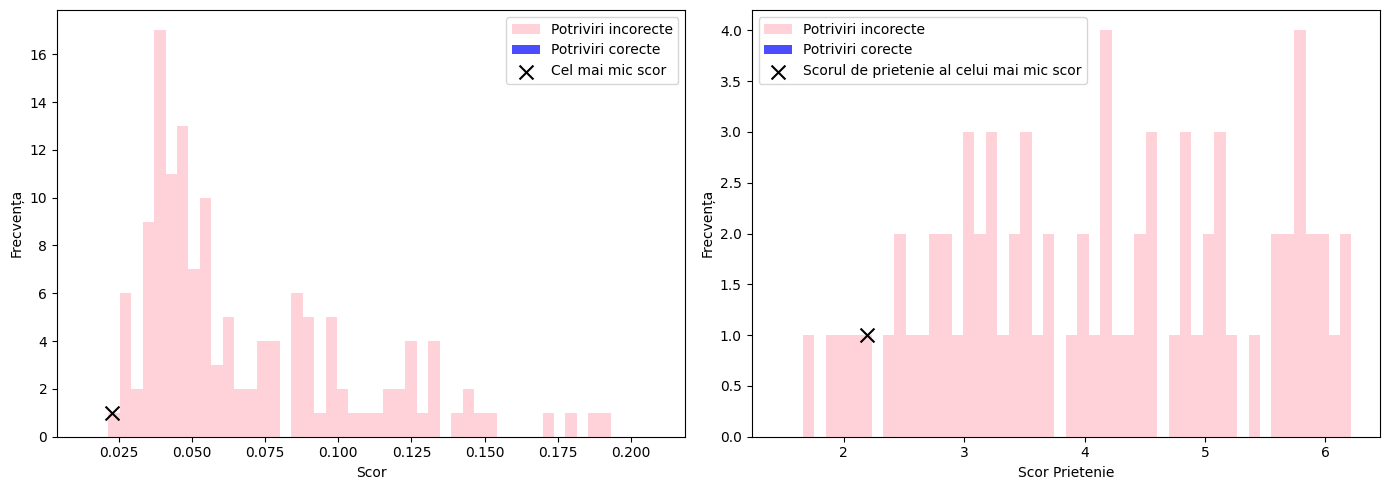

Fragment 33 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (32, 33, 1, 3, 0.007956939727100105)
Min buddy score = 1.0


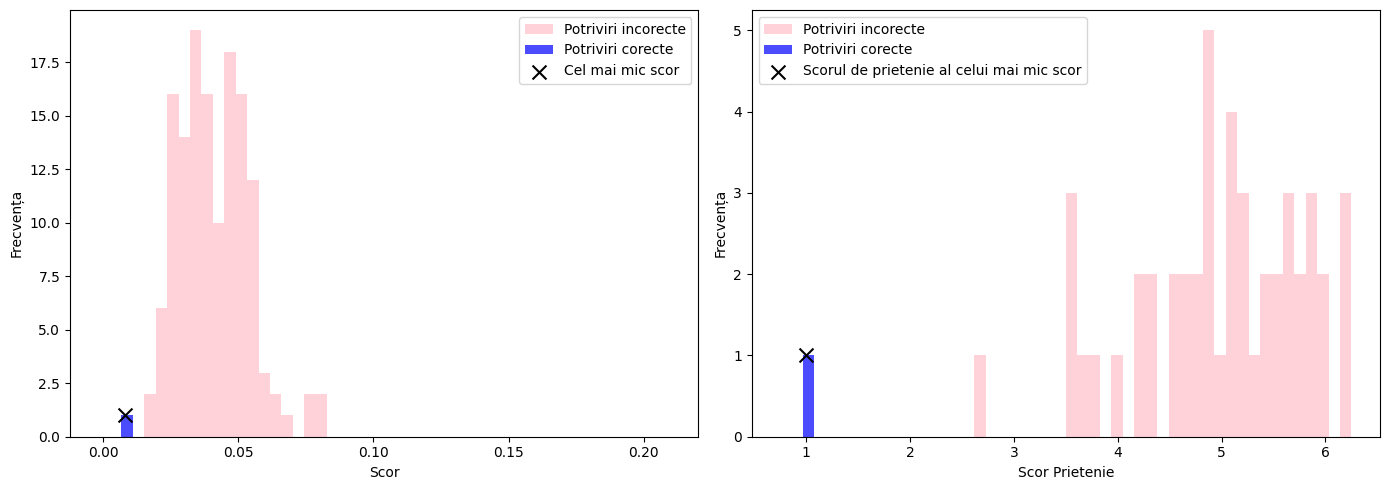

Fragment 34 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (28, 34, 2, 0, 0.020983847466249834)
Min buddy score = 1.0


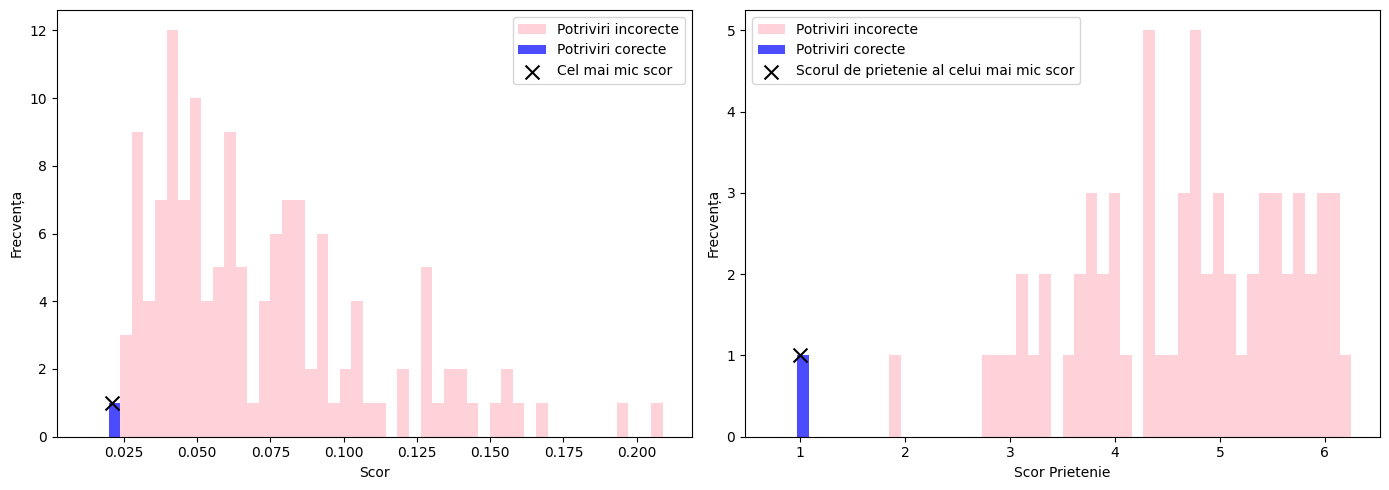

Fragment 34 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (34, 35, 1, 3, 0.01133612711210342)
Min buddy score = 1.0


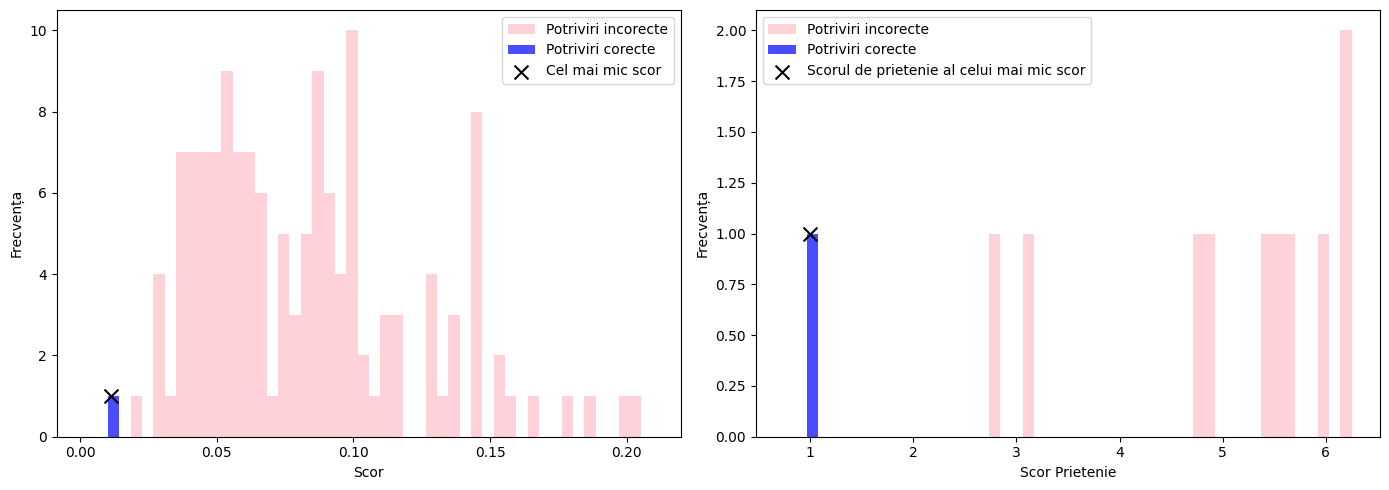

Fragment 34 side 2
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (31, 34, 2, 2, 0.028548248502242902)
Min buddy score = 1.5315329304853753


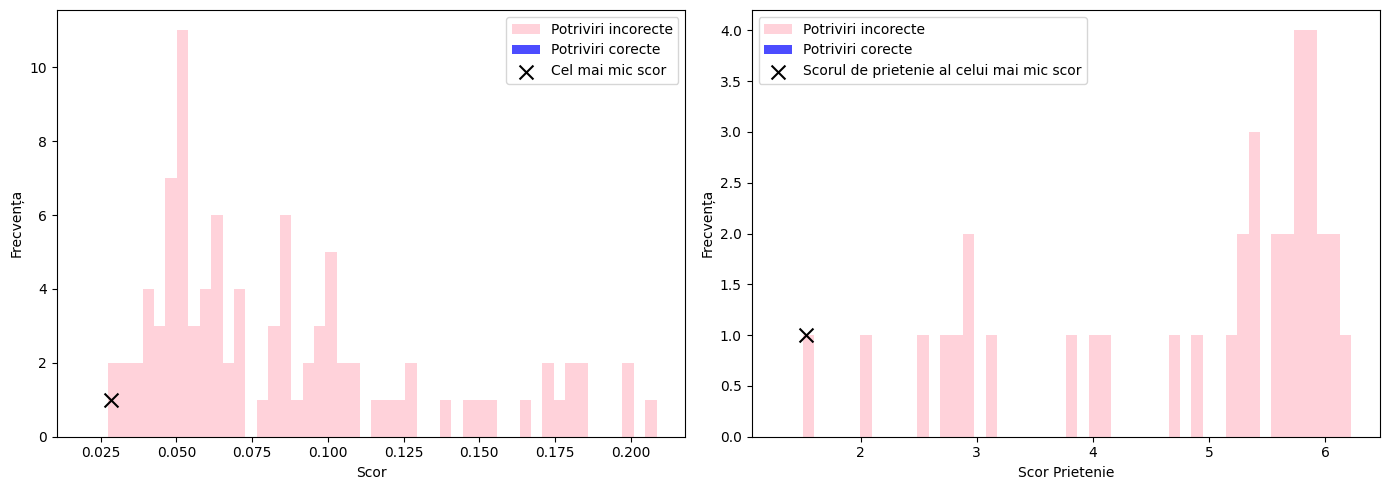

Fragment 34 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (33, 34, 1, 3, 0.021403491313302447)
Min buddy score = 1.0


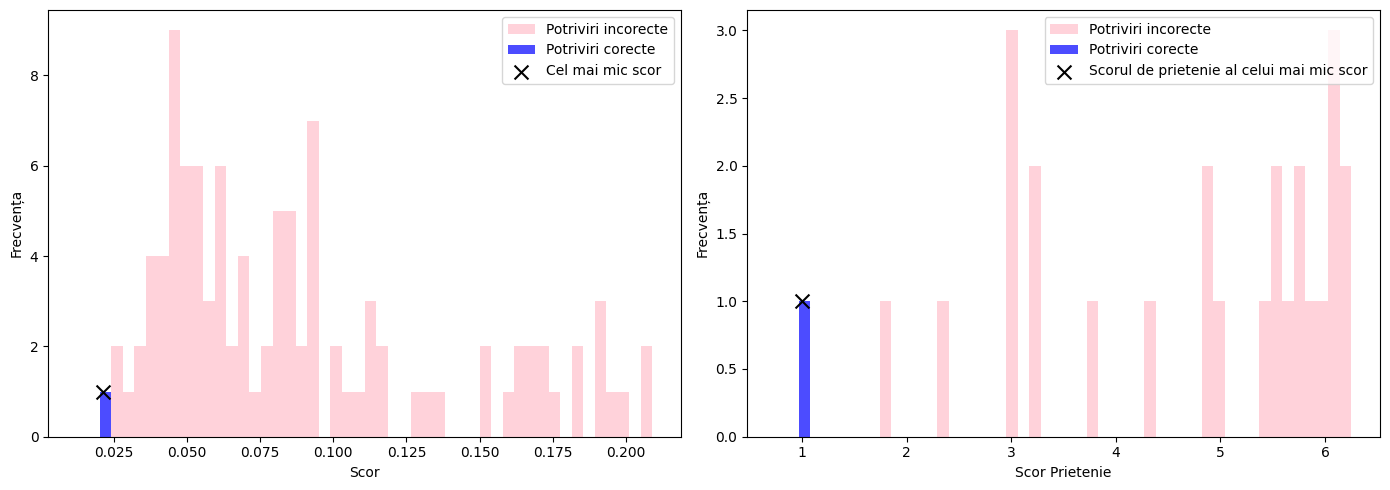

Fragment 35 side 0
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (29, 35, 2, 0, 0.007256589693218186)
Min buddy score = 1.0


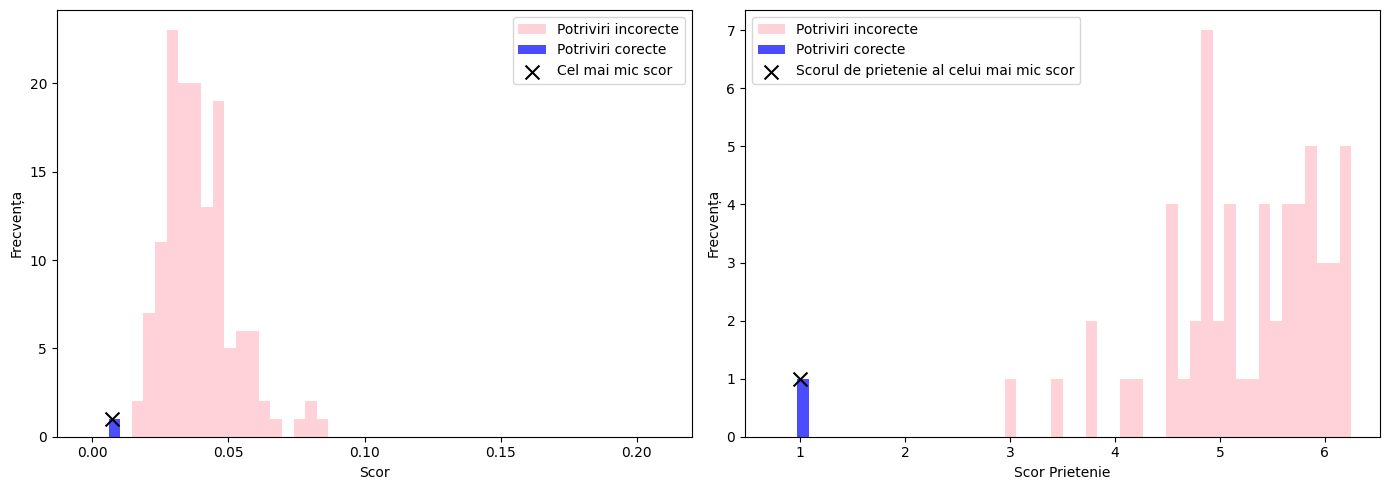

Fragment 35 side 1
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (31, 35, 2, 1, 0.031632478808918486)
Min buddy score = 1.6969931785809305


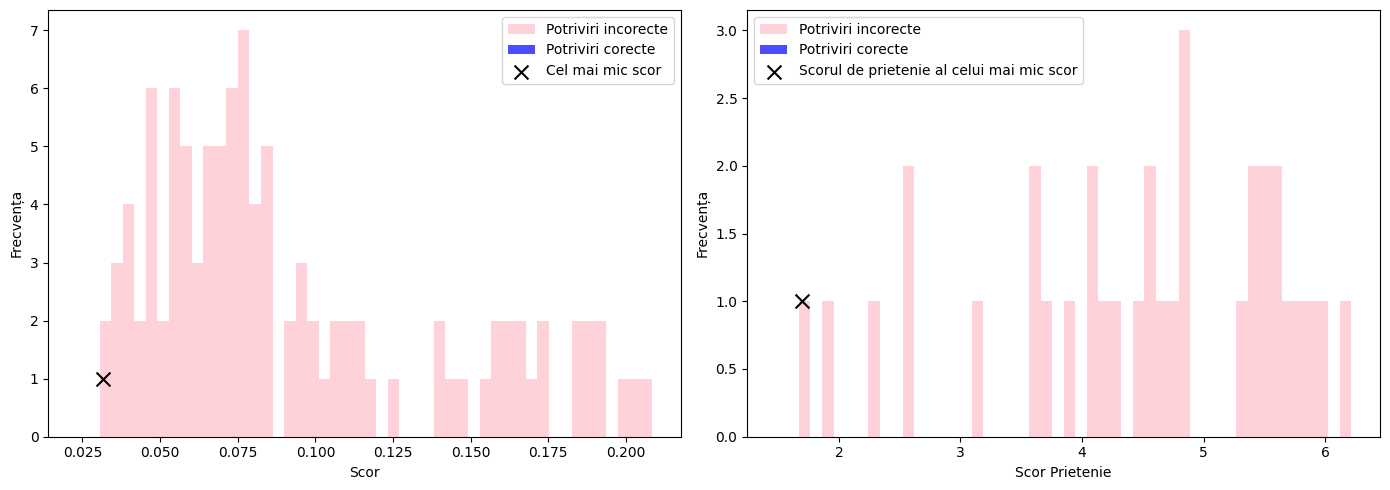

Fragment 35 side 2
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (31, 35, 2, 2, 0.03254901130815539)
Min buddy score = 1.7461625594741612


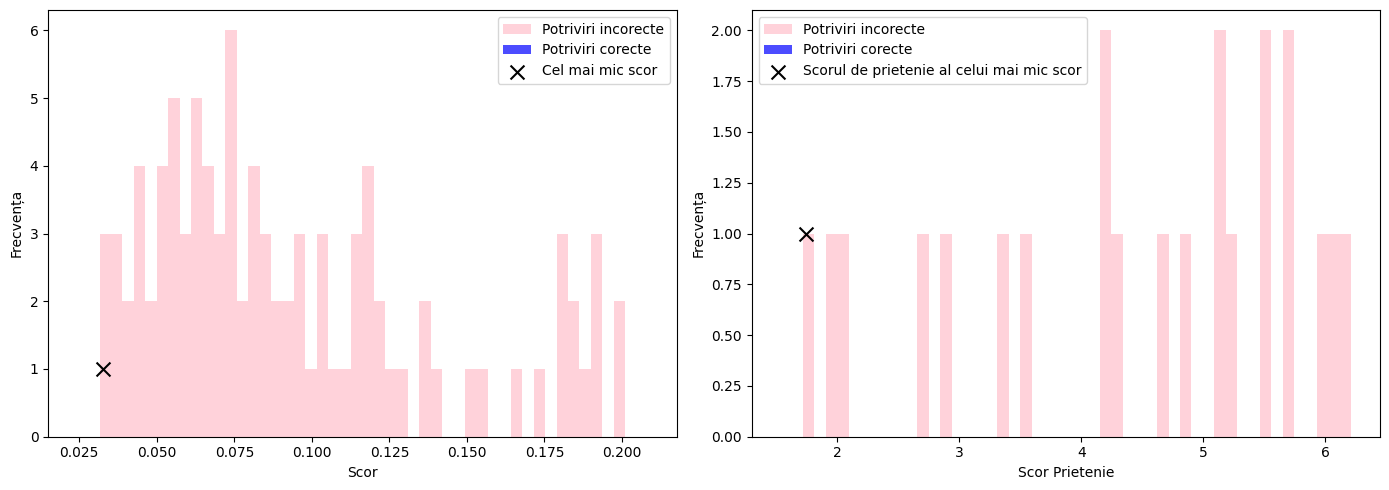

Fragment 35 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (34, 35, 1, 3, 0.01133612711210342)
Min buddy score = 1.0


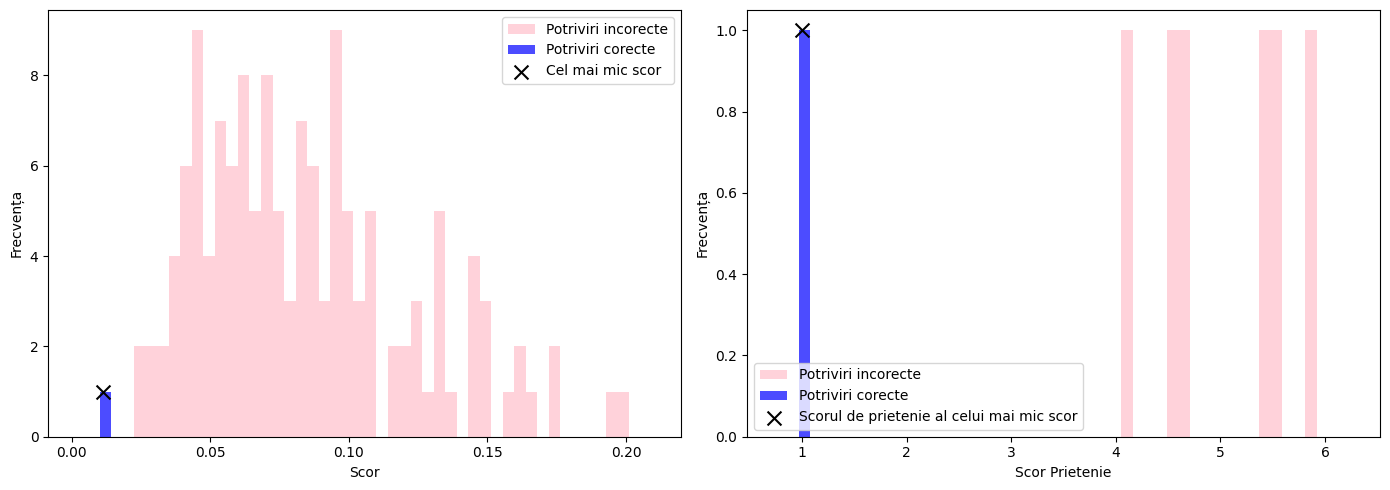

In [95]:
gt_comparisons = read_valid_comparisons(solution_path)

for fr_idx in range(len(fragments)):
    for side_idx in range(4):
        is_match_scores = []
        is_not_match_scores = []
        buddy_match_scores = []
        buddy_not_match_scores = []
        total_comp = 0

        min_score = float('inf')
        buddy_score_of_min = None
        min_score_info = None

        for s_comp in sides_comparisons:
            f1, f2 = s_comp.side1.fragment_idx, s_comp.side2.fragment_idx
            s1, s2 = s_comp.side1.side_idx, s_comp.side2.side_idx

            if (fr_idx == f1 and side_idx == s1) or (fr_idx == f2 and side_idx == s2):
                total_comp += 1
                score = s_comp.score
                buddy_score = s_comp.buddy_score

                if score < min_score:
                    min_score = score
                    min_score_info = (f1, f2, s1, s2, score)
                    buddy_score_of_min = buddy_score

                if (f1, f2, s1, s2) in gt_comparisons or (f2, f1, s2, s1) in gt_comparisons:
                    is_match_scores.append(score)
                    buddy_match_scores.append(buddy_score)
                else:
                    is_not_match_scores.append(score)
                    buddy_not_match_scores.append(buddy_score)

        if total_comp == 0:
            continue

        print(f"Fragment {fr_idx} side {side_idx}")
        print(f"Total comparisons = {total_comp}")
        print(f"Found {len(is_match_scores)} matches and {len(is_not_match_scores)} non-matches")
        print(f"Min score = {min_score_info}")
        print(f"Min buddy score = {buddy_score_of_min}")

        # Clean NaNs/infs
        all_scores = np.array(is_match_scores + is_not_match_scores)
        all_buddies = np.array(buddy_match_scores + buddy_not_match_scores)
        low1, high1 = np.min(all_scores), np.max(all_scores)
        low2, high2 = np.min(all_buddies), np.max(all_buddies)
        high1 = 0.2
        high2 = 6
        buffer1 = (high1 - low1) * 0.05
        buffer2 = (high2 - low2) * 0.05
        low1 -= buffer1
        high1 += buffer1
        low2 -= buffer2
        high2 += buffer2

        # Plot side-by-side
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Score plot
        axes[0].hist(is_not_match_scores, bins=50, alpha=0.7, color='pink', label="Potriviri incorecte", range=(low1, high1))
        axes[0].hist(is_match_scores, bins=50, alpha=0.7, color='blue', label="Potriviri corecte", range=(low1, high1))
        axes[0].scatter(min_score, 1, color='black', marker='x', s=100, label="Cel mai mic scor")
        axes[0].legend()
        # axes[0].set_title(f"Scores — Fragment {fr_idx}, Side {side_idx}")
        axes[0].set_xlabel("Scor")
        axes[0].set_ylabel("Frecvența")
        # axes[0].grid(True)
        # axes[1].set_yscale("log")    # <--- log scale Y
        # Buddy score plot
        axes[1].hist(buddy_not_match_scores, bins=50, alpha=0.7, color='pink', label="Potriviri incorecte", range=(low2, high2))
        axes[1].hist(buddy_match_scores, bins=50, alpha=0.7, color='blue', label="Potriviri corecte", range=(low2, high2))
        axes[1].scatter(buddy_score_of_min, 1, color='black', marker='x', s=100, label="Scorul de prietenie al celui mai mic scor")
        axes[1].legend()
        # axes[1].set_title(f"Buddy Scores — Fragment {fr_idx}, Side {side_idx}")
        axes[1].set_xlabel("Scor Prietenie")
        axes[1].set_ylabel("Frecvența")
        # axes[1].grid(True)
        # axes[1].set_yscale("log")    # <--- log scale Y
        plt.tight_layout()
        plt.show()
